# Second Report: Financial Market Volatility

By: Abigail Alpert and Gabi Wurgaft

# Project Goal

Predict volatility for the following day for AAPL, LLY, and BEP stocks.

# Current Project Stage

Data Exploration and descriptive analytics

In [1]:
# Load Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

import datetime

Structure:

- Data management
- Summary statistics
- Time series plots
- Returns
- Variance
- Volatility
    - Daily volatility
    - Aggregated volatility
- Correlation
- EWMA
- Outlier detection
- Next steps


# Data Management

In [2]:
# Read Data
aapl_df = pd.read_csv("data_files/AAPL_combined.csv.gz")
lly_df = pd.read_csv("data_files/LLY_combined.csv.gz")
bep_df = pd.read_csv("data_files/BEP_combined.csv.gz")

# Data Preprocessing
def data_preprocess(df):
    # Rename columns
    df.rename(columns={'Unnamed: 0': 'timestamp',
                       '1. open': 'open',
                       '2. high': 'high',
                       '3. low': 'low',
                       '4. close': 'close',
                       '5. volume': 'volume'}, inplace=True)
    
    # Drop unnecessary columns
    if 'Unnamed: 0.1' in df.columns.tolist():
        df.drop(columns=['Unnamed: 0.1'], inplace=True)

    # Handle data types
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    return df

aapl_df = data_preprocess(aapl_df)
lly_df = data_preprocess(lly_df)
bep_df = data_preprocess(bep_df)

# Summary Statistics

In [3]:
aapl_df.describe()

open           high            low          close  \
count  562931.000000  562931.000000  562931.000000  562931.000000   
mean      160.515991     160.593207     160.437746     160.516211   
std        45.624113      45.636280      45.611705      45.624154   
min        51.539100      51.672300      51.476200      51.529400   
25%       130.567100     130.630900     130.504700     130.565450   
50%       160.717500     160.820600     160.624200     160.718600   
75%       190.944100     191.003600     190.879900     190.944100   
max       259.008600     265.706100     258.809300     259.028400   

             volume  
count  5.629310e+05  
mean   1.647944e+05  
std    2.178602e+05  
min    6.000000e+00  
25%    6.793800e+04  
50%    1.116850e+05  
75%    1.919780e+05  
max    2.035834e+07

Notice that the stock price varies by about $200 over the full dataframe. Since our data is on a minute level, the values do not differ too much between the open, high, low, and close prices.

In [4]:
lly_df.describe()

open           high            low          close  \
count  558186.000000  558186.000000  558186.000000  558186.000000   
mean      433.285002     433.485025     433.081830     433.283493   
std       264.277398     264.407444     264.144637     264.275595   
min       109.690000     109.971000     109.643100     109.821100   
25%       208.908500     208.970800     208.842600     208.890500   
50%       323.250800     323.396450     323.113400     323.259600   
75%       733.159150     733.555975     732.695800     733.151675   
max       964.839100     965.136800     963.310800     964.610700   

             volume  
count  5.581860e+05  
mean   5.859736e+03  
std    1.108389e+04  
min    1.000000e+00  
25%    1.717000e+03  
50%    3.252000e+03  
75%    6.246000e+03  
max    1.246834e+06

Notice that the stock price varies by about $850 over the full dataframe. Since our data is in one-minute intervals, the values do not differ too much between the open, high, low, and close prices

In [5]:
bep_df.describe()

open           high            low          close  \
count  401488.000000  401488.000000  401488.000000  401488.000000   
mean       25.741919      25.750977      25.732866      25.741928   
std         4.781916       4.782594       4.781305       4.781990   
min        12.429000      12.449800      12.388100      12.429300   
25%        22.239900      22.246400      22.230300      22.239900   
50%        24.789400      24.795600      24.782100      24.790000   
75%        29.526100      29.535600      29.519200      29.527400   
max        39.598300      39.598300      39.534800      39.550700   

              volume  
count  401488.000000  
mean     1495.447027  
std      3329.225258  
min         1.000000  
25%       261.000000  
50%       628.000000  
75%      1549.000000  
max    423712.000000

Notice that the stock prices varies by about $35 over the full dataframe. This is considerably less than the other stocks that we are looking at. Since our data is in one-minute intervals, the values do not differ too much between the open, high, low, and close prices

# Time Series Plot

In [6]:
def plot_timeseries(df, column):
    g = (ggplot(df) + 
         geom_line(aes(x='timestamp', y=column)) + 
         labs(title=column))
    return g

### Apple Plots

Although there is a general upwards trend over time, the increase in stock price is not consistent

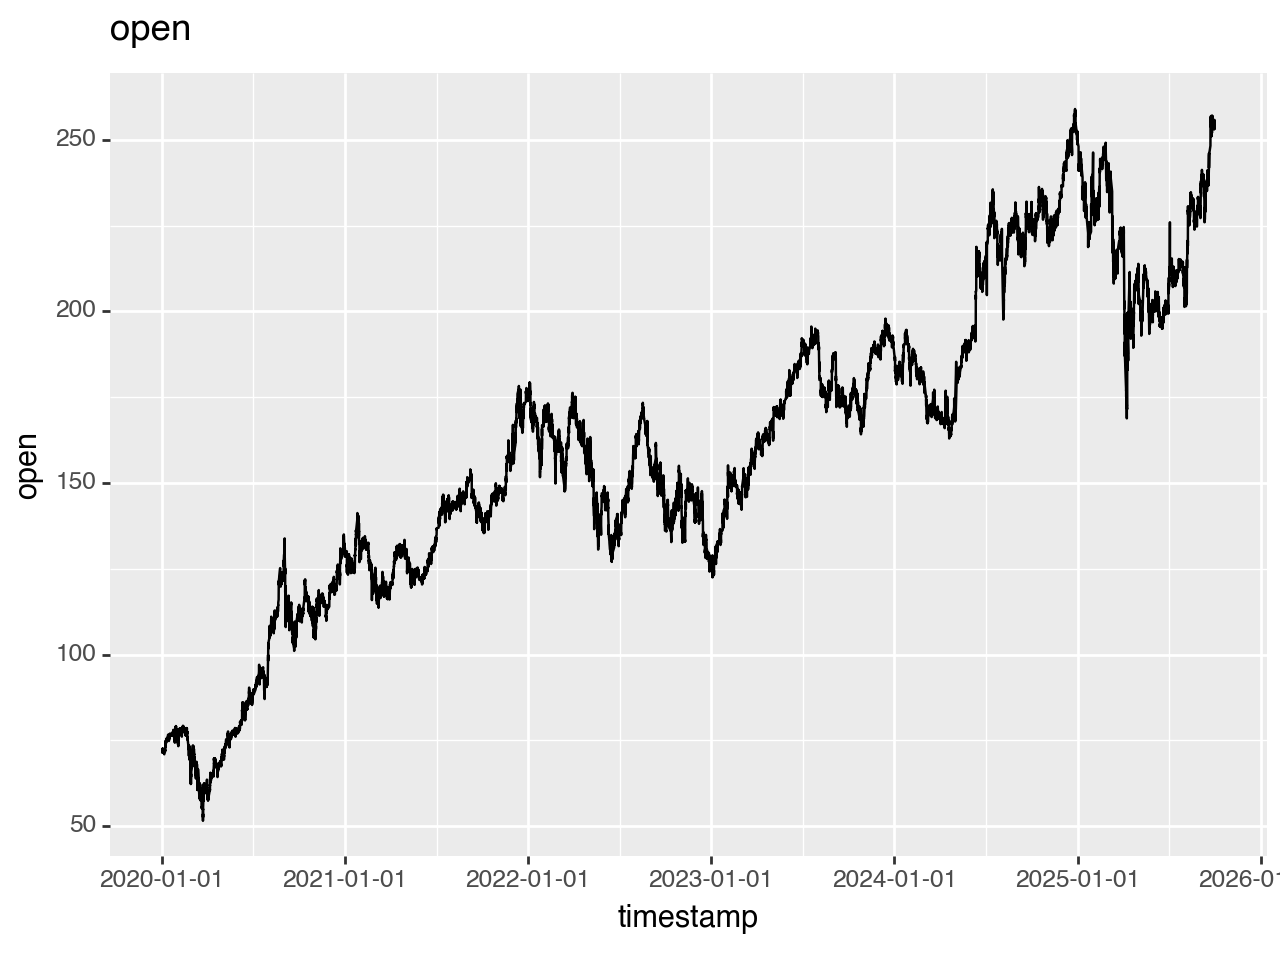

<Figure Size: (640 x 480)>

In [7]:
plot_timeseries(aapl_df, 'open')

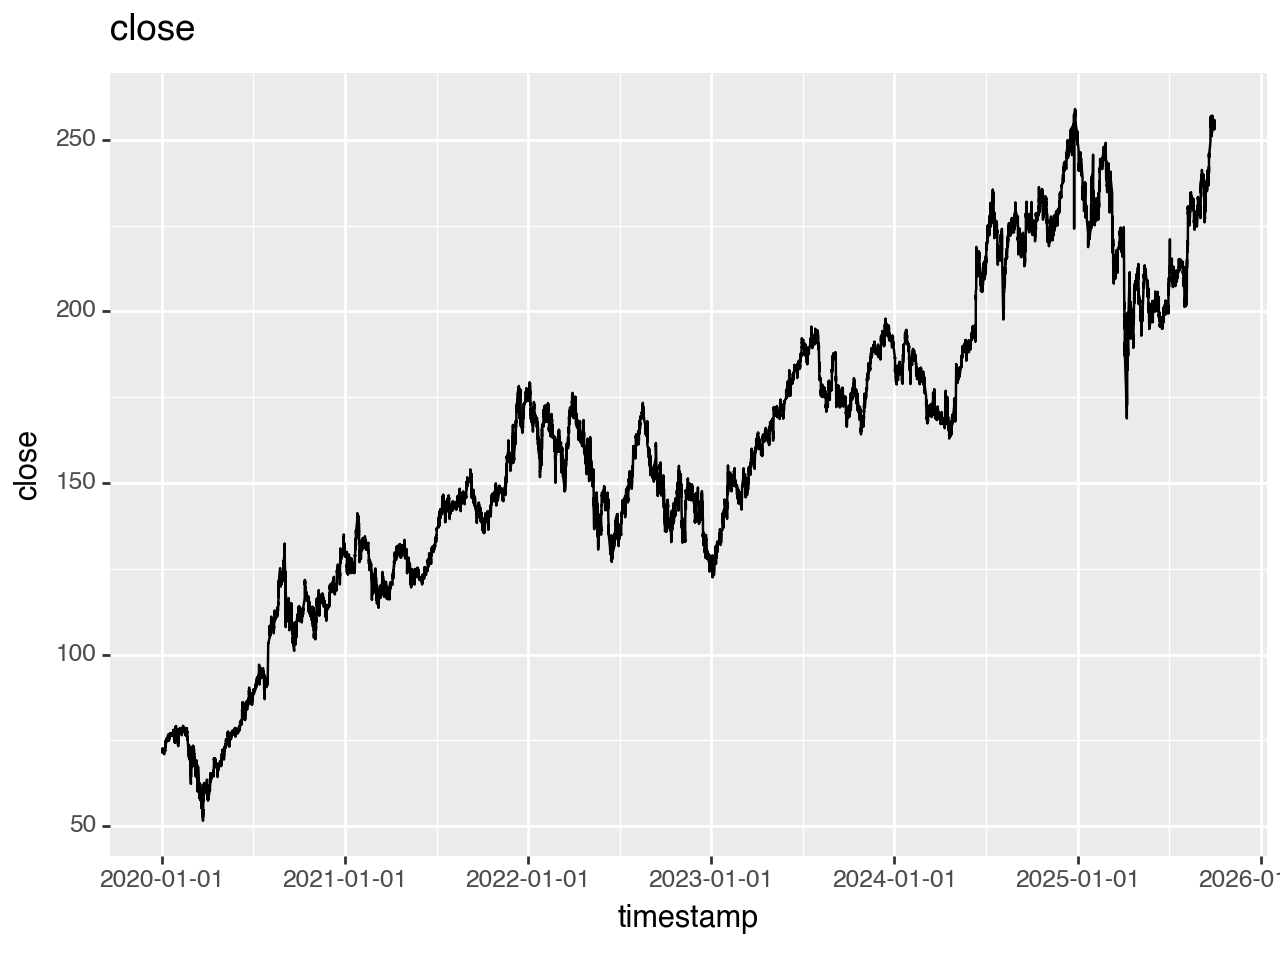

<Figure Size: (640 x 480)>

In [8]:
plot_timeseries(aapl_df, 'close')

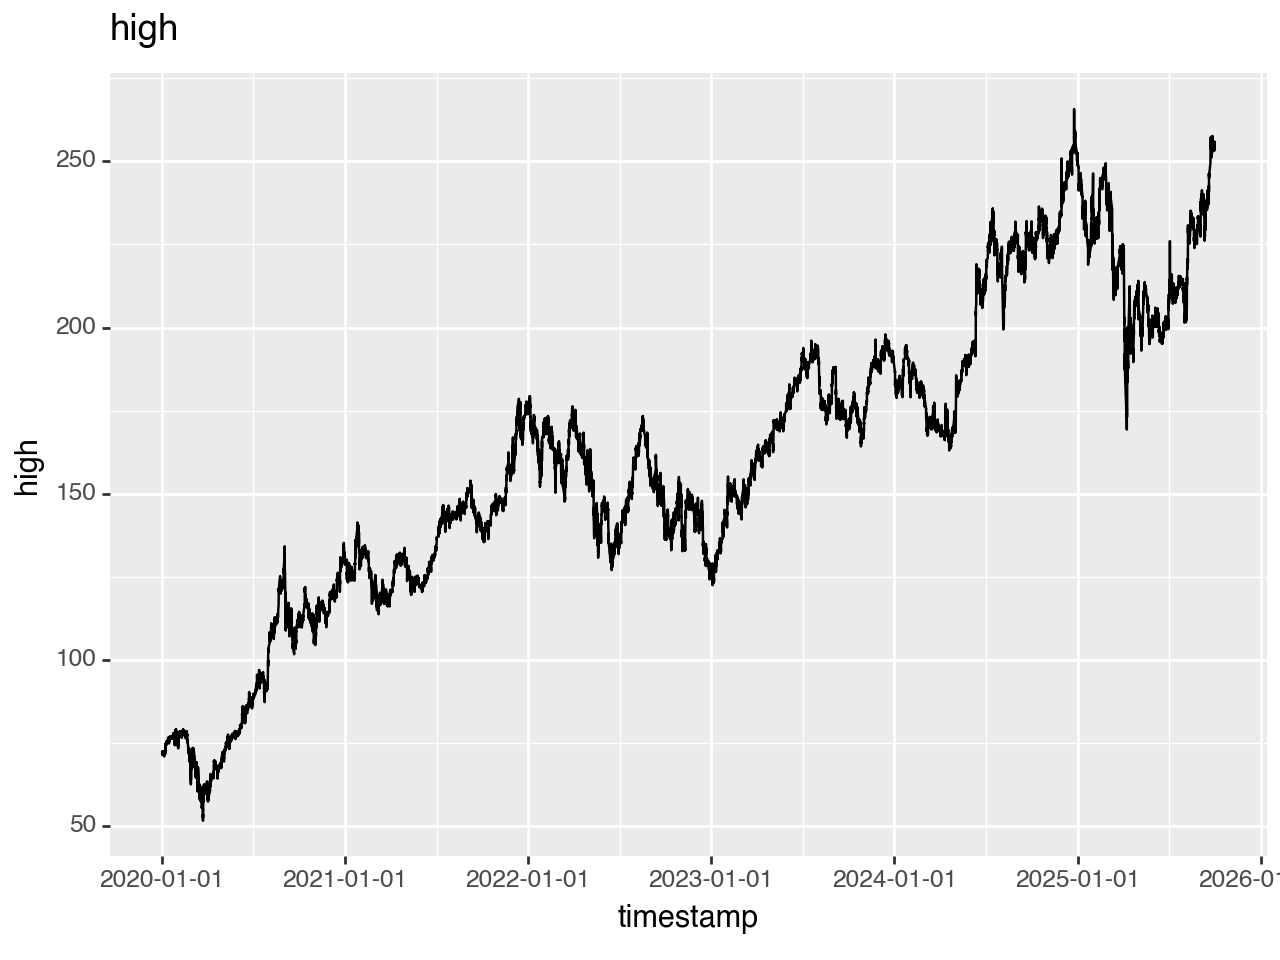

<Figure Size: (640 x 480)>

In [9]:
plot_timeseries(aapl_df, 'high')


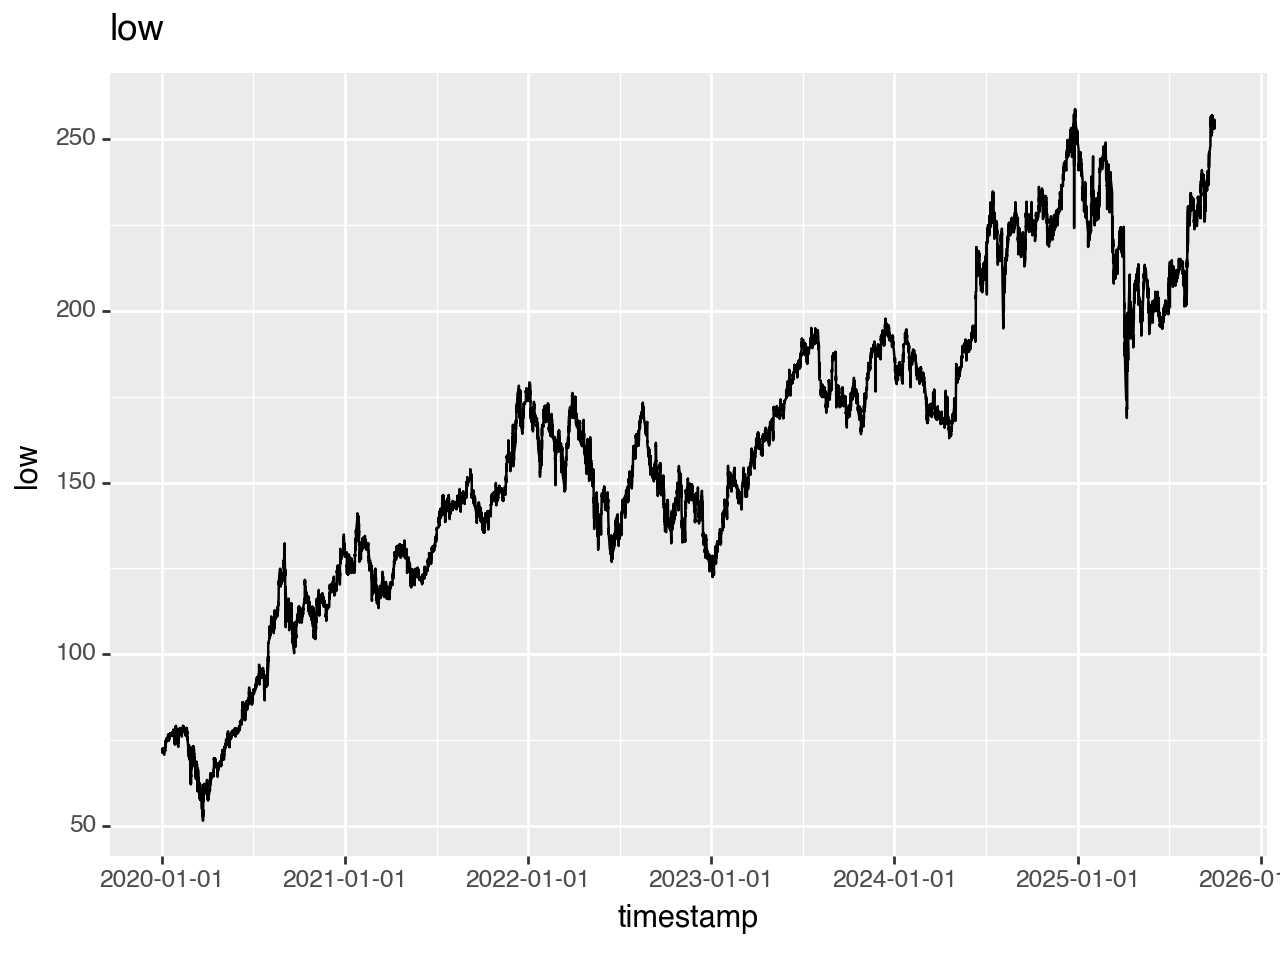

<Figure Size: (640 x 480)>

In [10]:
plot_timeseries(aapl_df, 'low')

### Eli Lilly Plots

Notice that the stock price was increasing steadily until March 2023 when the price increased dramatically. Since June 2024, the LLY stock price has been on a general decreasing trend

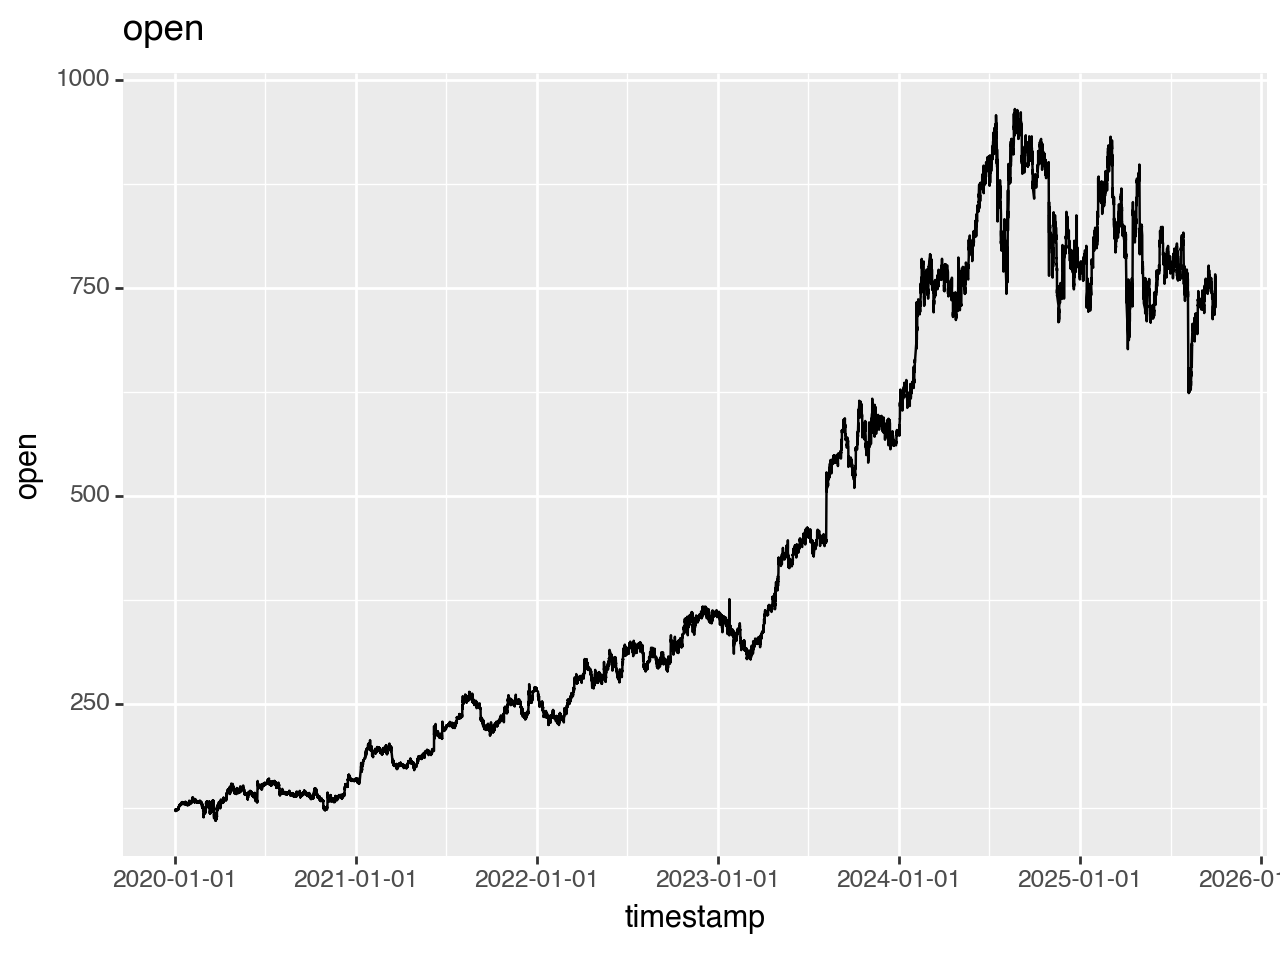

<Figure Size: (640 x 480)>

In [11]:
plot_timeseries(lly_df, 'open')

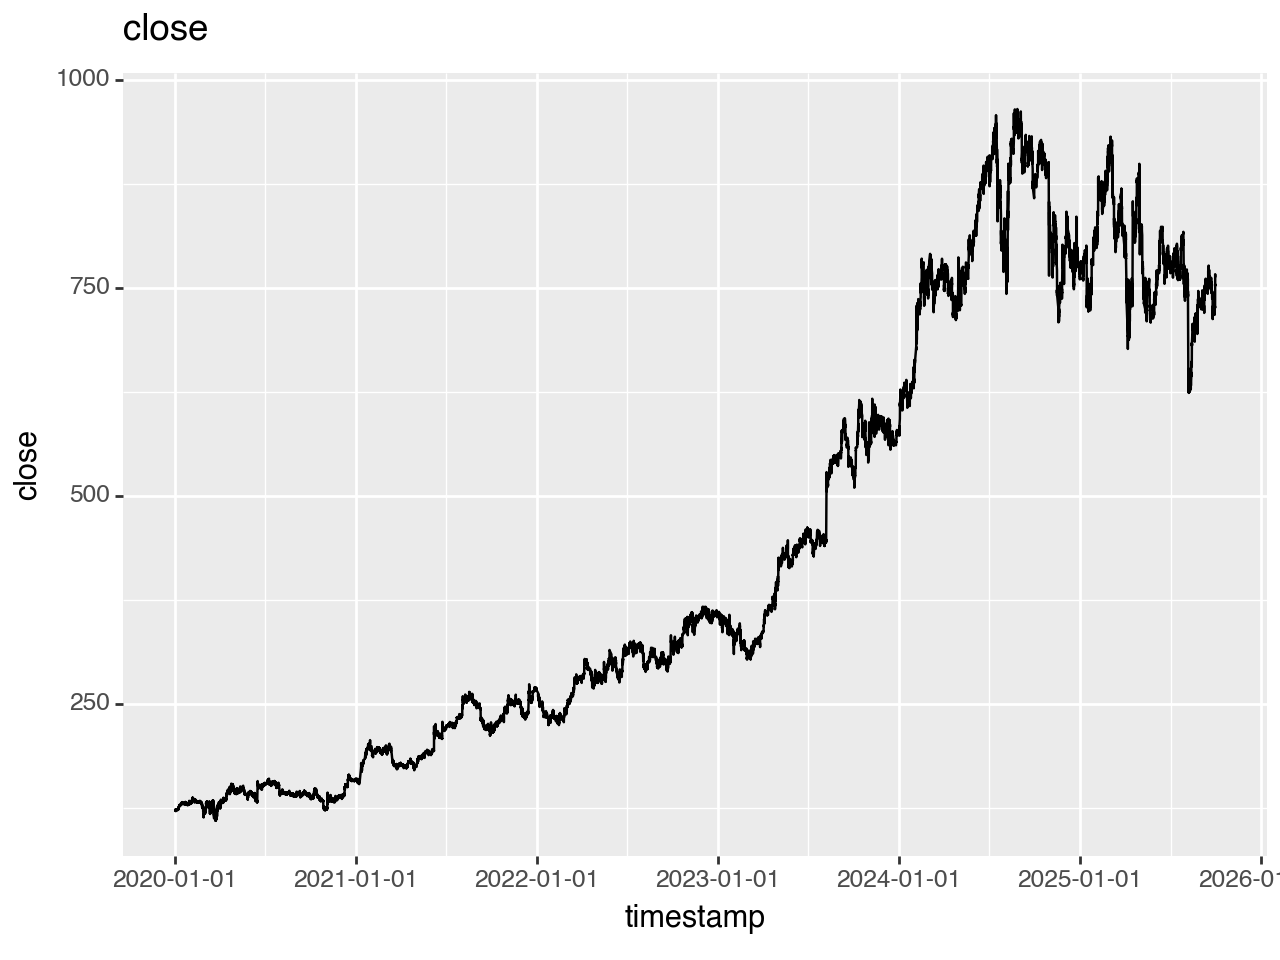

<Figure Size: (640 x 480)>

In [12]:
plot_timeseries(lly_df, 'close')

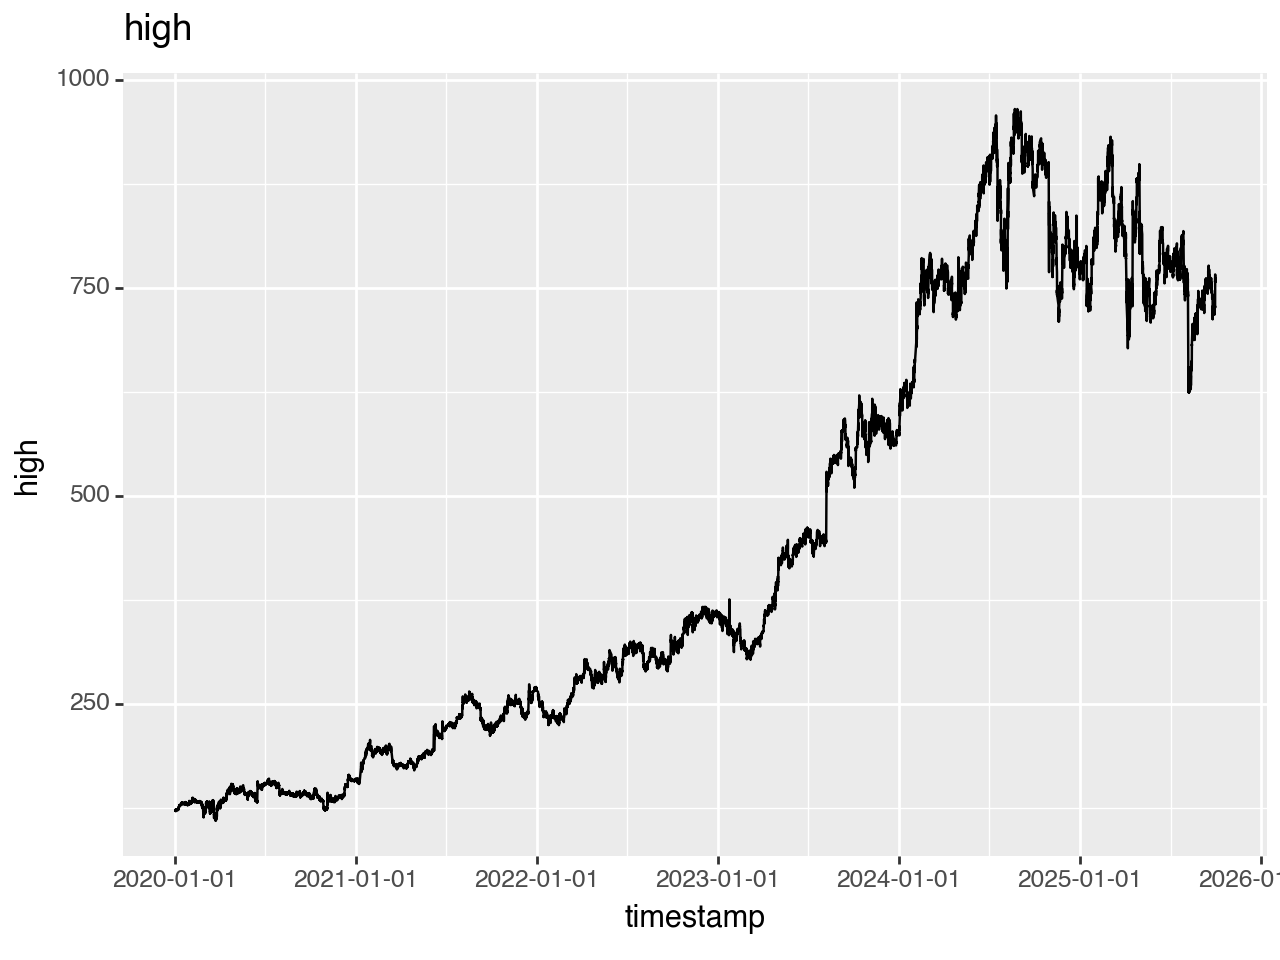

<Figure Size: (640 x 480)>

In [13]:
plot_timeseries(lly_df, 'high')

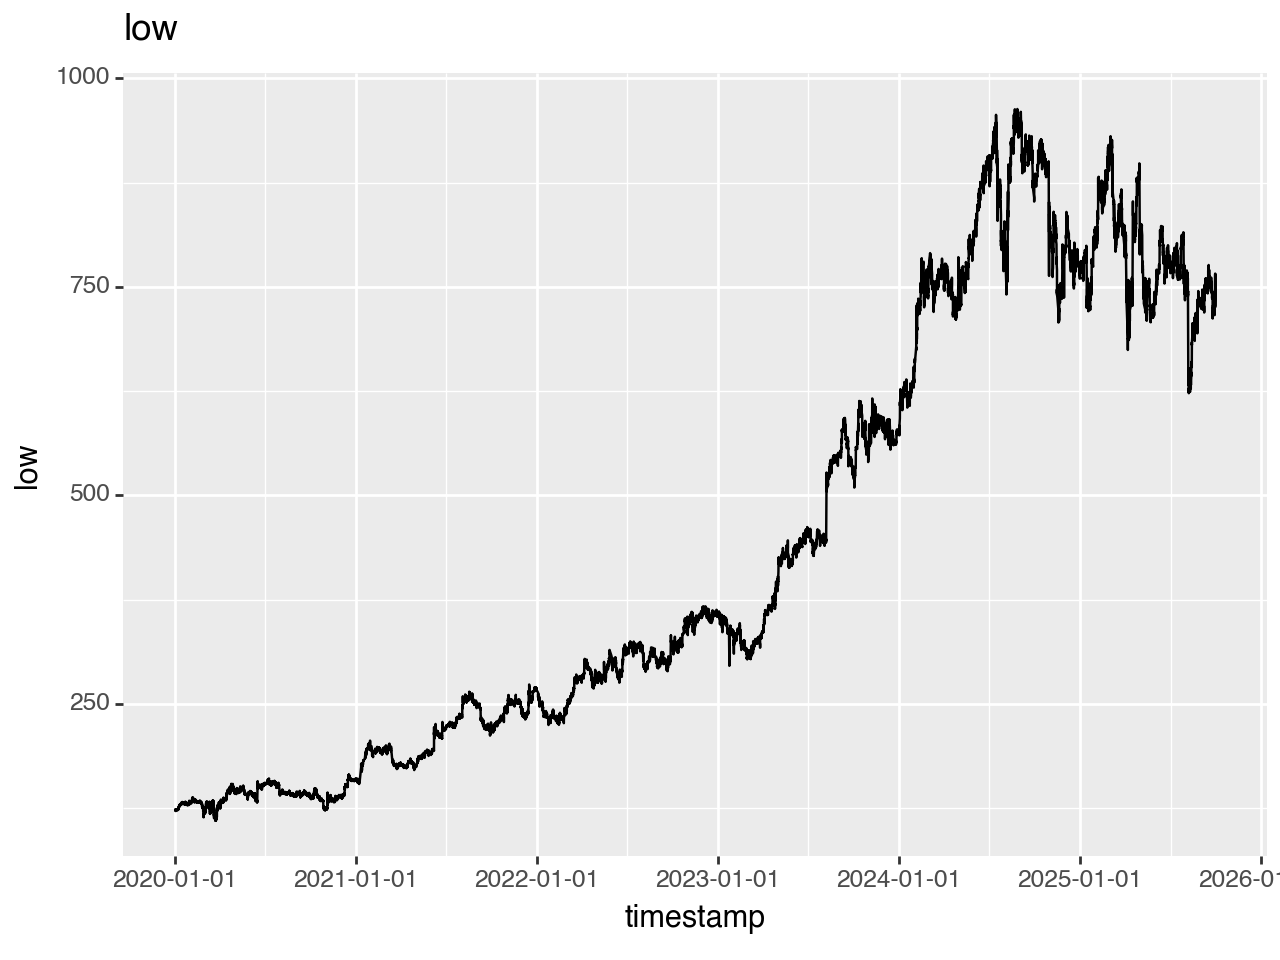

<Figure Size: (640 x 480)>

In [14]:
plot_timeseries(lly_df, 'low')

### Brookfield Plots

Notice that the Brookfield stock price shot up dramatically startin in March 2020 through the end of the year. Since then, there have been many flucations, but a general decrease in stock price. Since the start of 2025, the BEP stock prices has been mostly increasing.

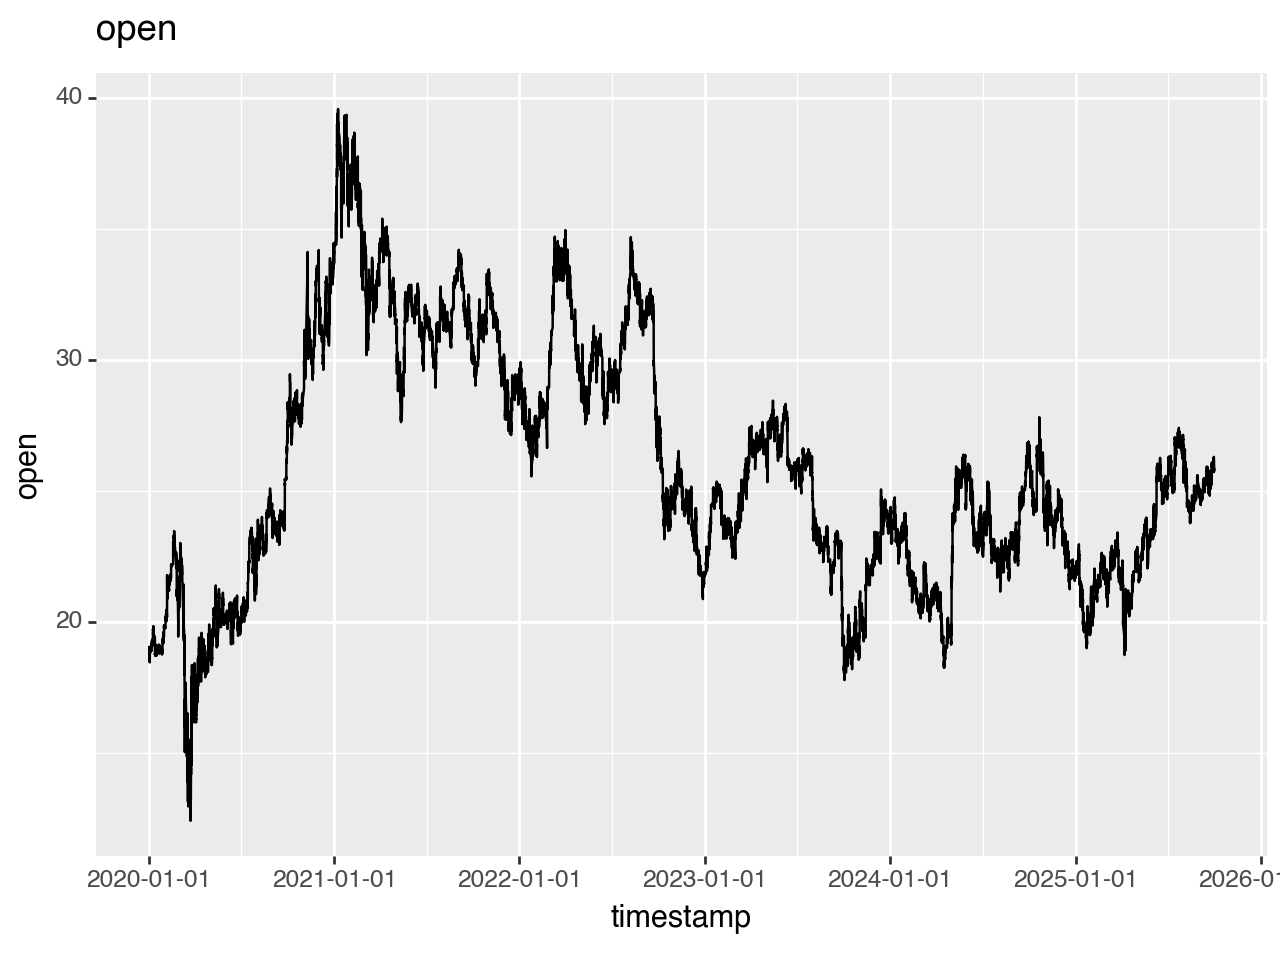

<Figure Size: (640 x 480)>

In [15]:
plot_timeseries(bep_df, 'open')

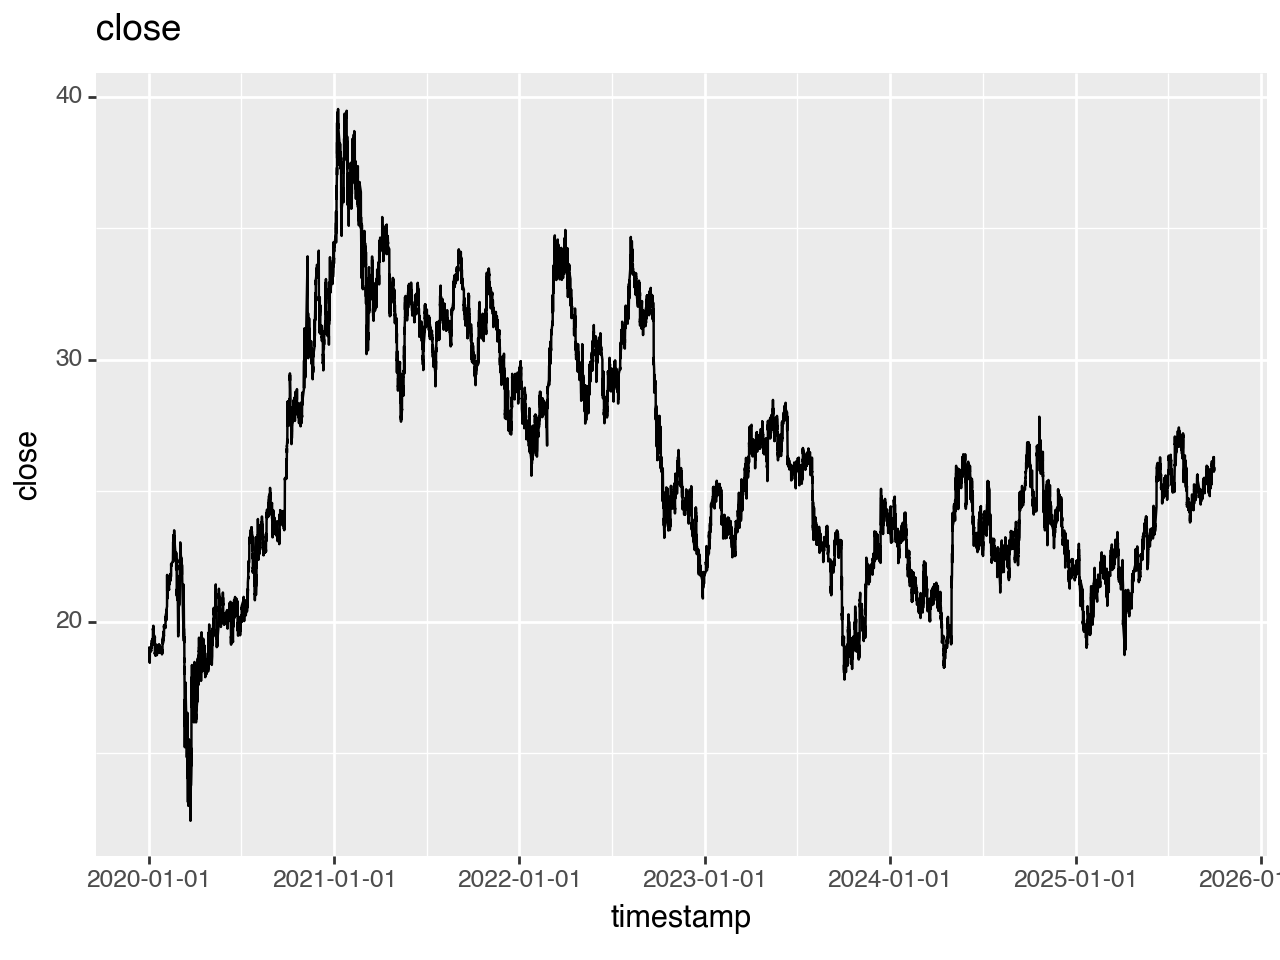

<Figure Size: (640 x 480)>

In [16]:
plot_timeseries(bep_df, 'close')

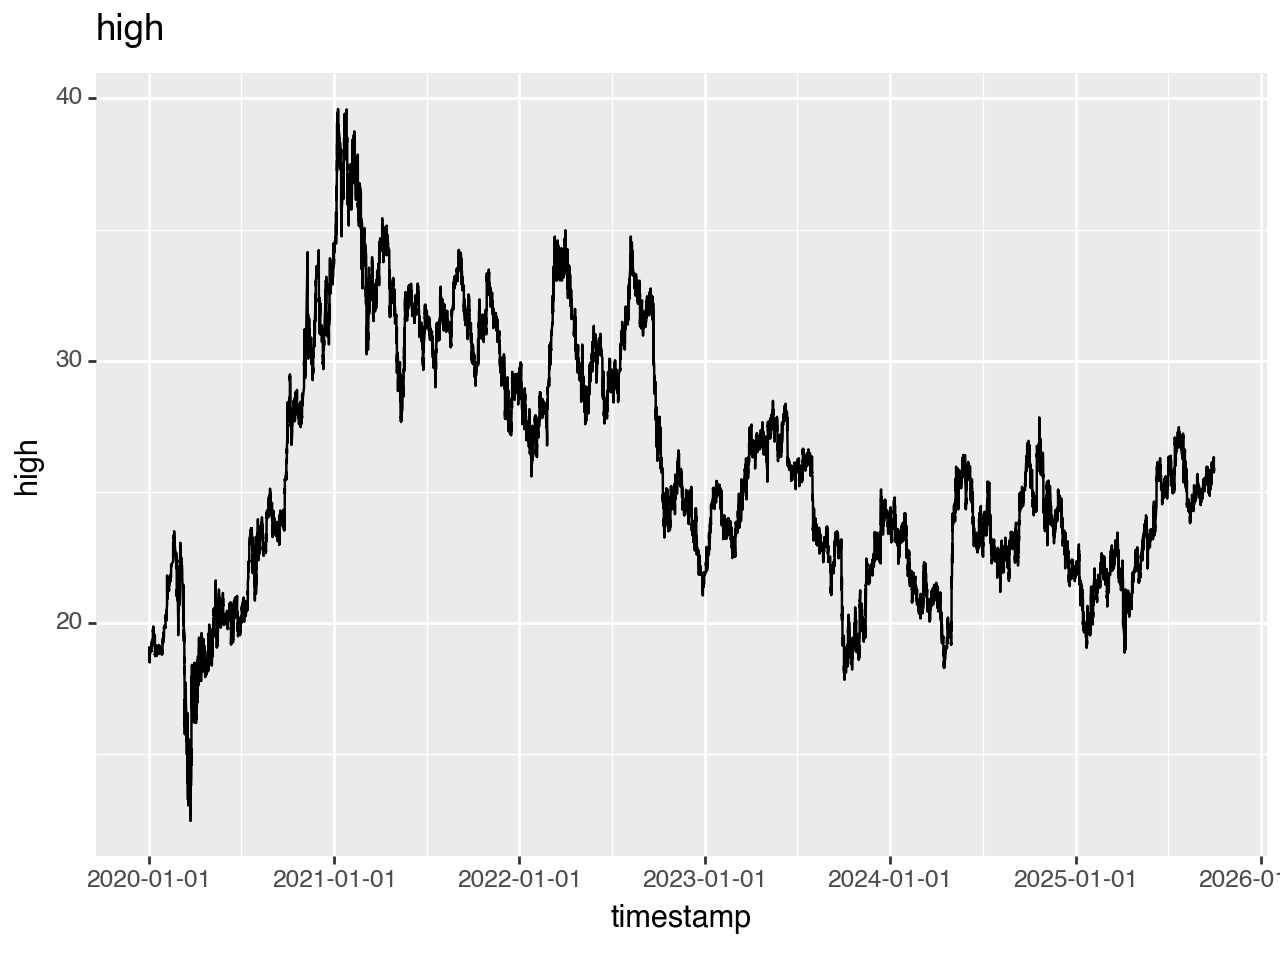

<Figure Size: (640 x 480)>

In [17]:
plot_timeseries(bep_df, 'high')

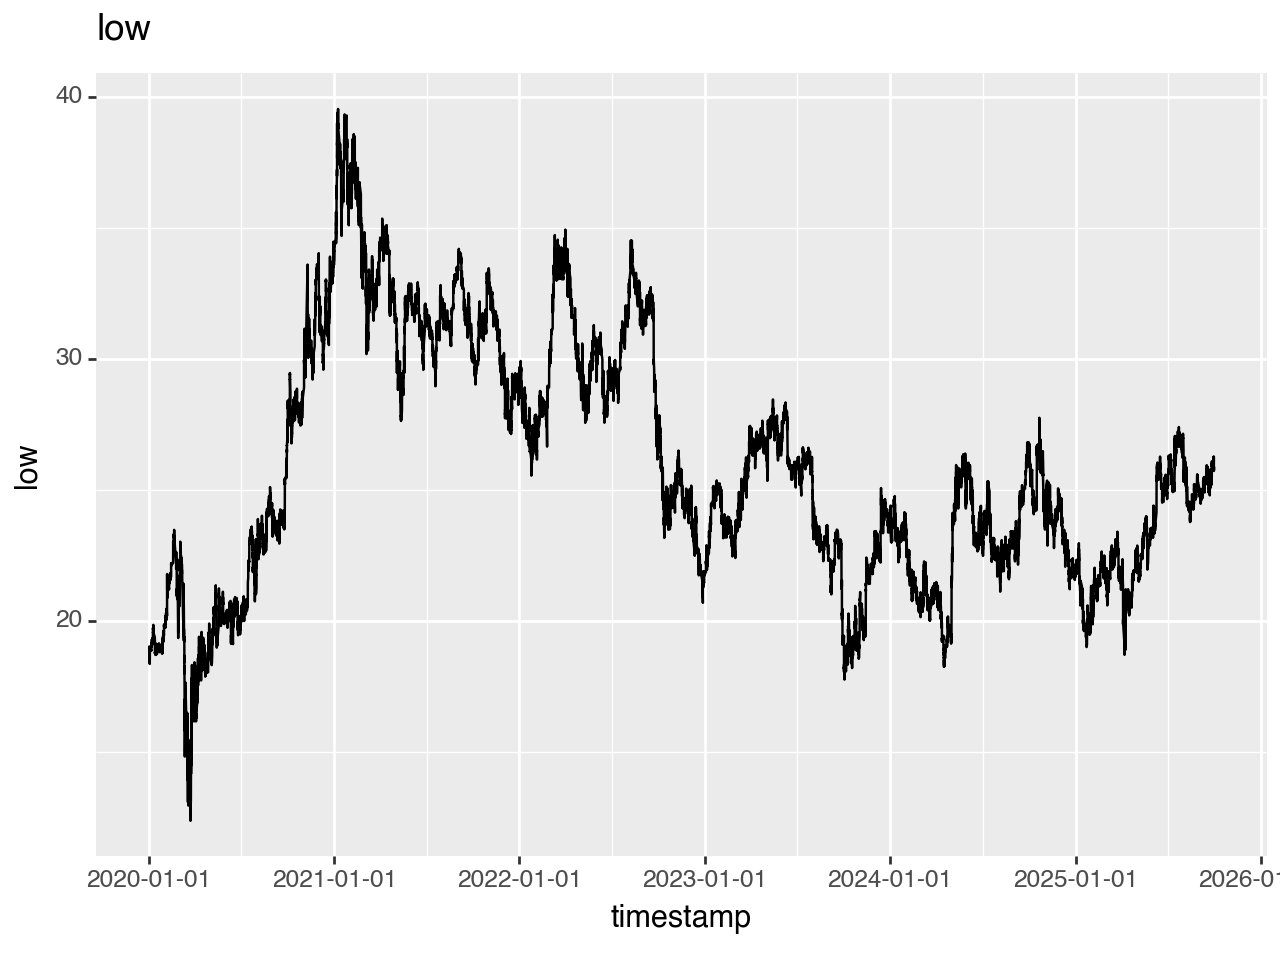

<Figure Size: (640 x 480)>

In [18]:
plot_timeseries(bep_df, 'low')

# Returns

In [19]:
#Load in AAPL data, make returns, variance, and volatility
AAPL_returns = pd.DataFrame({
    "time_stamp": aapl_df['timestamp'],
    "log_return": np.log(1+(aapl_df['close']-aapl_df['open'])/aapl_df['open'])
})
AAPL_returns['time_stamp'] = pd.to_datetime(AAPL_returns['time_stamp'], errors='coerce')
daily_variance_AAPL = AAPL_returns.groupby(AAPL_returns['time_stamp'].dt.floor("1D"))["log_return"].var()


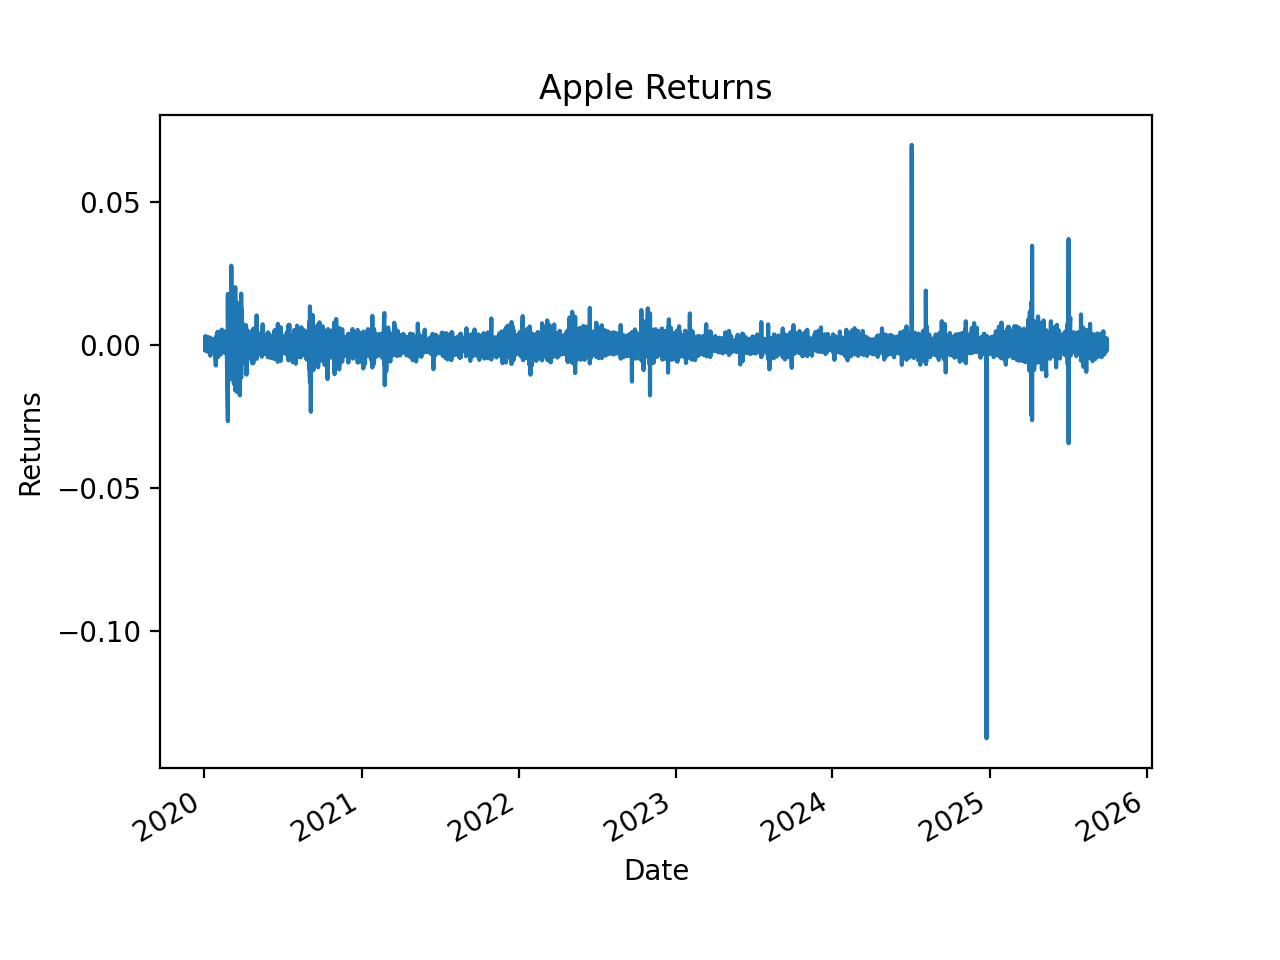

In [20]:
#Plot returns
AAPL_returns.set_index("time_stamp", inplace=True)
AAPL_returns.log_return.plot()
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("Apple Returns")
plt.show()

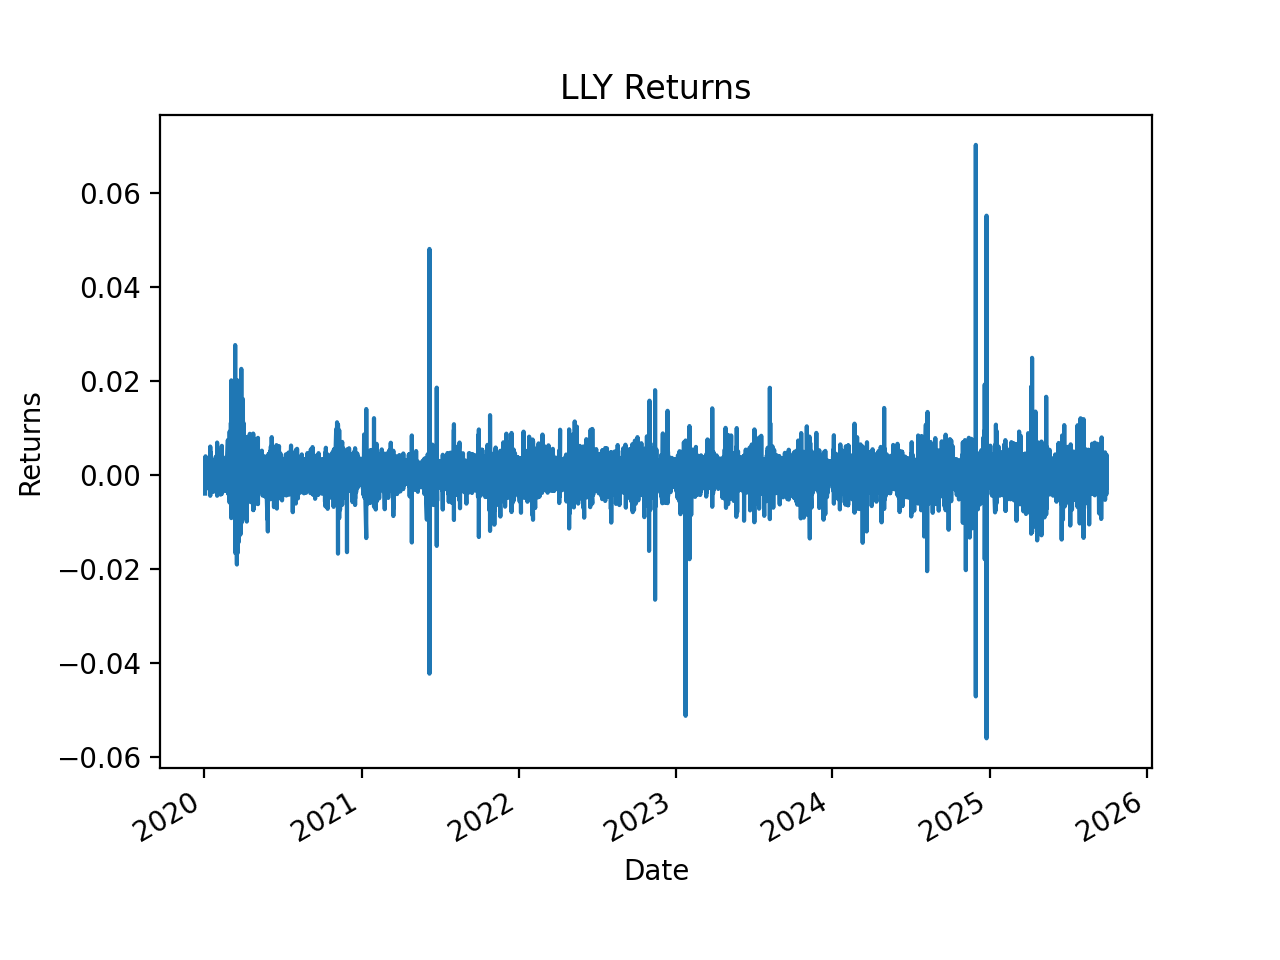

In [21]:
LLY_returns = pd.DataFrame({
    "time_stamp": lly_df["timestamp"],
    "log_return": np.log(1+(lly_df['close']-lly_df['open'])/lly_df['open'])
})
LLY_returns['time_stamp'] = pd.to_datetime(LLY_returns['time_stamp'], errors='coerce')
daily_variance_LLY = LLY_returns.groupby(LLY_returns['time_stamp'].dt.floor("1D"))["log_return"].var()

LLY_returns.set_index("time_stamp", inplace=True)
LLY_returns.log_return.plot()
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("LLY Returns")
plt.show()

In [22]:
BEP_returns = pd.DataFrame({
    "time_stamp": bep_df["timestamp"],
    "log_return": np.log(1+(bep_df['close']-bep_df['open'])/bep_df['open'])
})
BEP_returns['time_stamp'] = pd.to_datetime(BEP_returns['time_stamp'], errors='coerce')
daily_variance_BEP = BEP_returns.groupby(BEP_returns['time_stamp'].dt.floor("1D"))["log_return"].var()

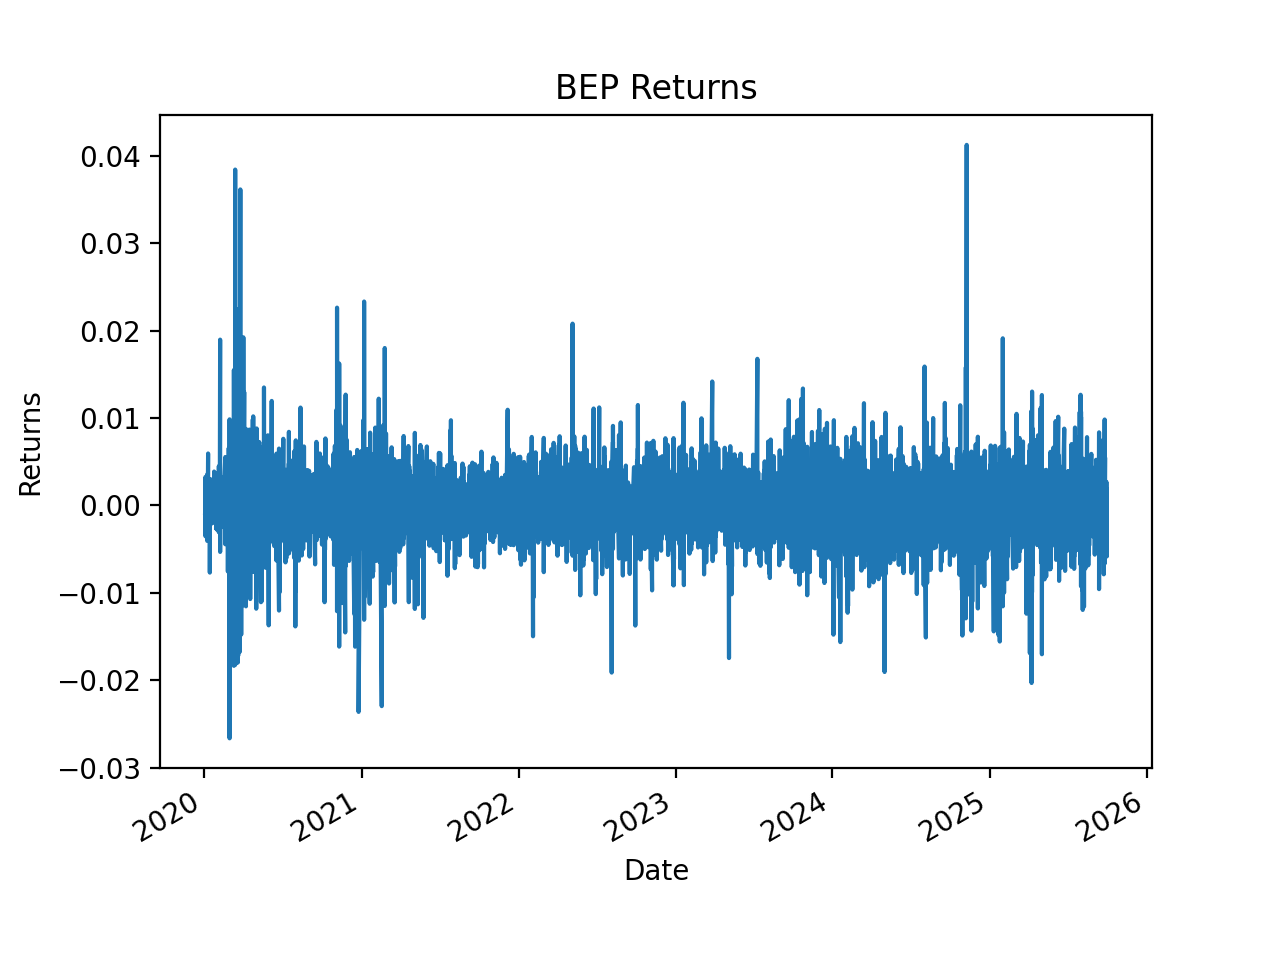

In [23]:
BEP_returns.set_index("time_stamp", inplace=True)
BEP_returns.log_return.plot()
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("BEP Returns")
plt.show()

# Variance

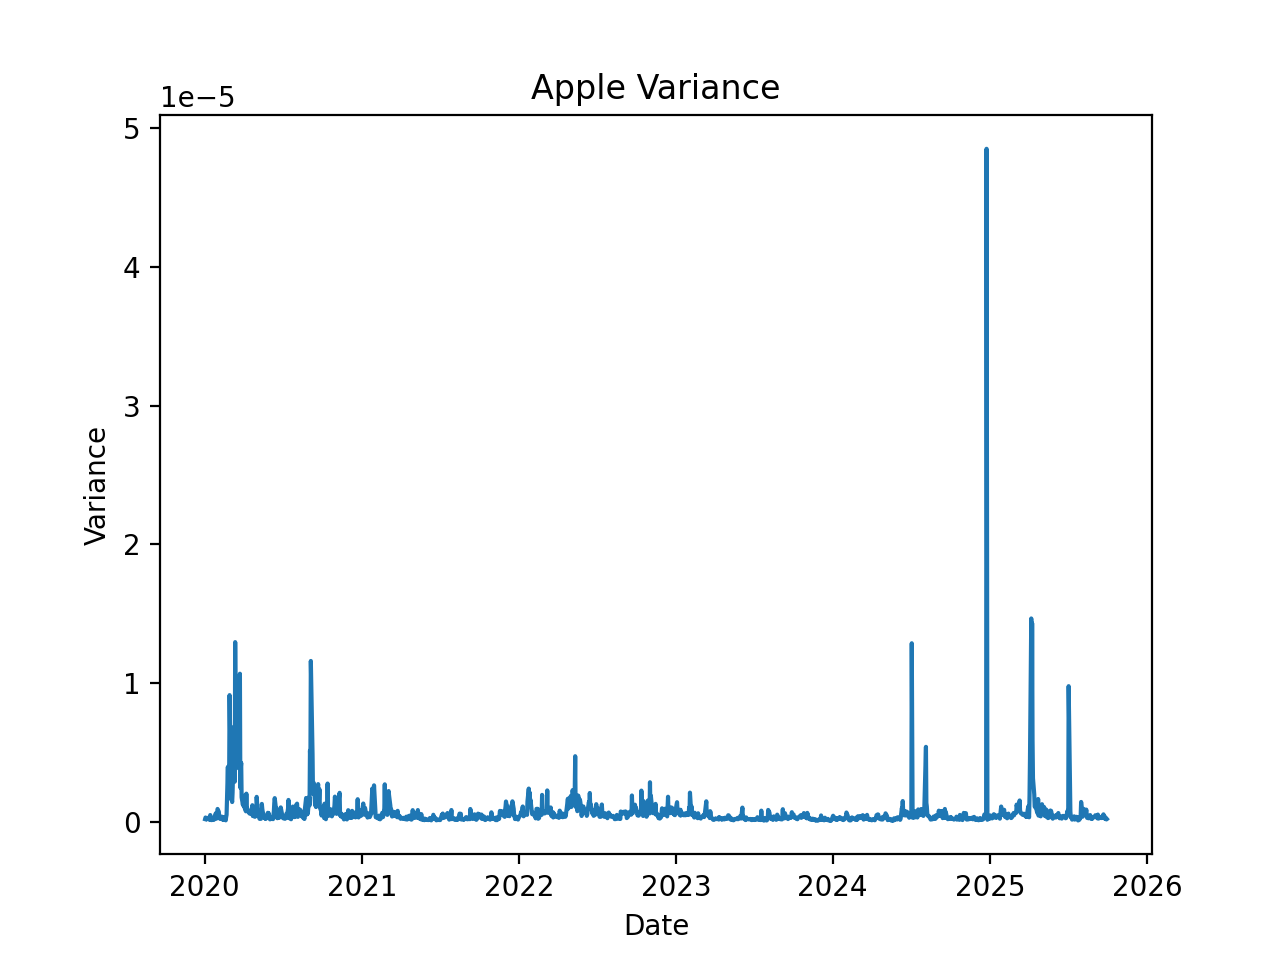

In [24]:
#Plot variance
plt.plot(daily_variance_AAPL.index, daily_variance_AAPL.values)
plt.xlabel("Date")
plt.ylabel("Variance")
plt.title("Apple Variance")
plt.show()

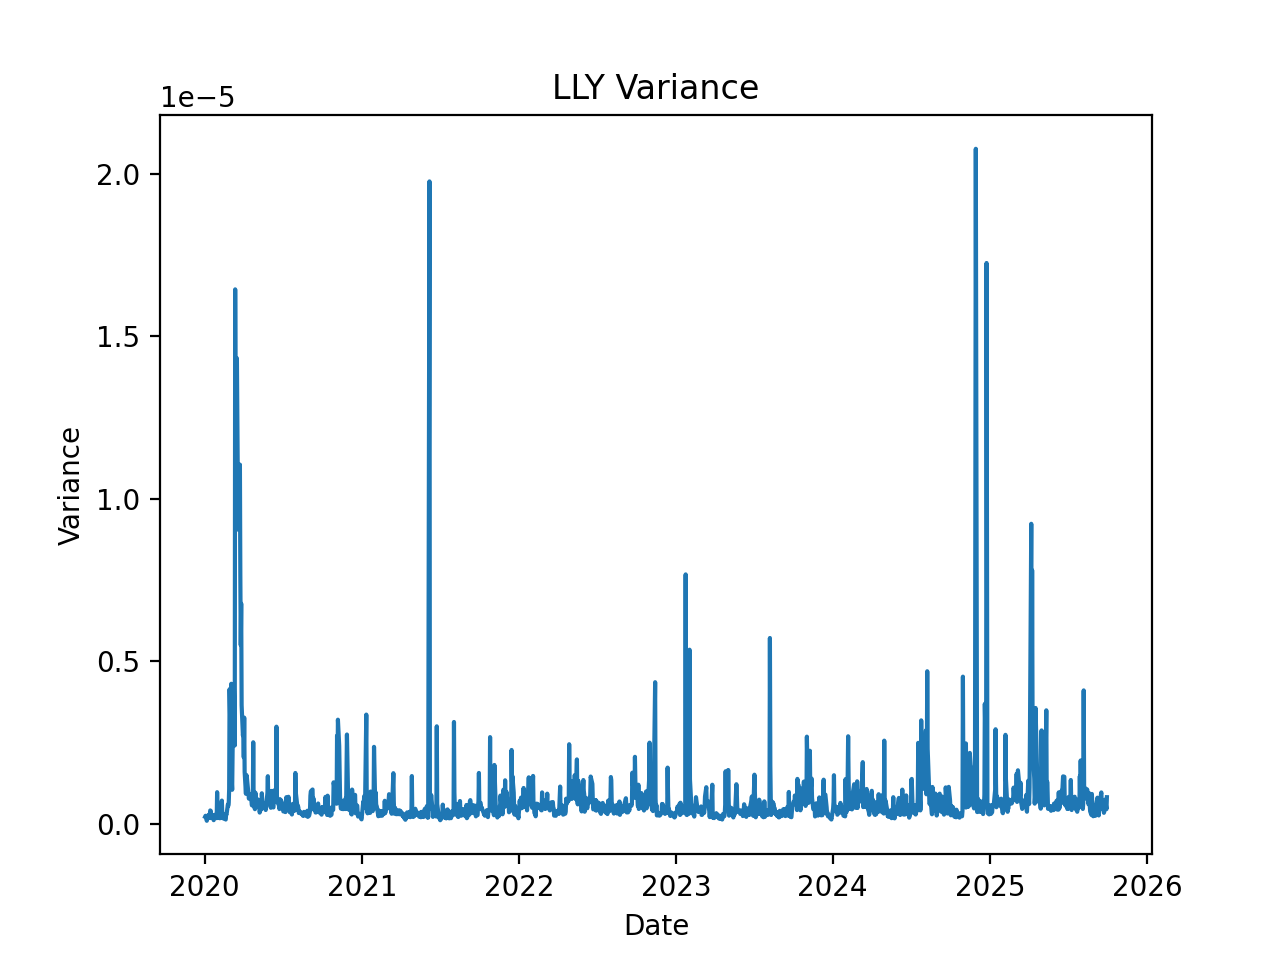

In [25]:
plt.plot(daily_variance_LLY.index, daily_variance_LLY.values)
plt.xlabel("Date")
plt.ylabel("Variance")
plt.title("LLY Variance")
plt.show()

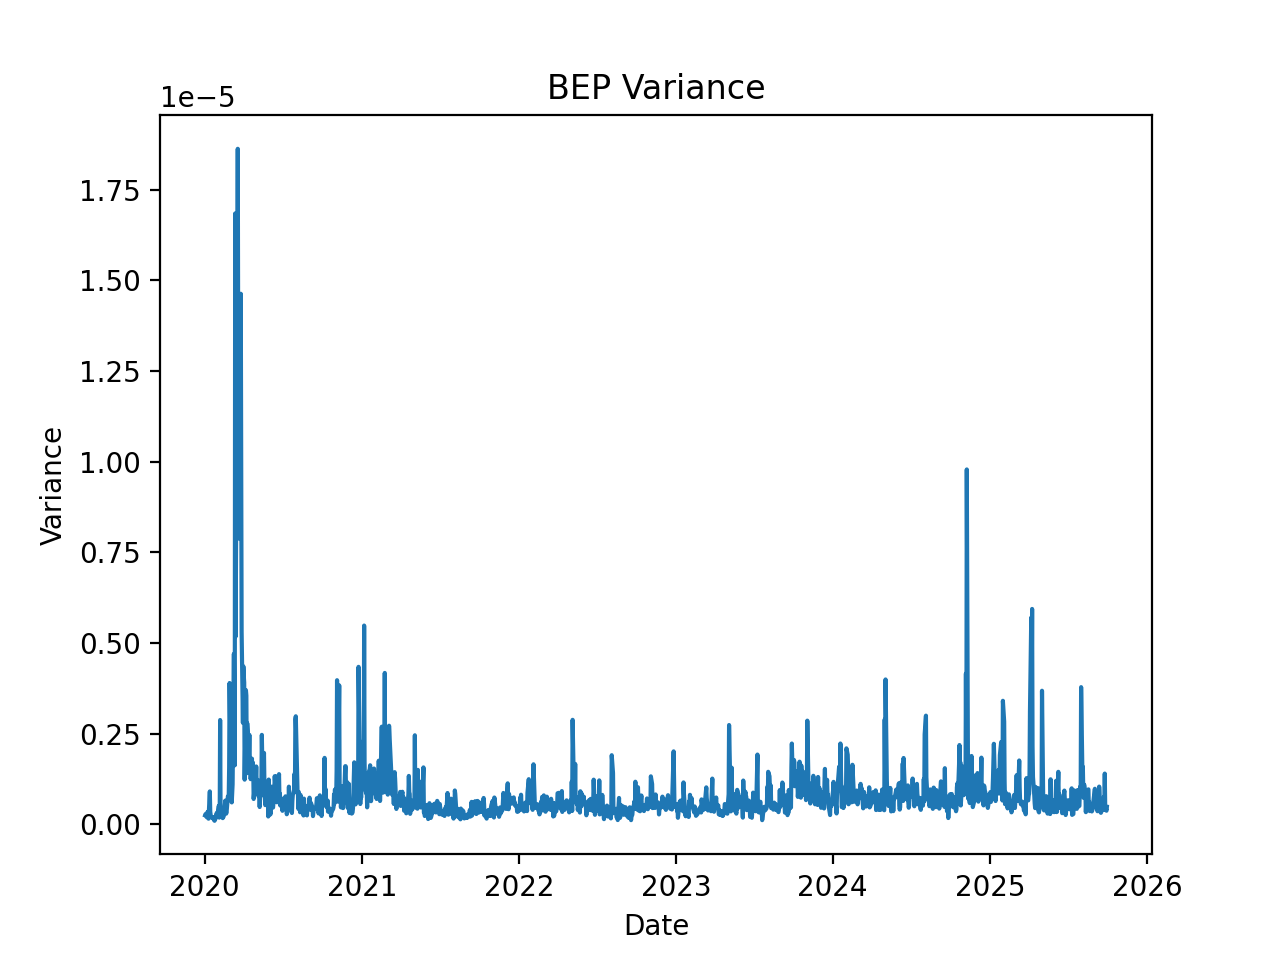

In [26]:
plt.plot(daily_variance_BEP.index, daily_variance_BEP.values)
plt.xlabel("Date")
plt.ylabel("Variance")
plt.title("BEP Variance")
plt.show()

# Volatility

## Daily Volatility

Realized Volatility

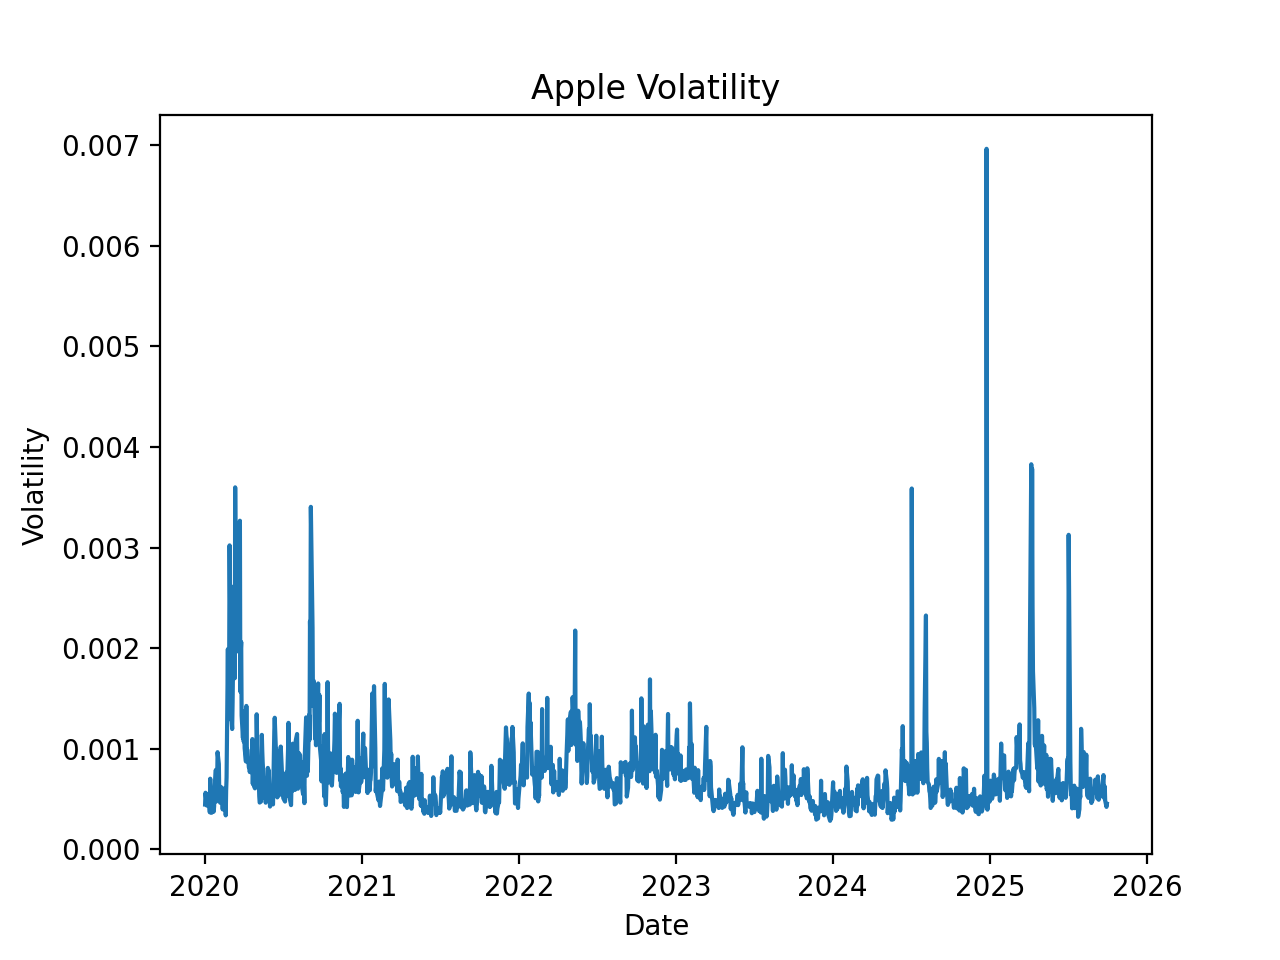

In [27]:
#Plot volatility
daily_volatility_APPL = np.sqrt(daily_variance_AAPL)
plt.plot(daily_volatility_APPL.index, daily_volatility_APPL.values)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Apple Volatility")
plt.show()

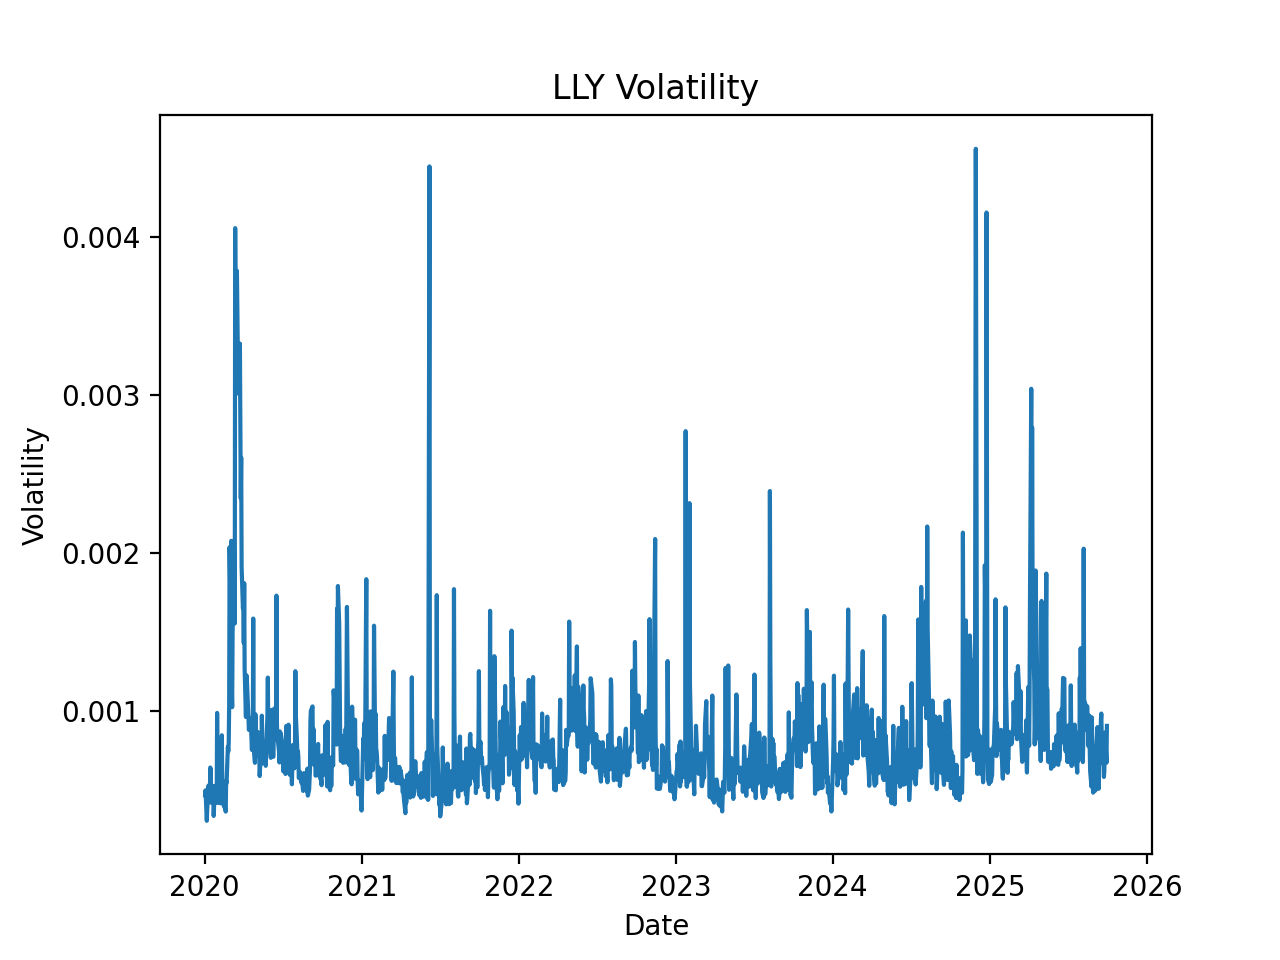

In [28]:
daily_volatility_LLY = np.sqrt(daily_variance_LLY)
plt.plot(daily_volatility_LLY.index, daily_volatility_LLY.values)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("LLY Volatility")
plt.show()

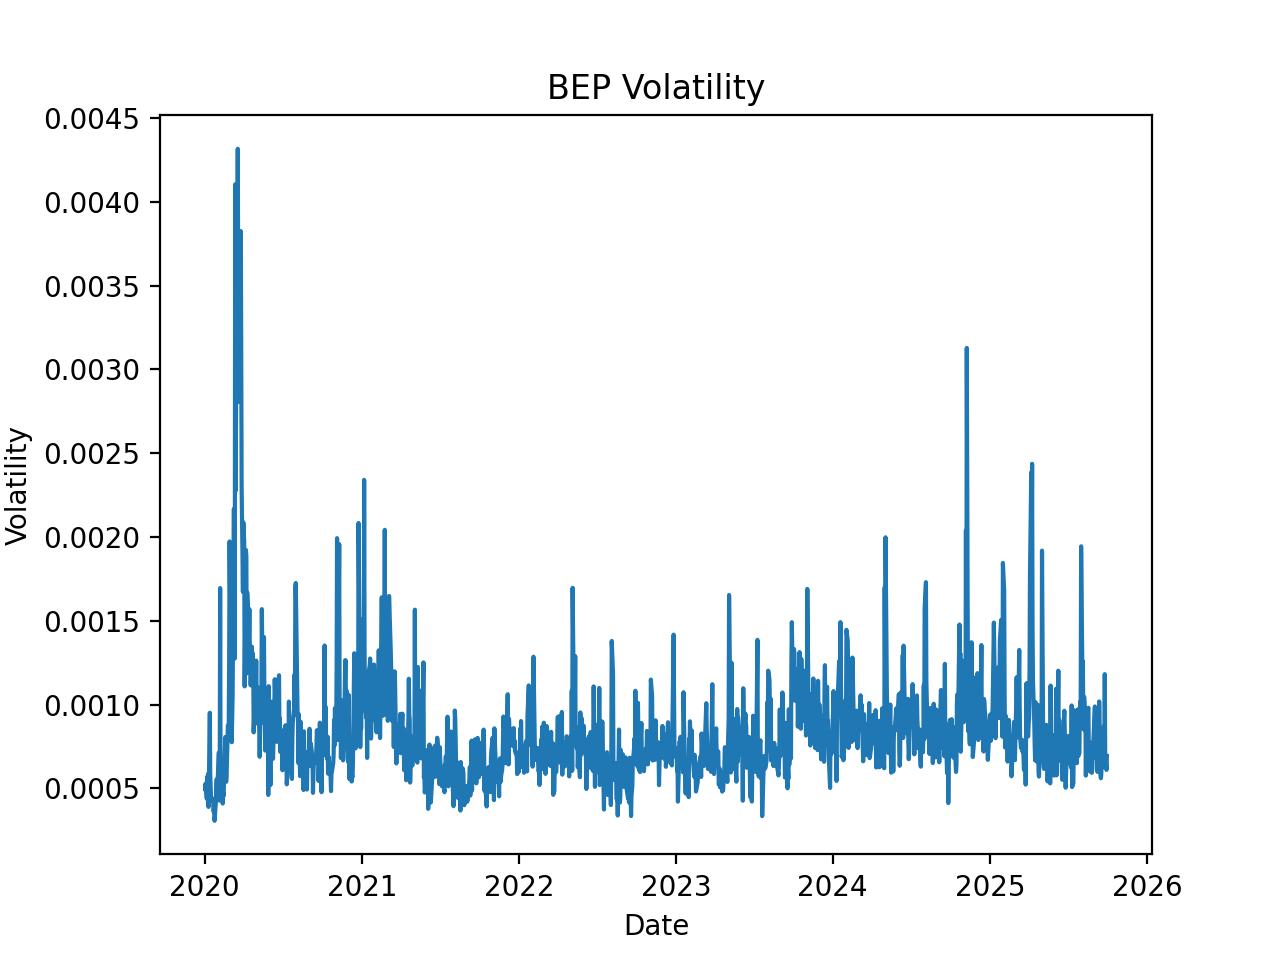

In [29]:
daily_volatility_BEP = np.sqrt(daily_variance_BEP)
plt.plot(daily_volatility_BEP.index, daily_volatility_BEP.values)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("BEP Volatility")
plt.show()

## Aggregated Volatility

Value ranges

In [30]:
def resample_data(df, frequency):
    agg_funcs = {'open': 'mean',
                 'close': 'mean',
                 'high': 'max',
                 'low': 'min',
                 'volume': 'sum'}
    
    df = df.set_index('timestamp')

    resampled_df = df.resample(frequency).agg(agg_funcs)
    
    resampled_df = resampled_df.reset_index()

    return resampled_df

def volatility_df(df, frequency):
    
    resampled_df = resample_data(df, frequency)

    resampled_df['open-close'] = resampled_df['open'] - resampled_df['close']
    resampled_df['high-low'] = resampled_df['high'] - resampled_df['low']
    
    return resampled_df

time_intervals = ['1H', '1D', 'W', '1M', 'Q', 'Y'] # day, month, week, month, quarter, year

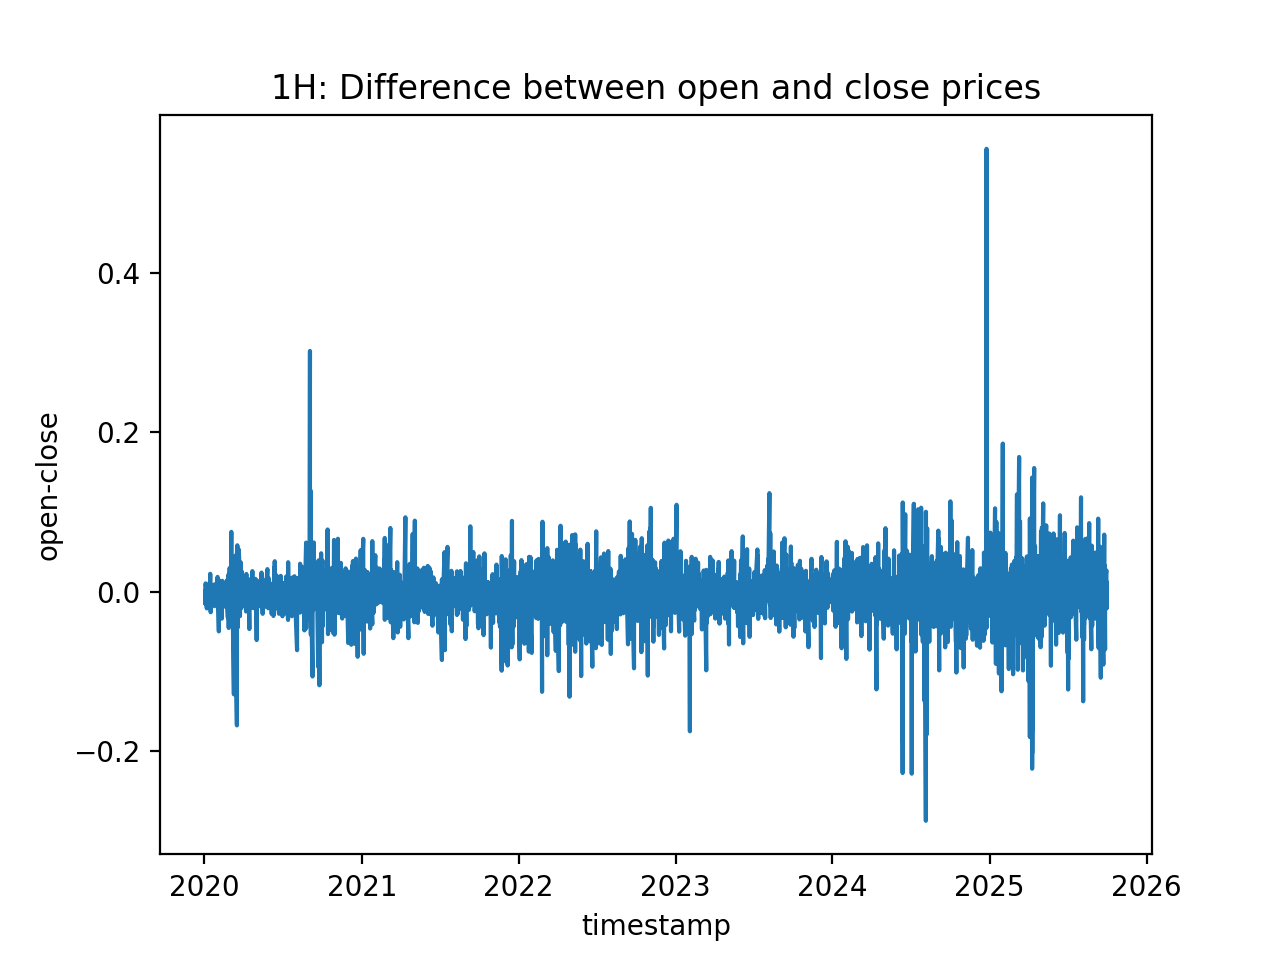

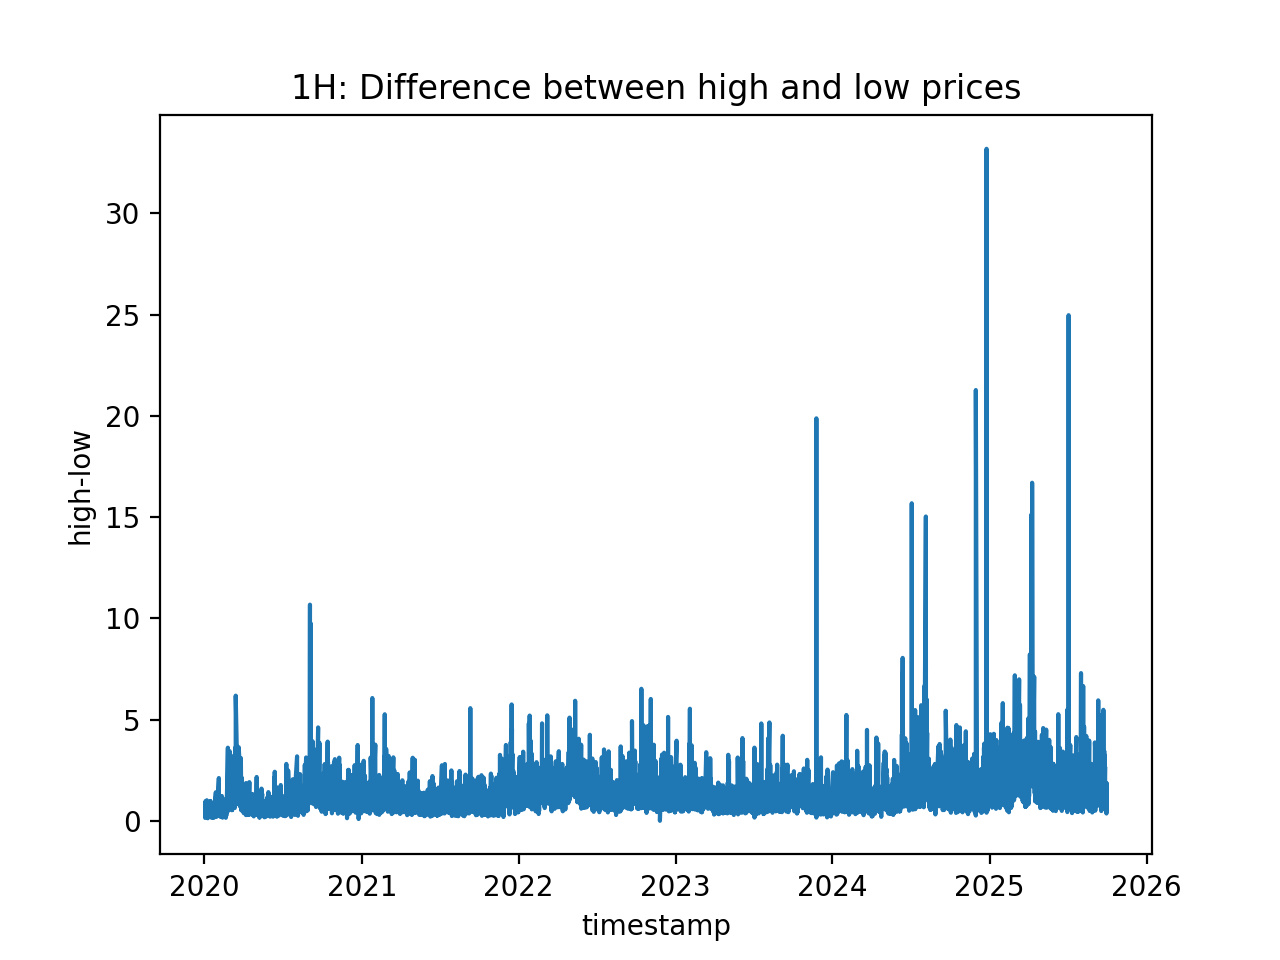

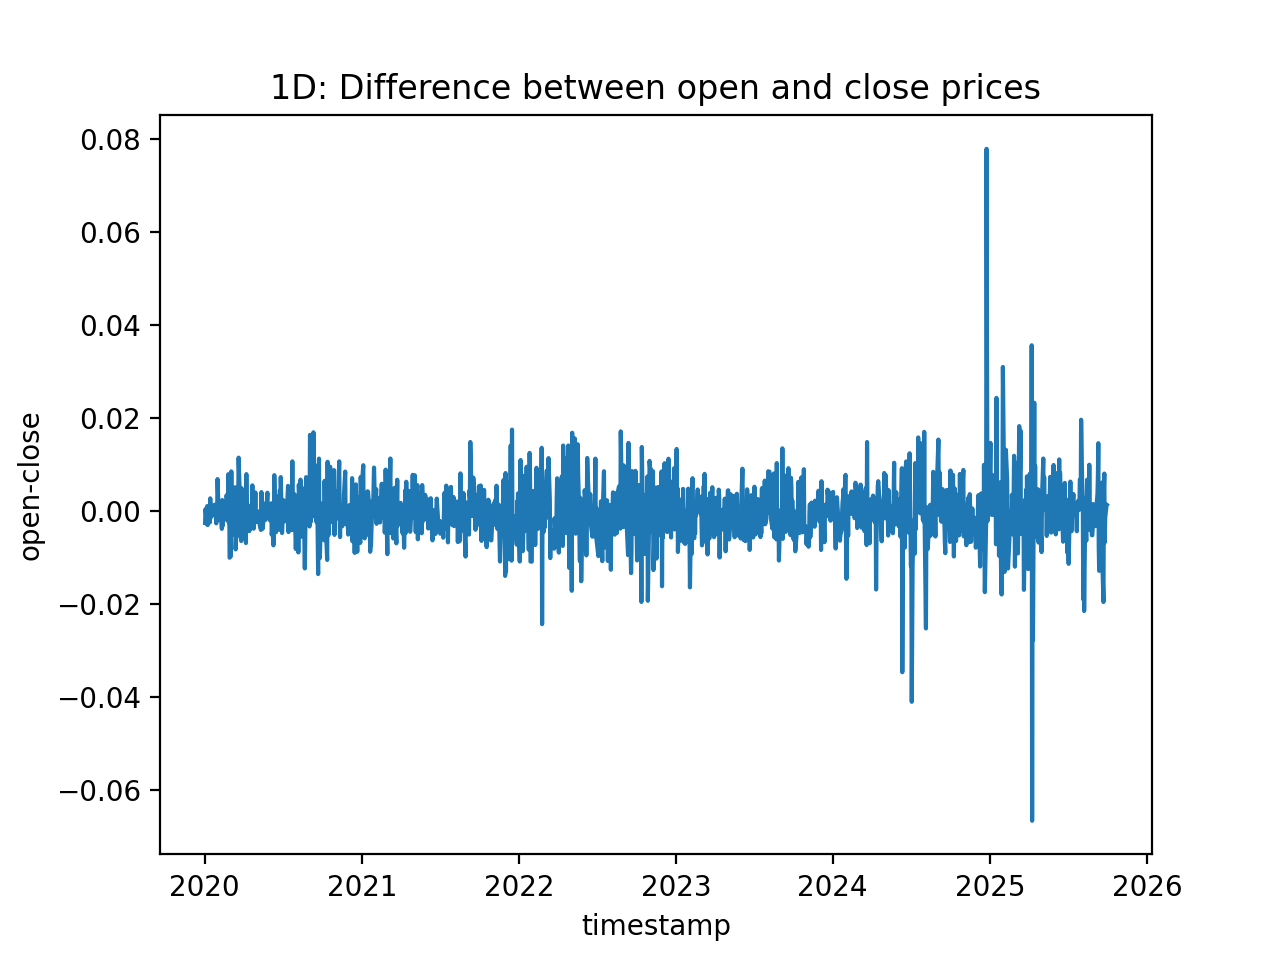

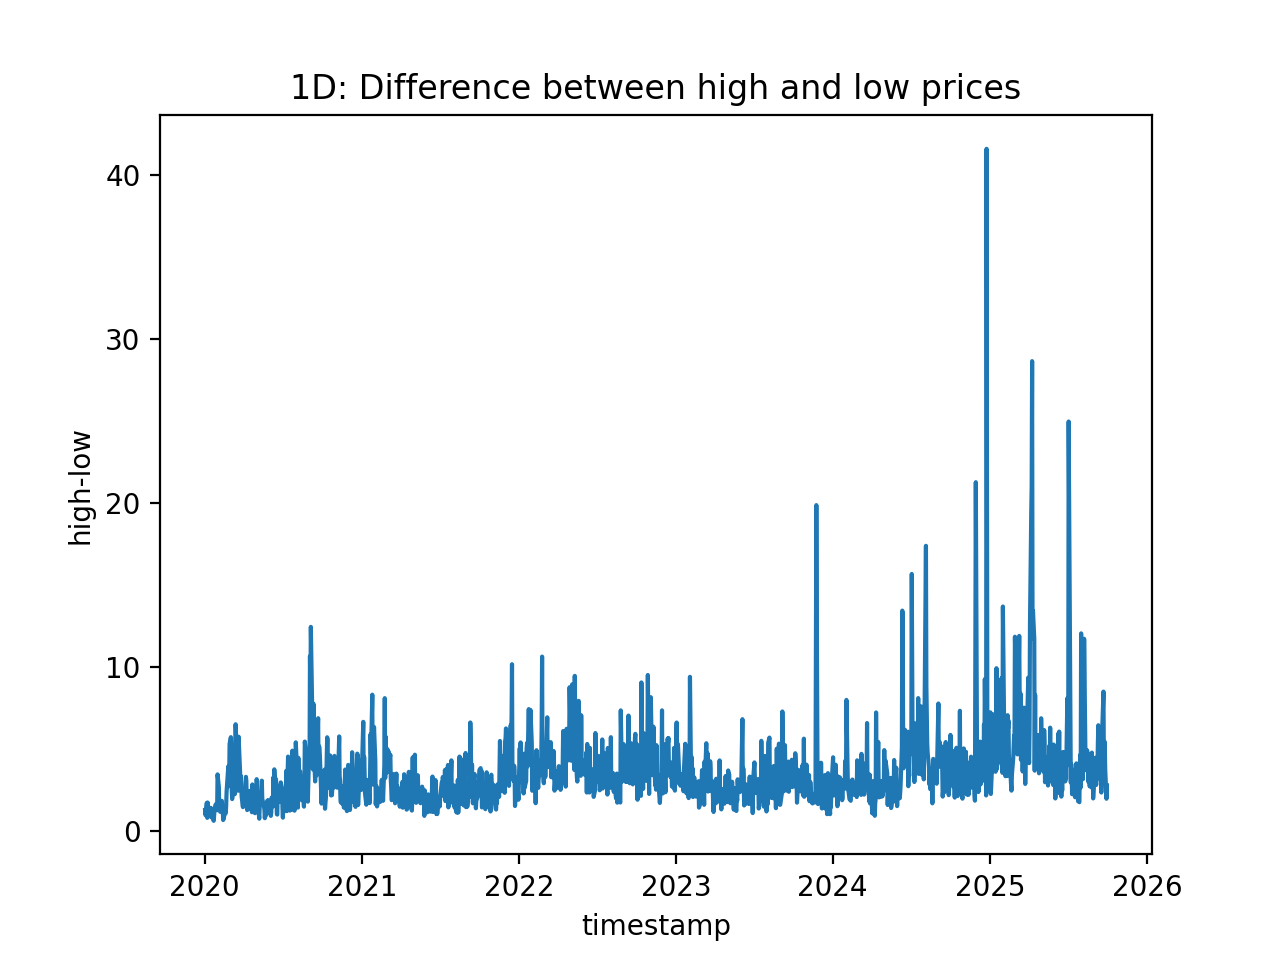

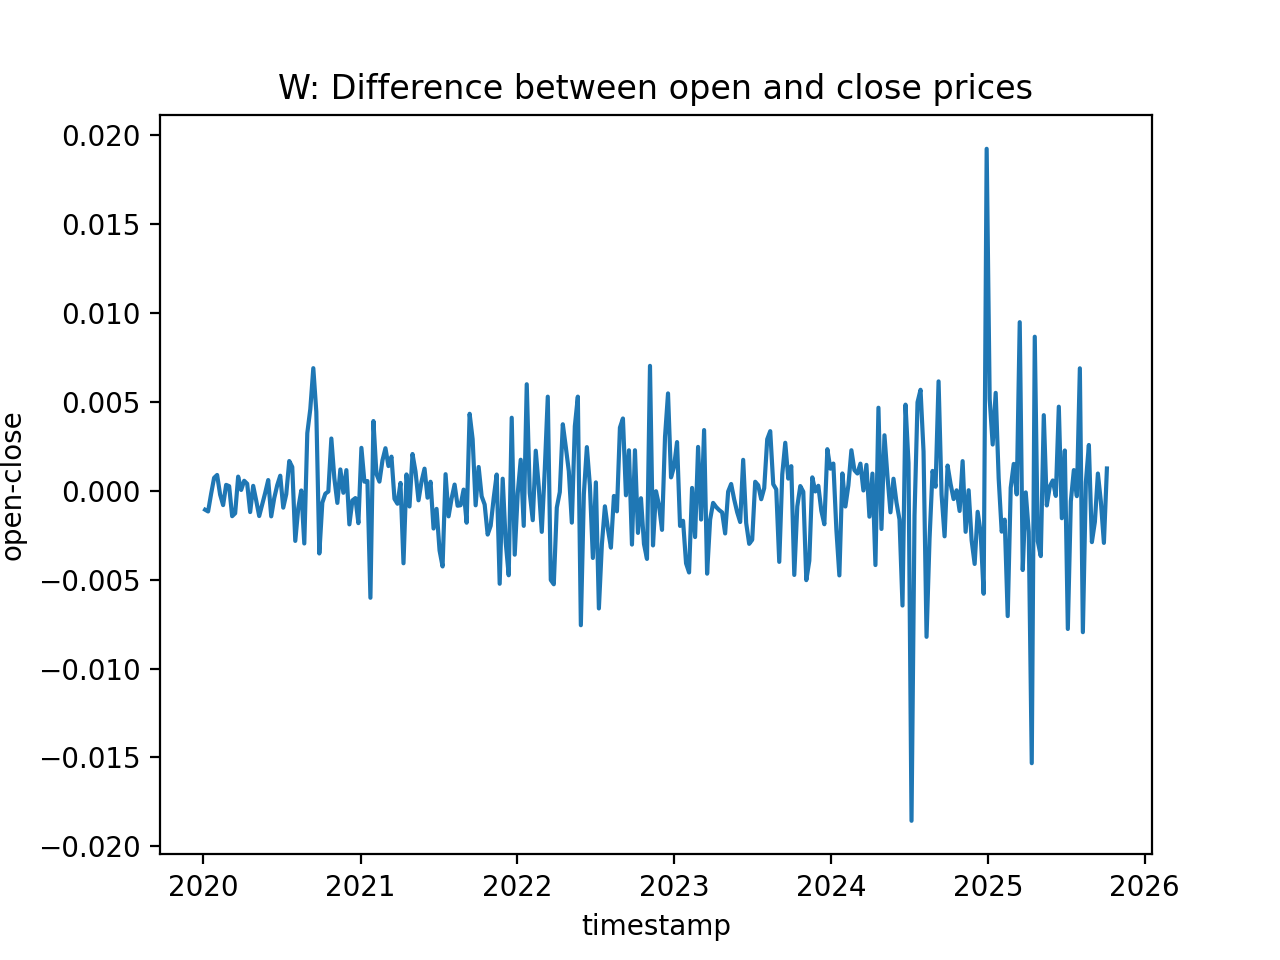

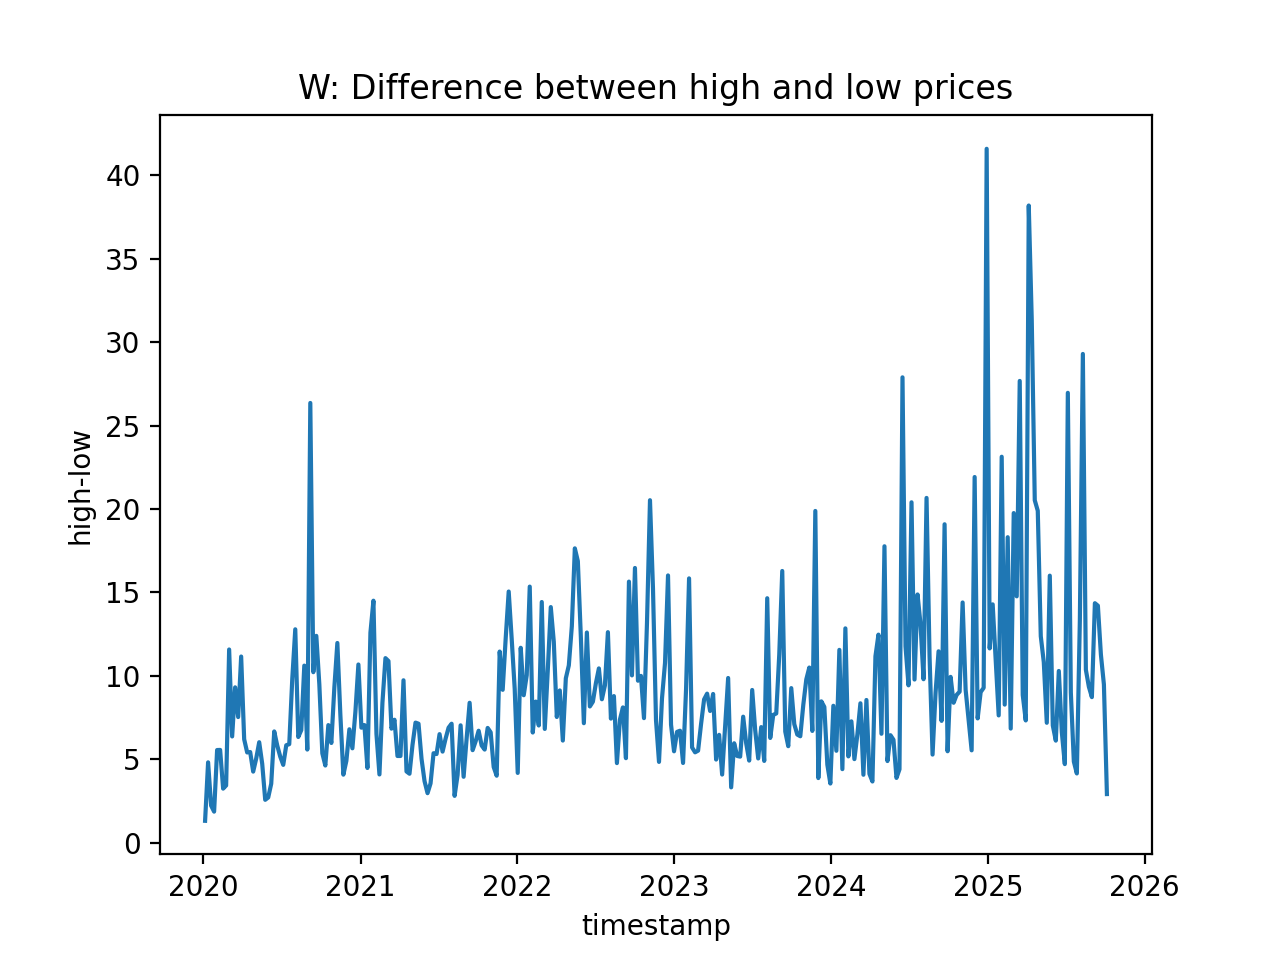

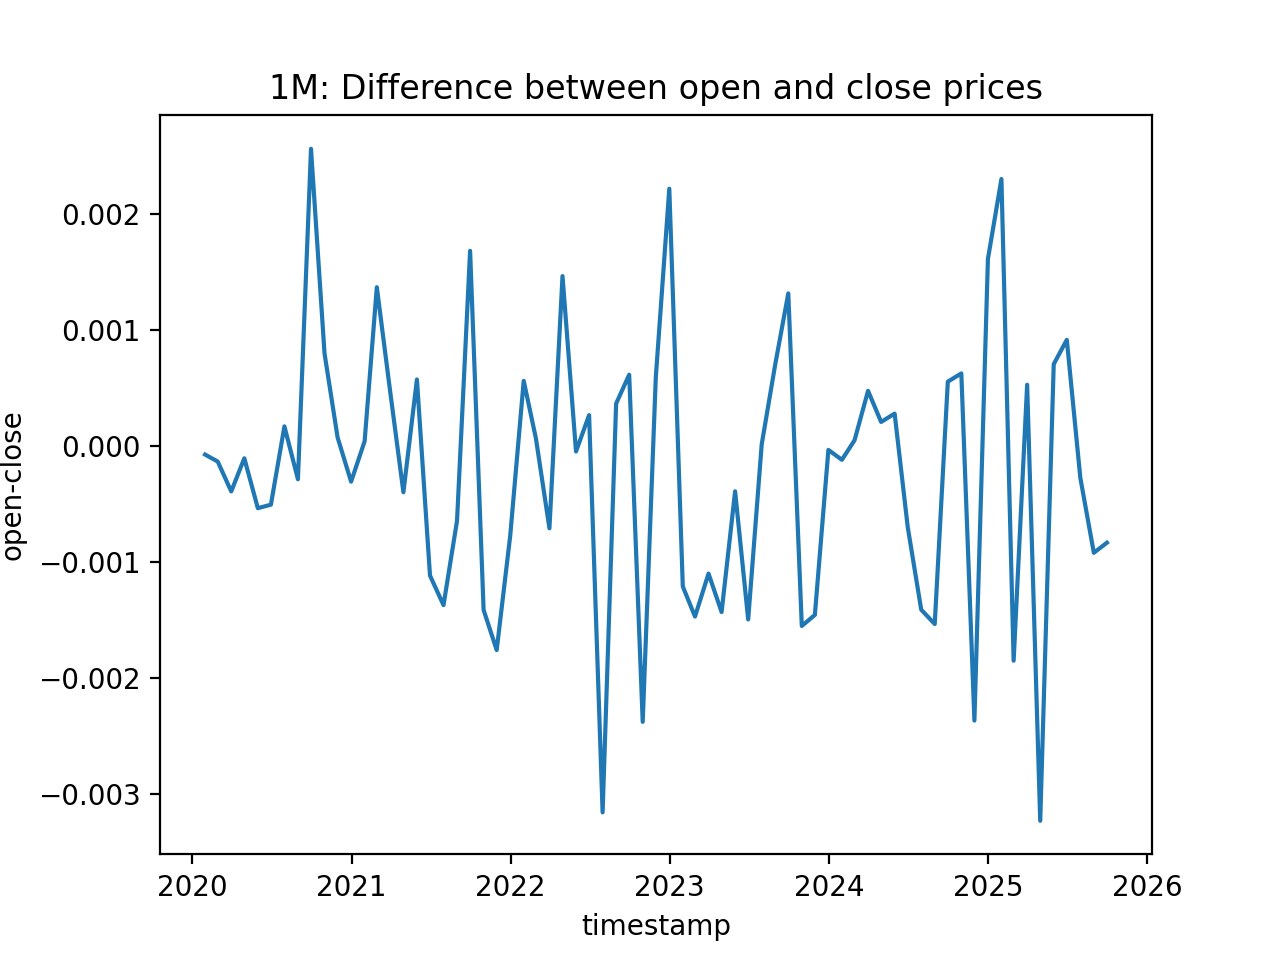

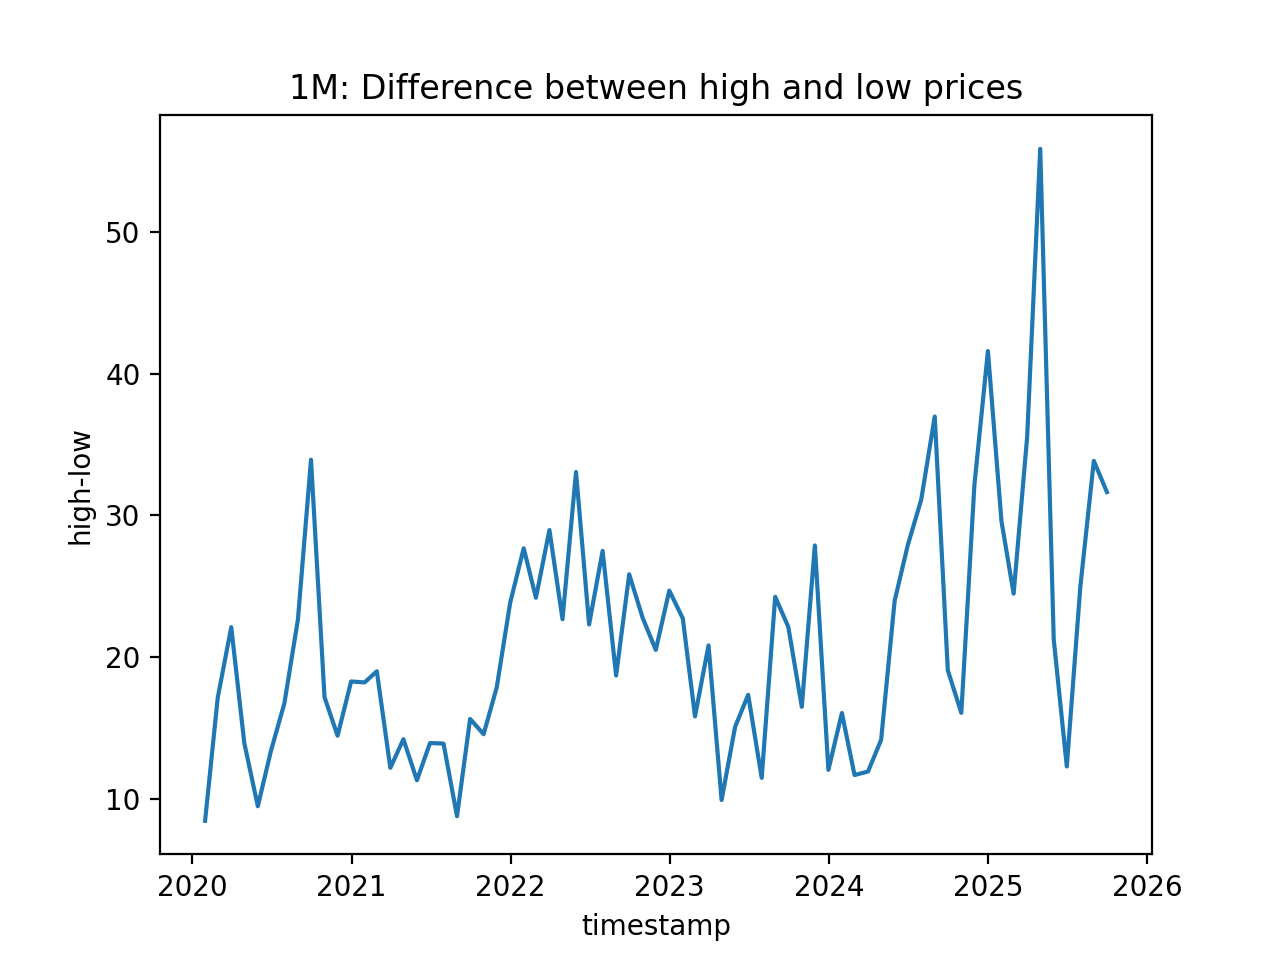

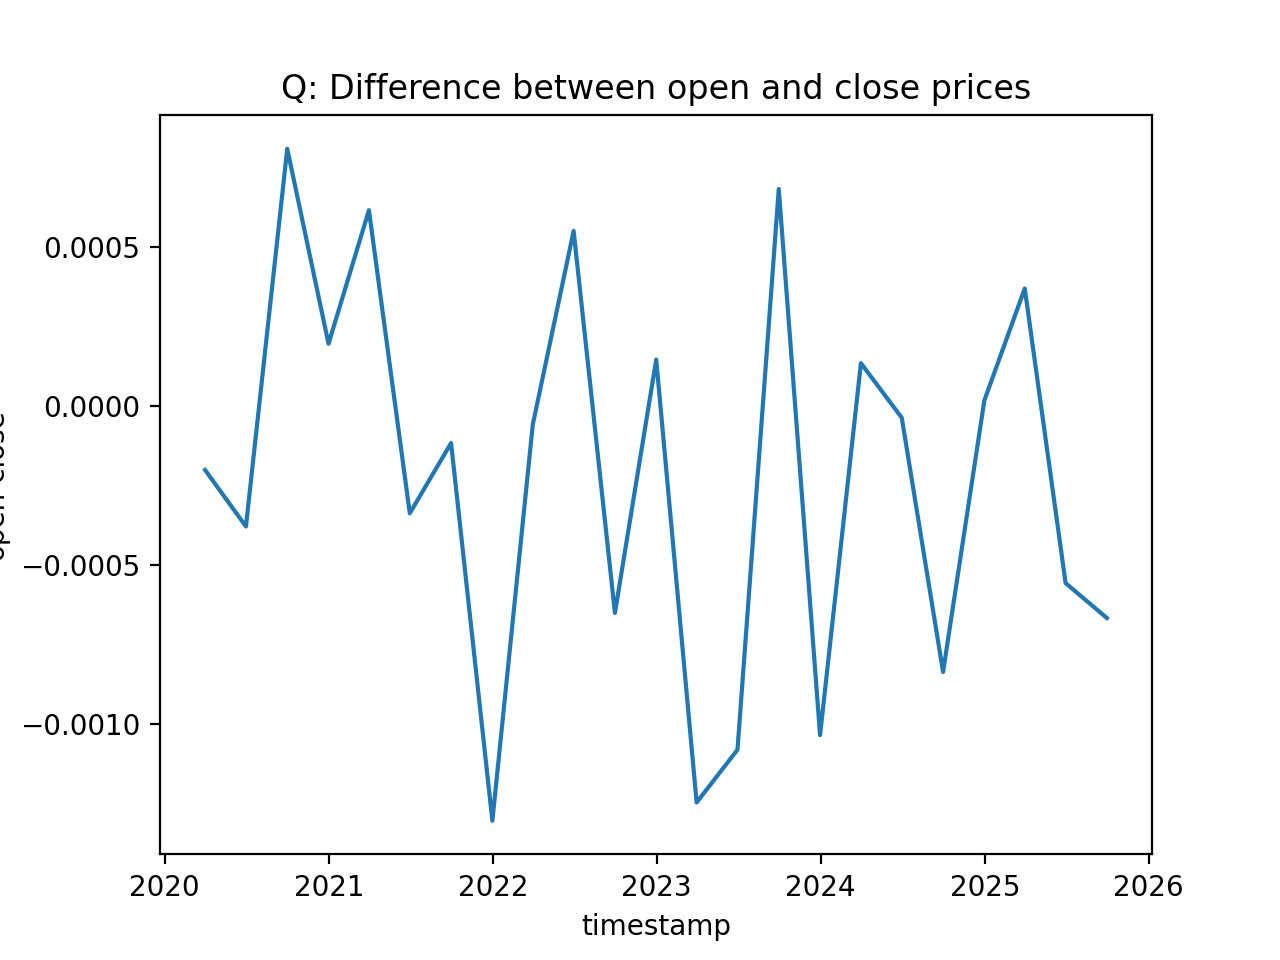

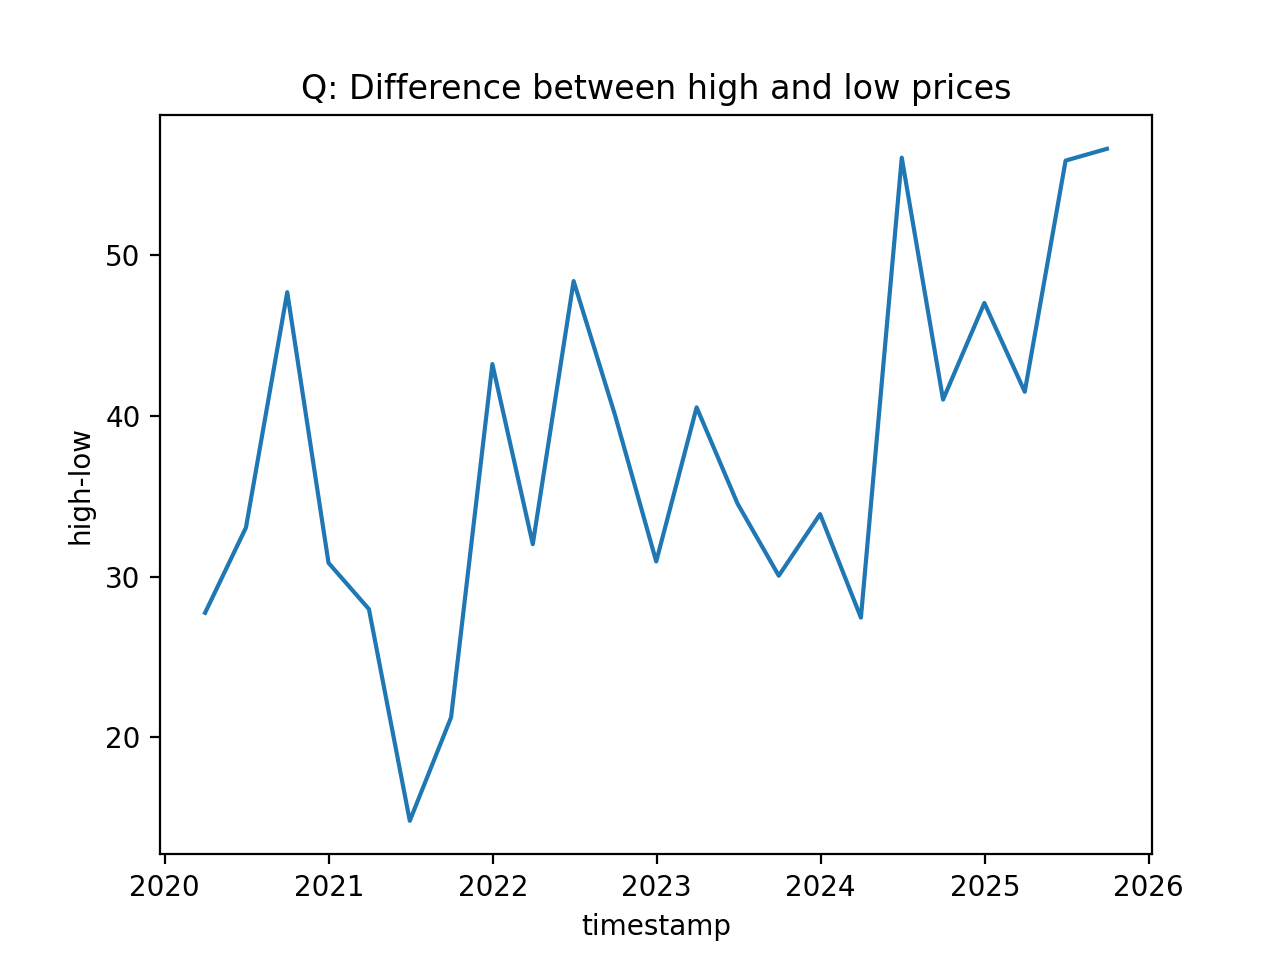

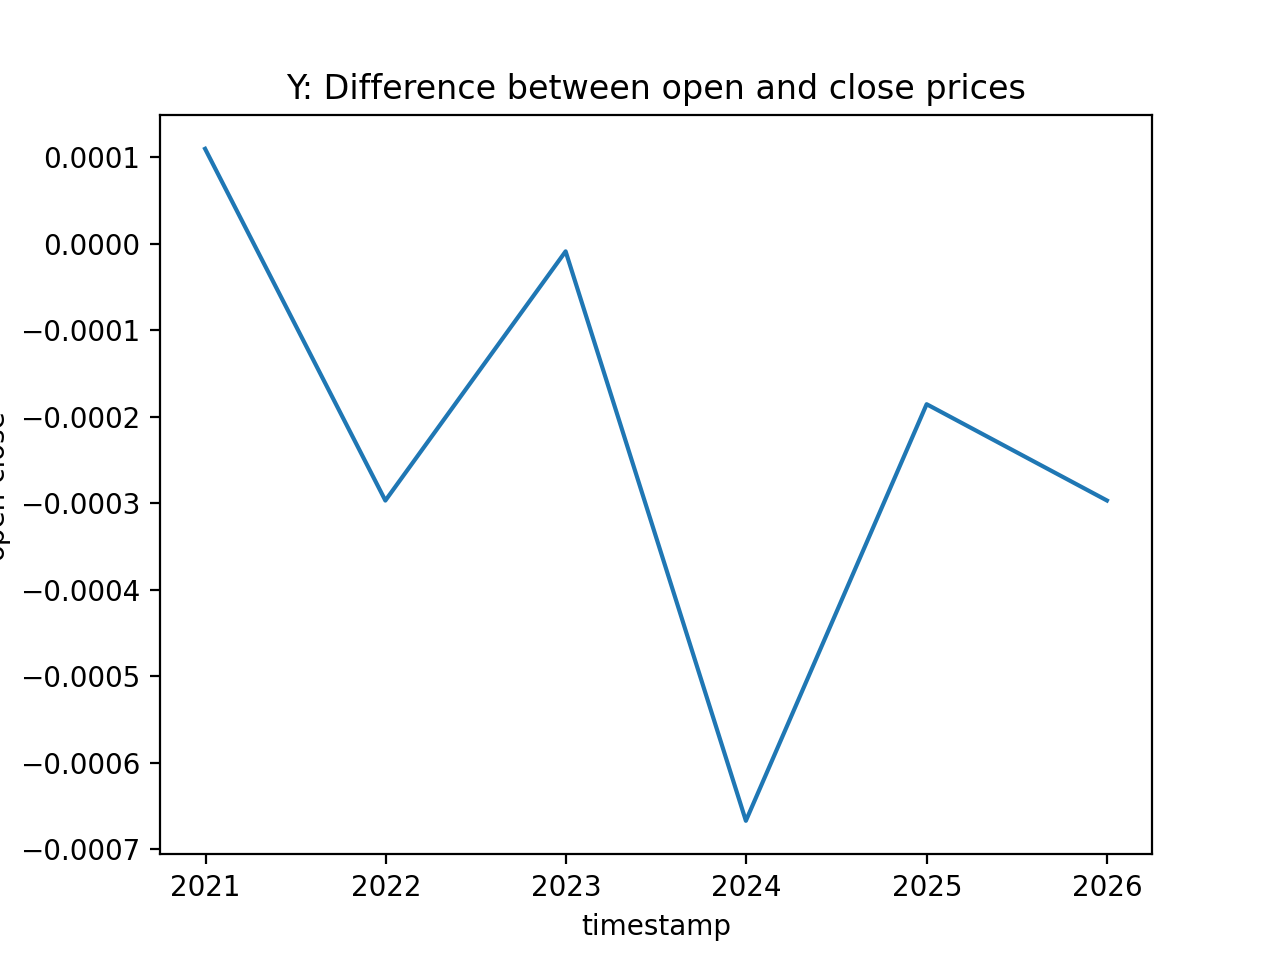

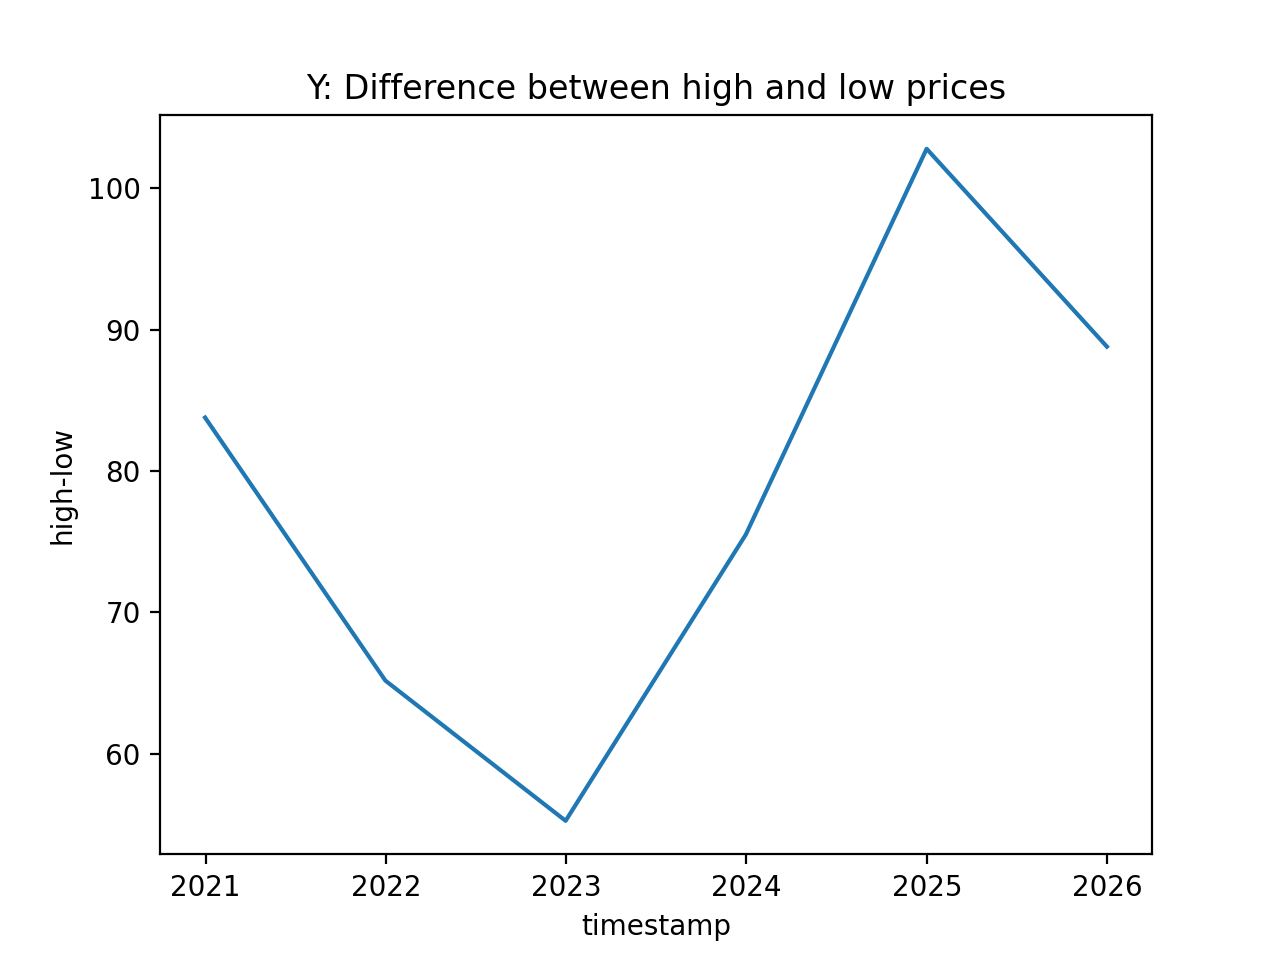

In [31]:
for inter in time_intervals:
    aapl_ranges = volatility_df(aapl_df, inter)

    plt.figure()
    sns.lineplot(data=aapl_ranges, x='timestamp', y='open-close')
    plt.title(f'{inter}: Difference between open and close prices')
    plt.show()

    plt.figure()
    sns.lineplot(data=aapl_ranges, x='timestamp', y='high-low')
    plt.title(f'{inter}: Difference between high and low prices')
    plt.show()

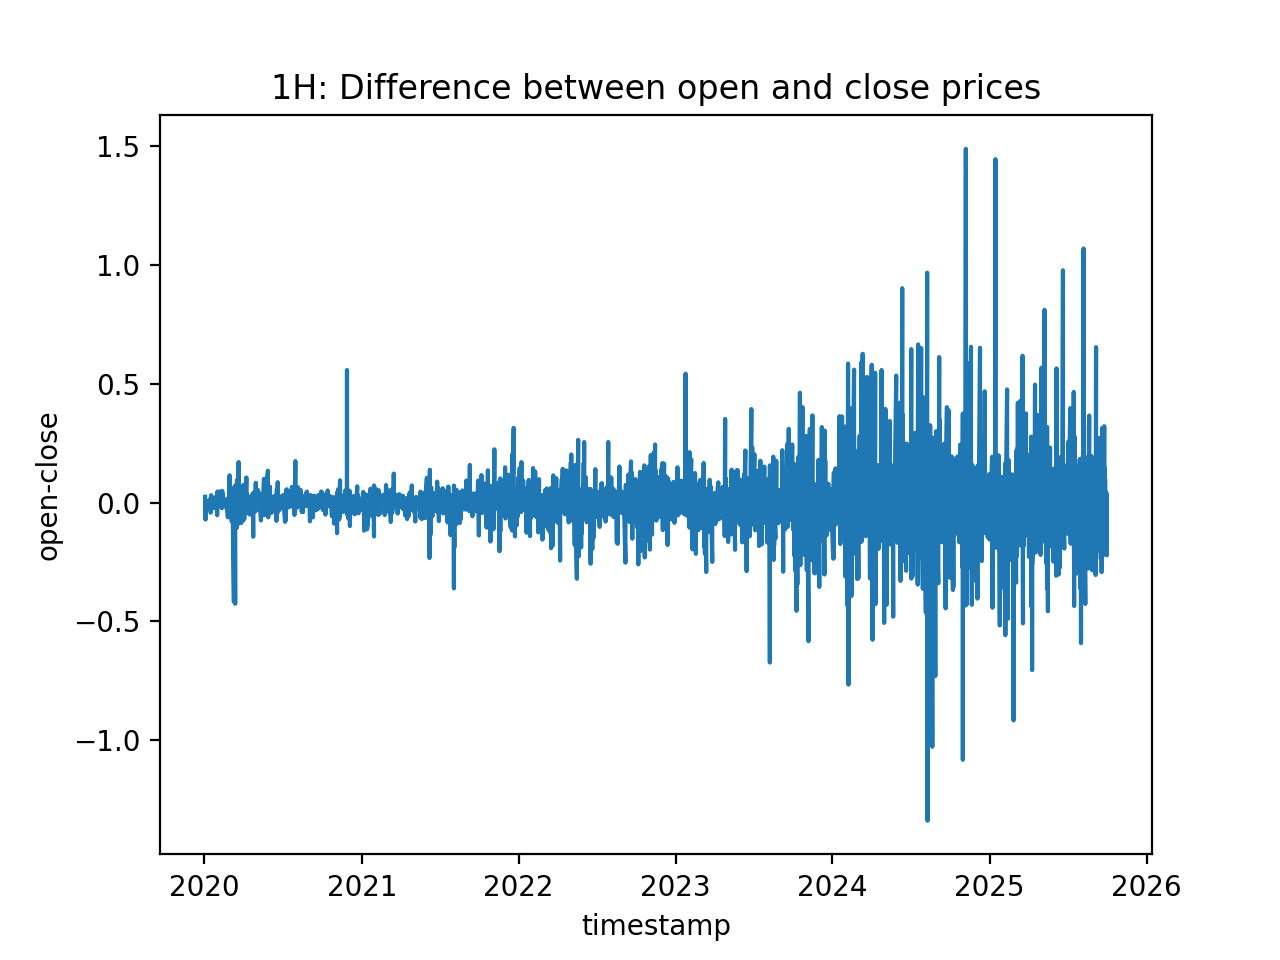

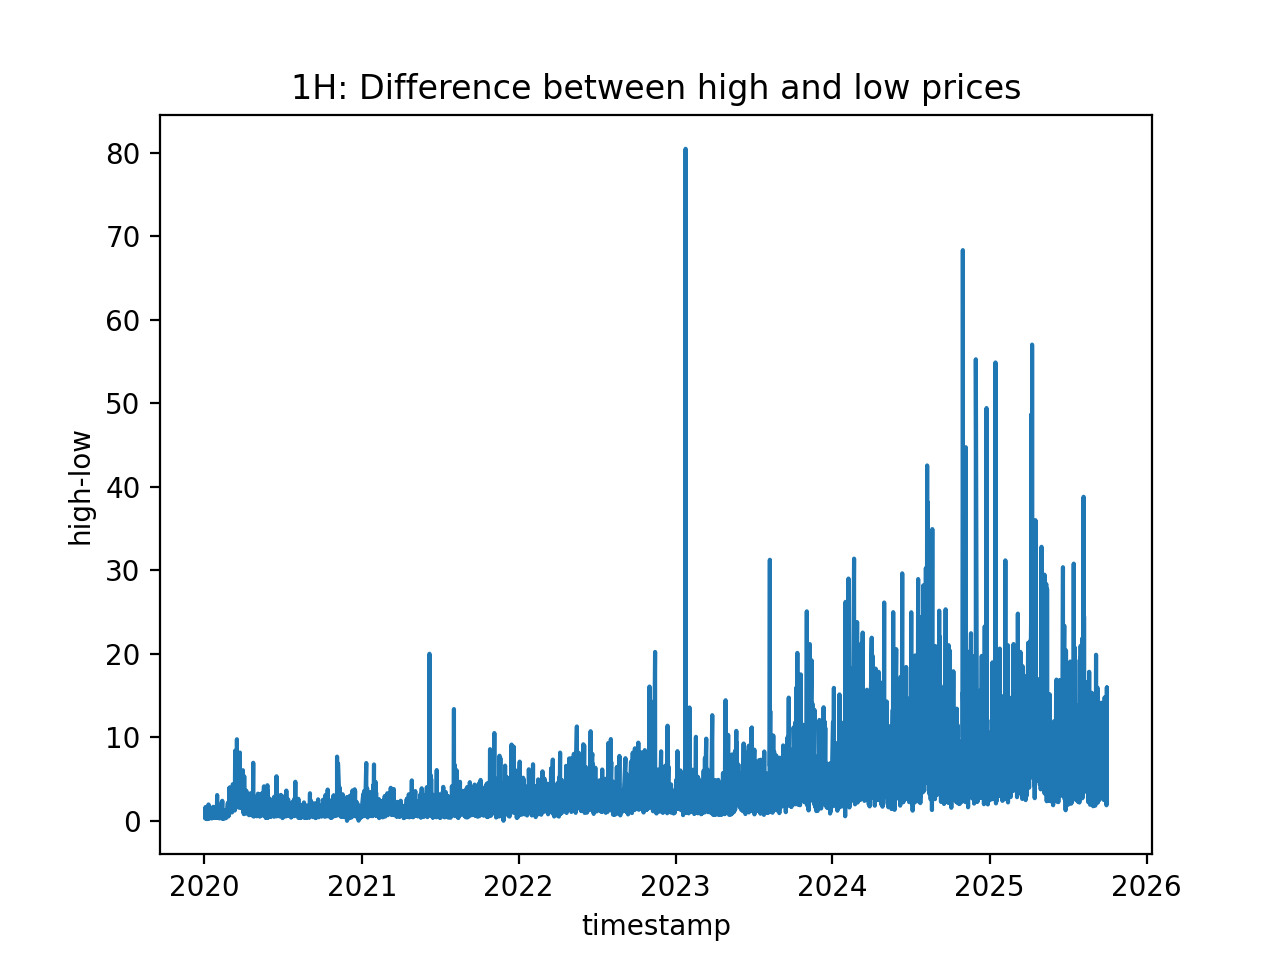

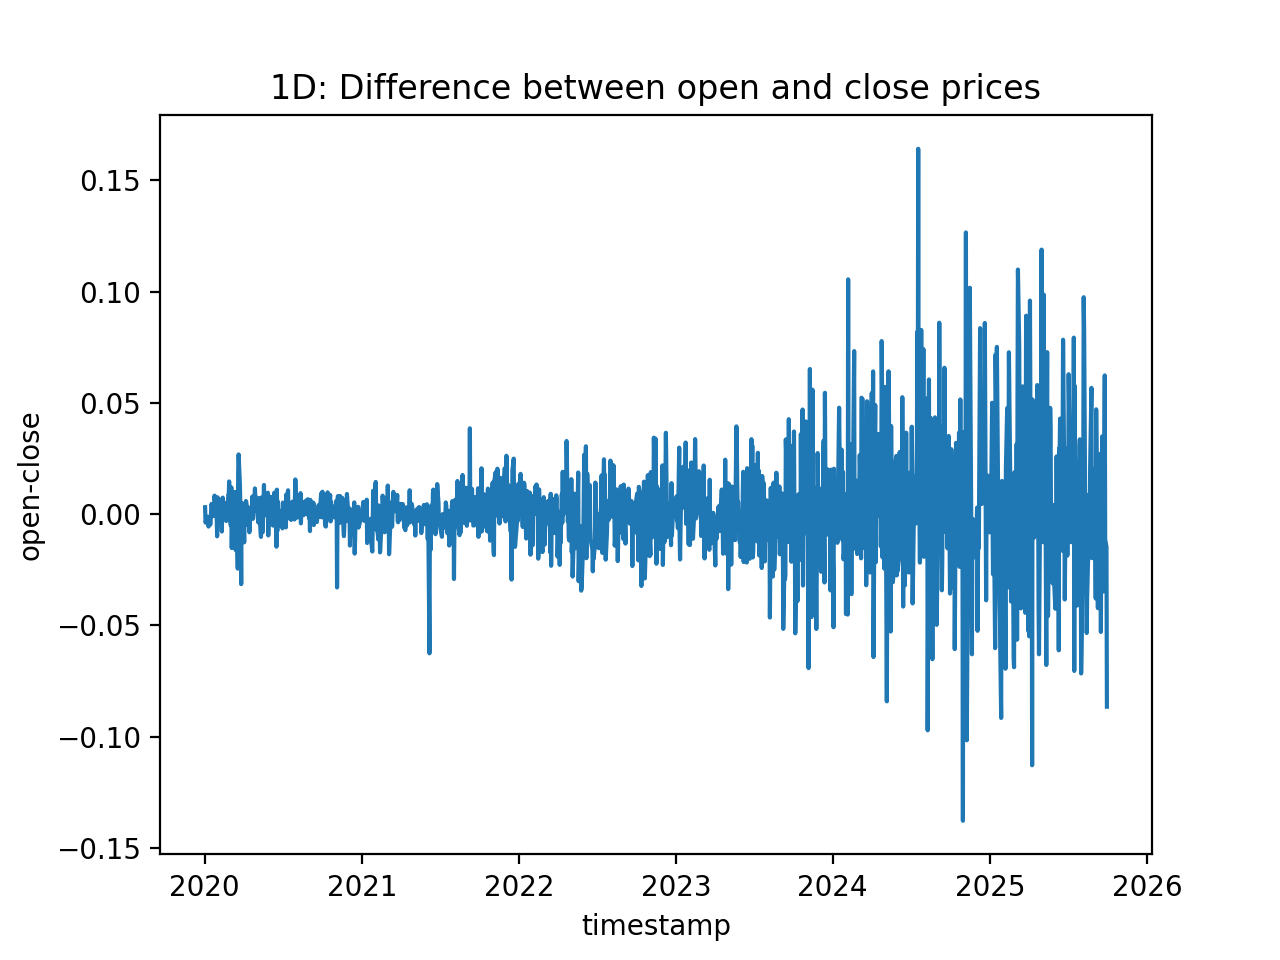

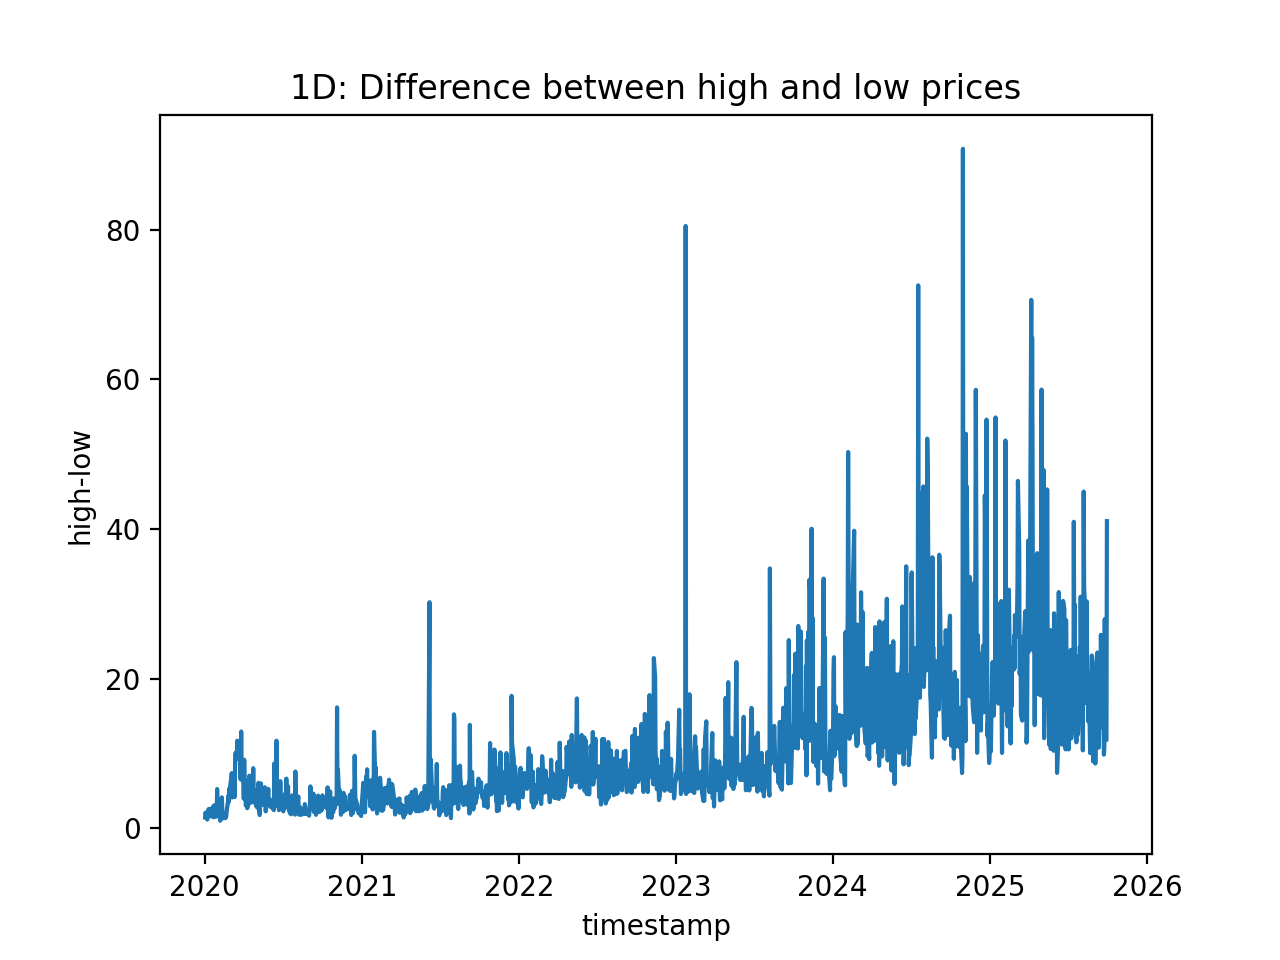

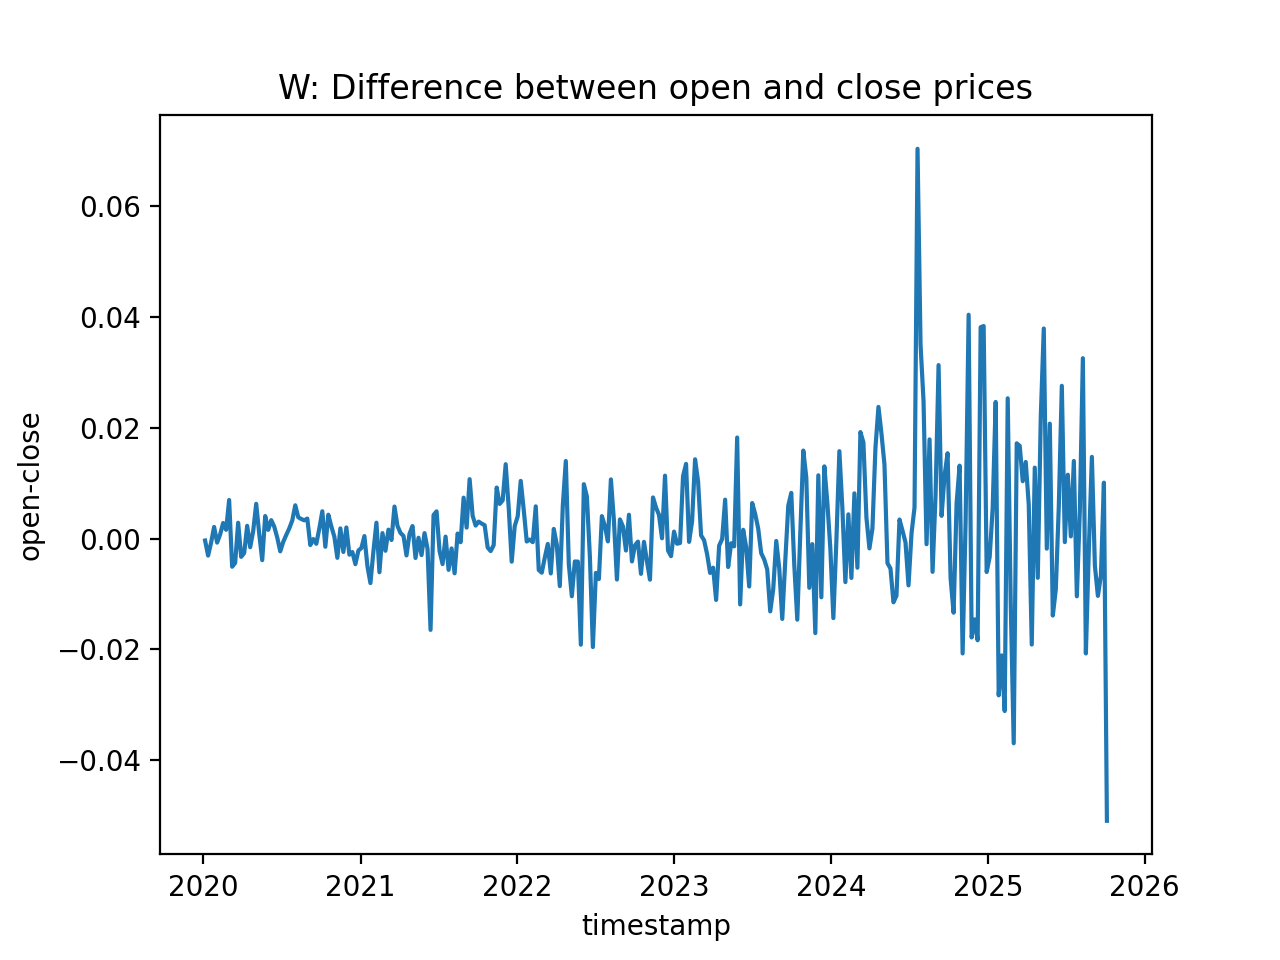

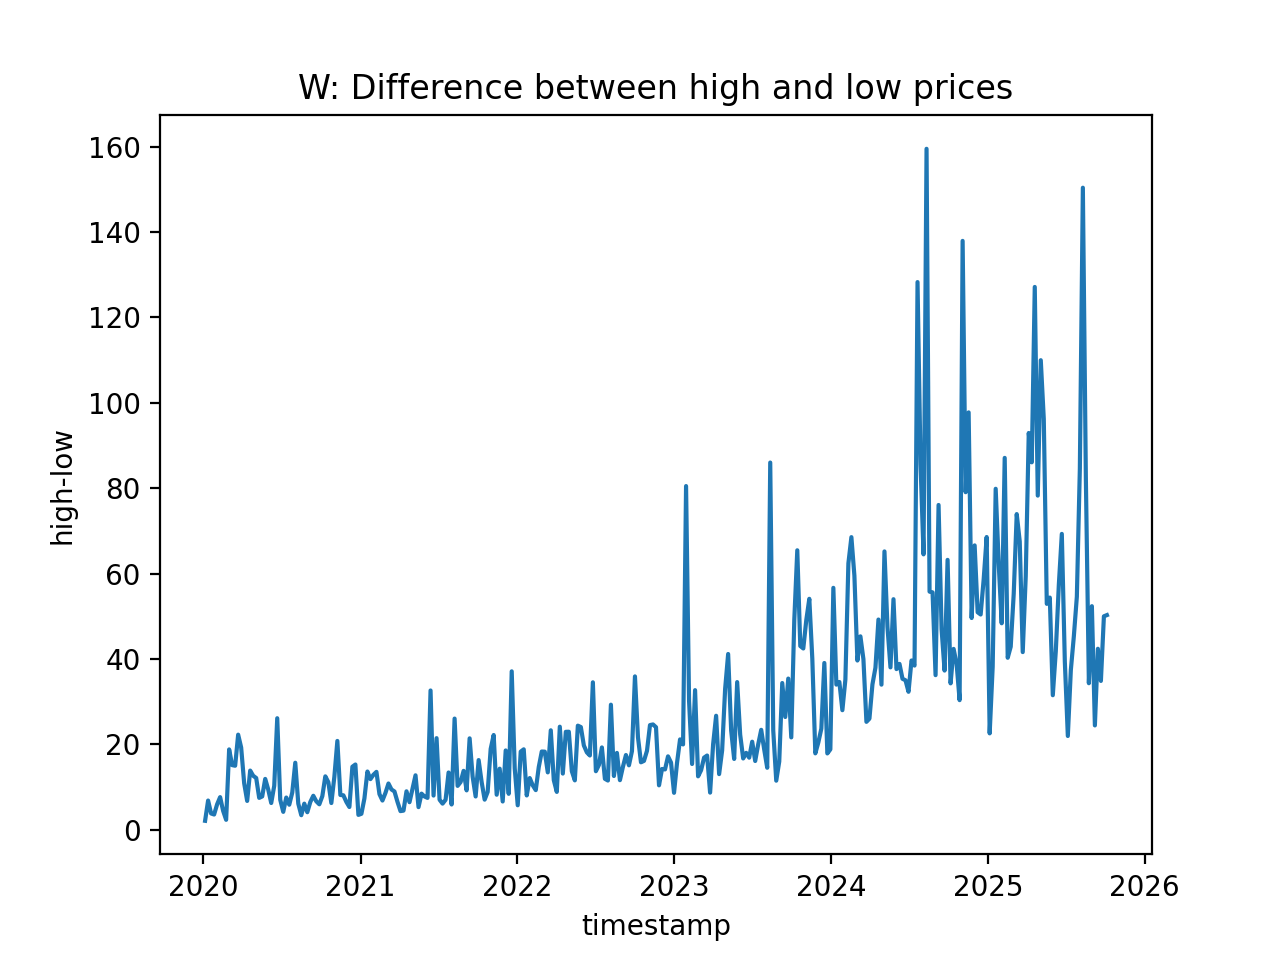

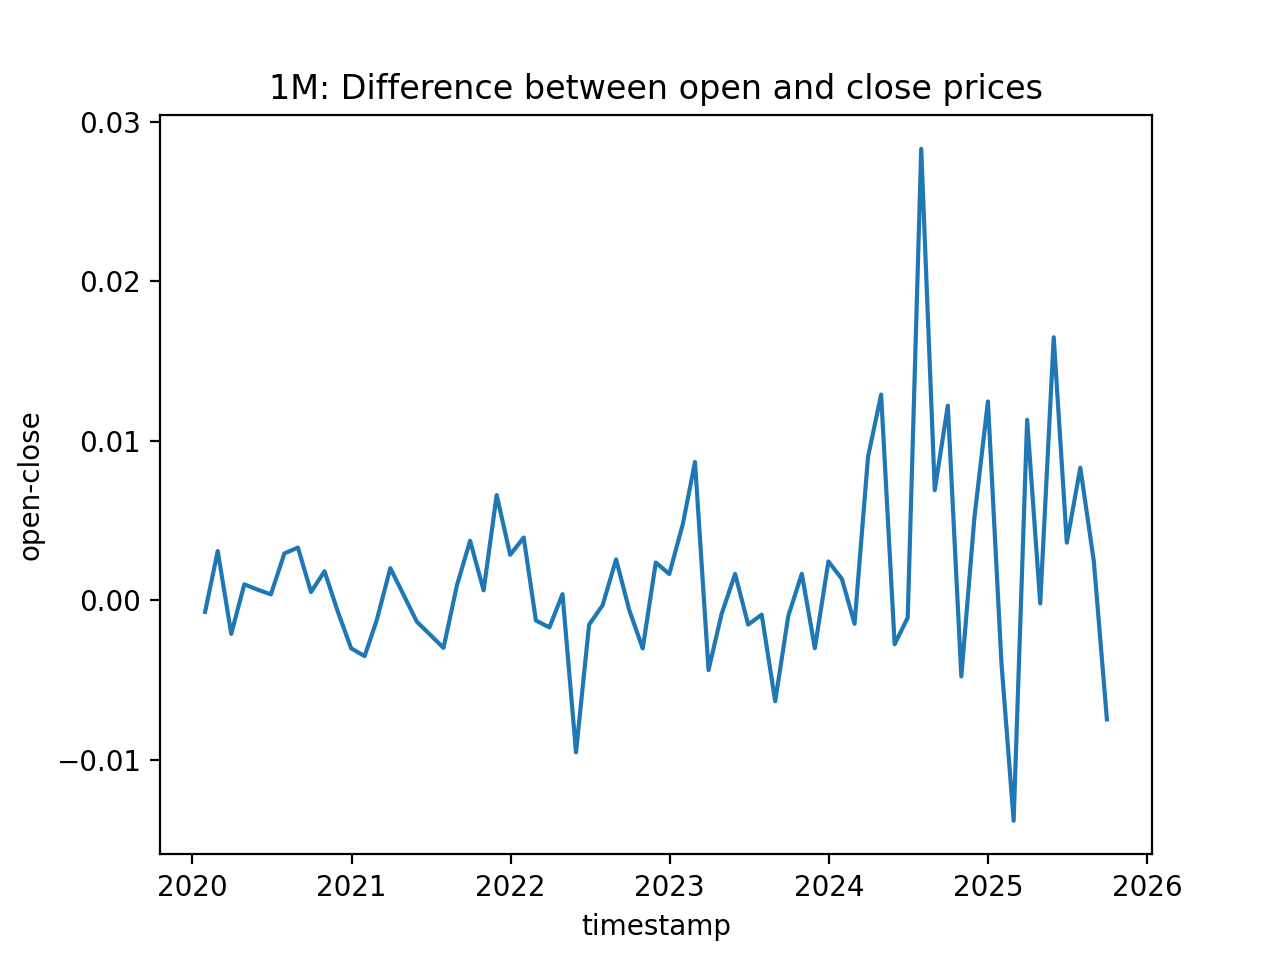

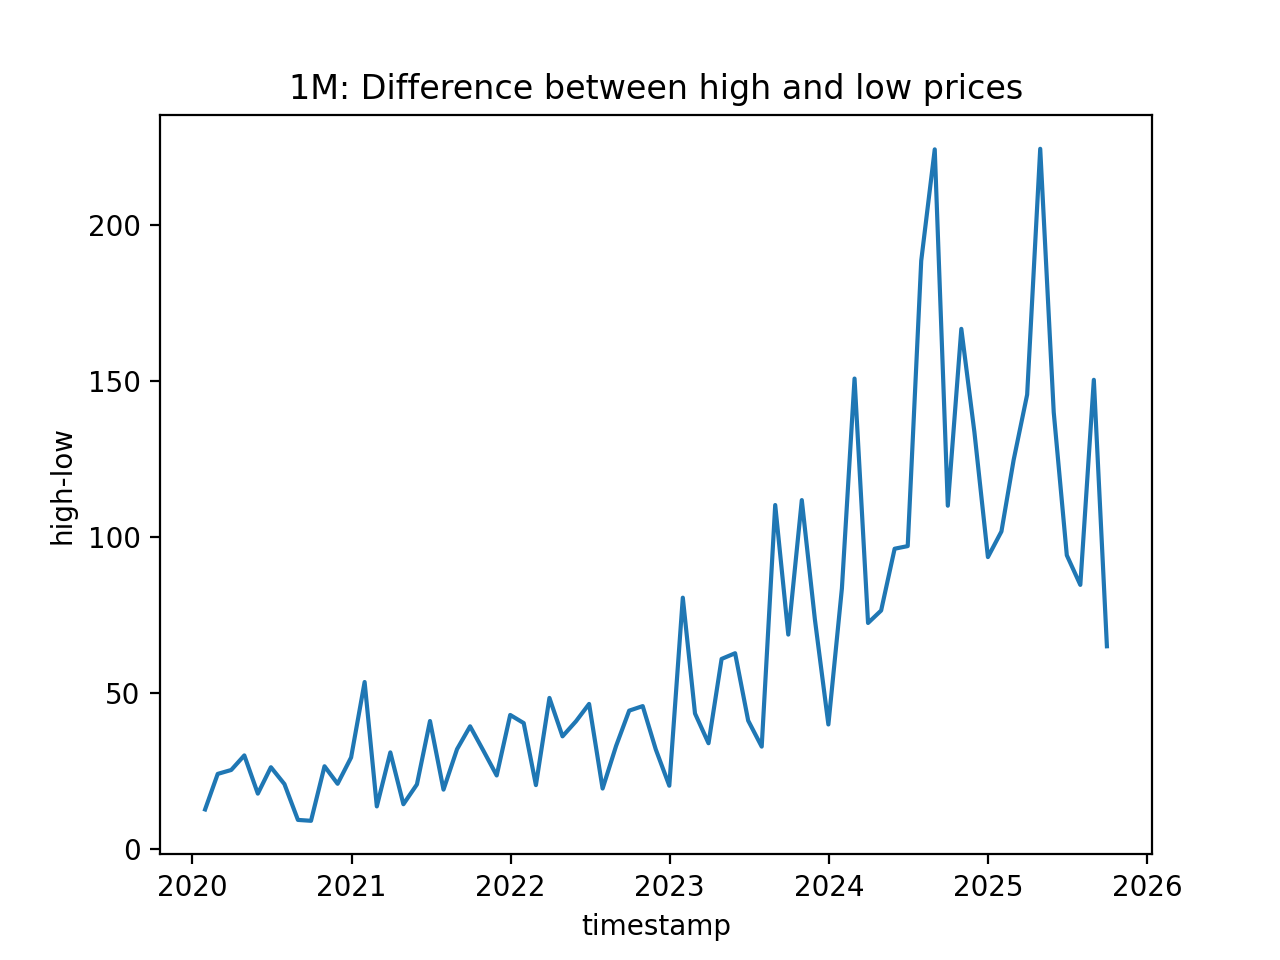

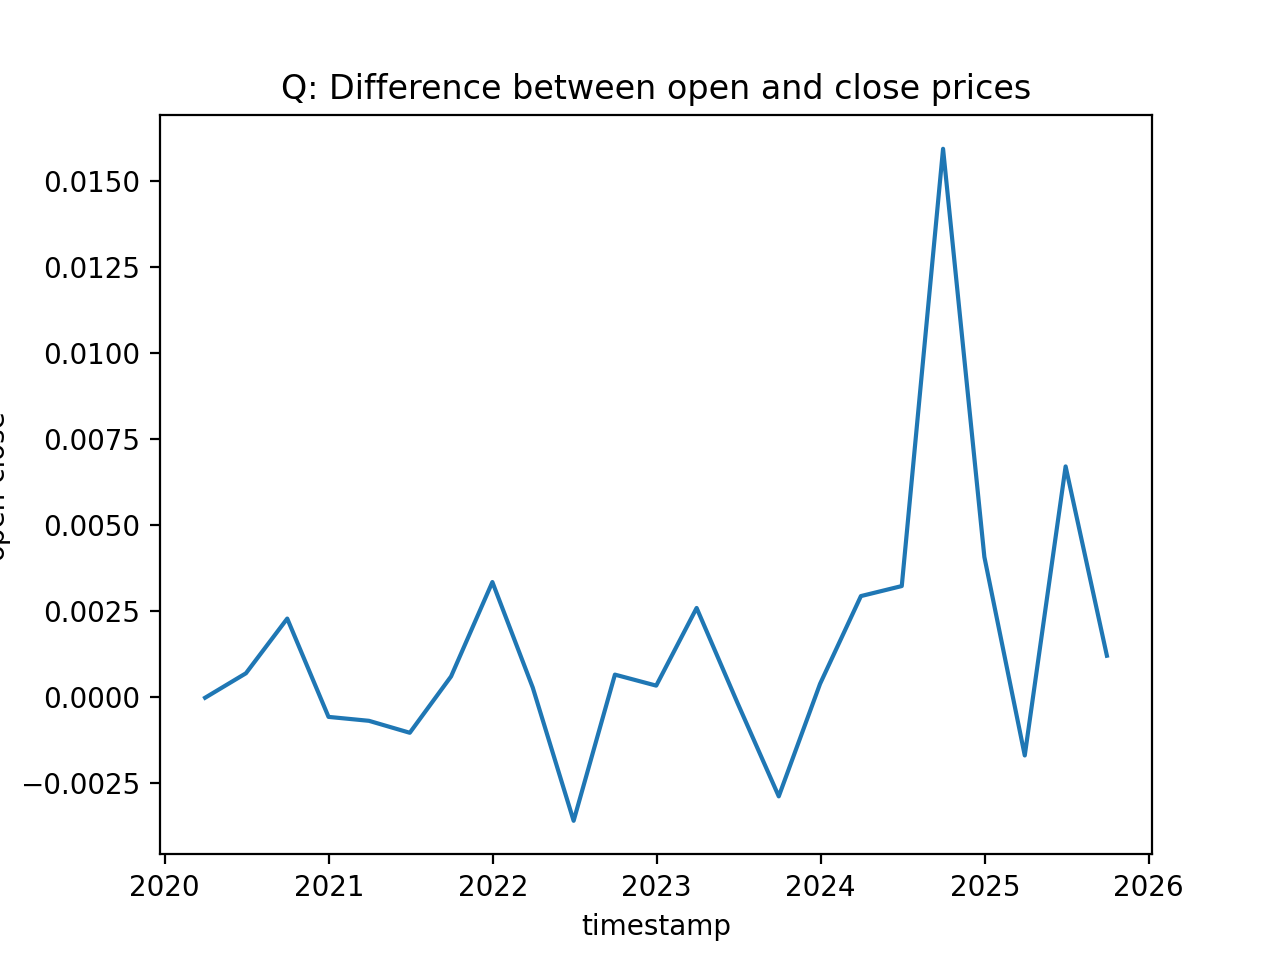

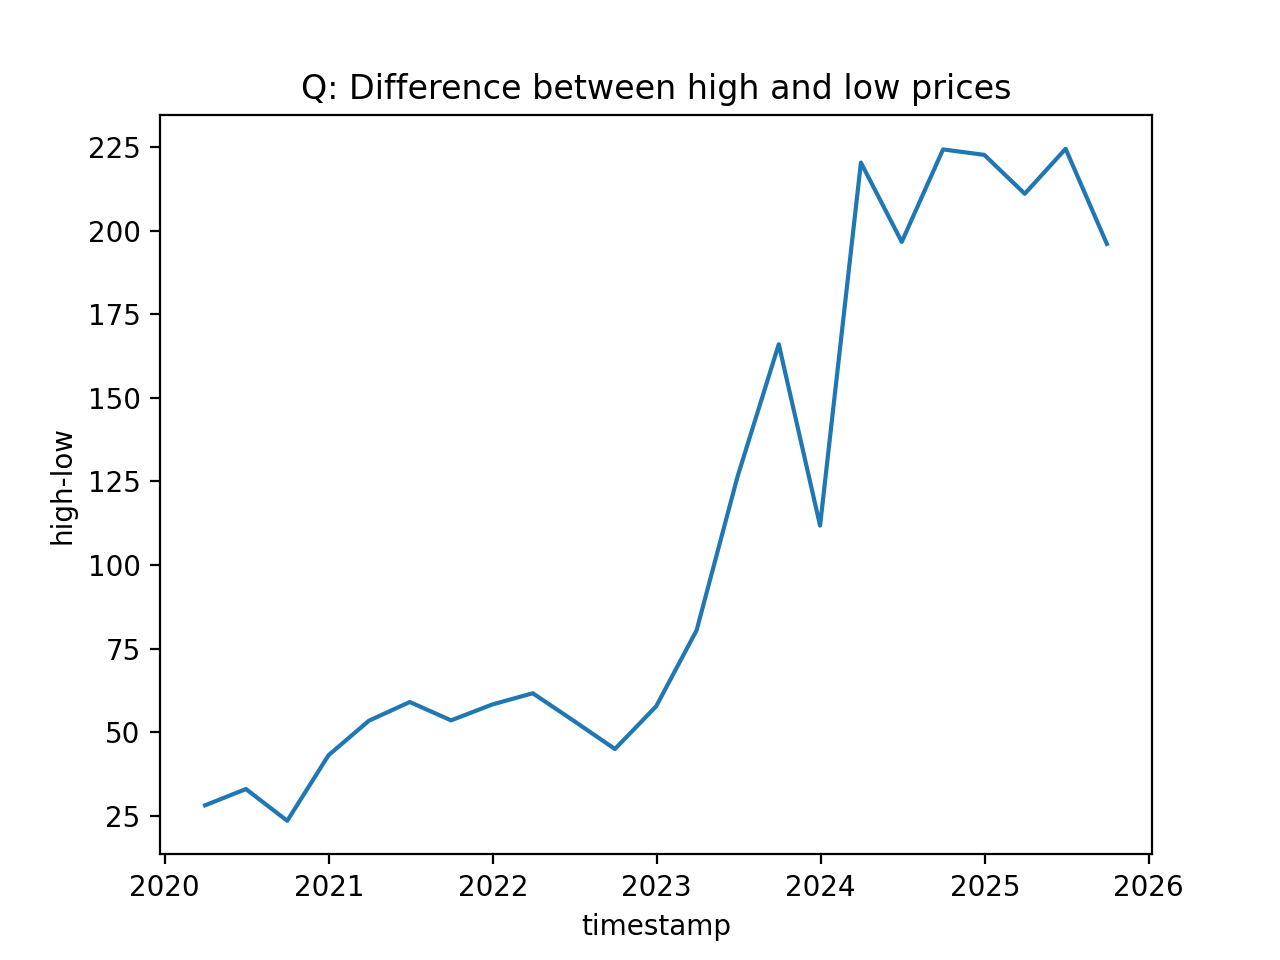

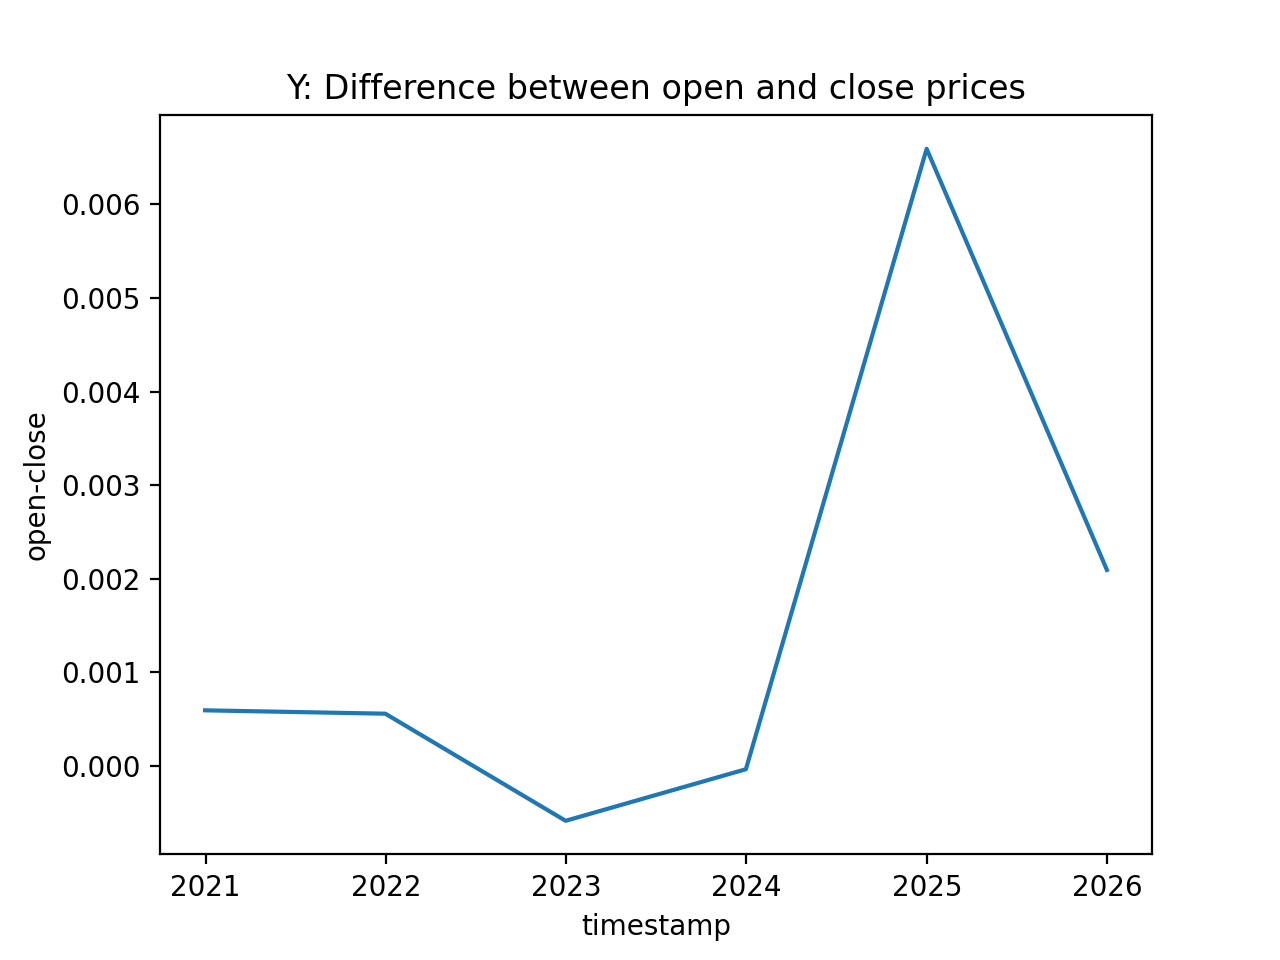

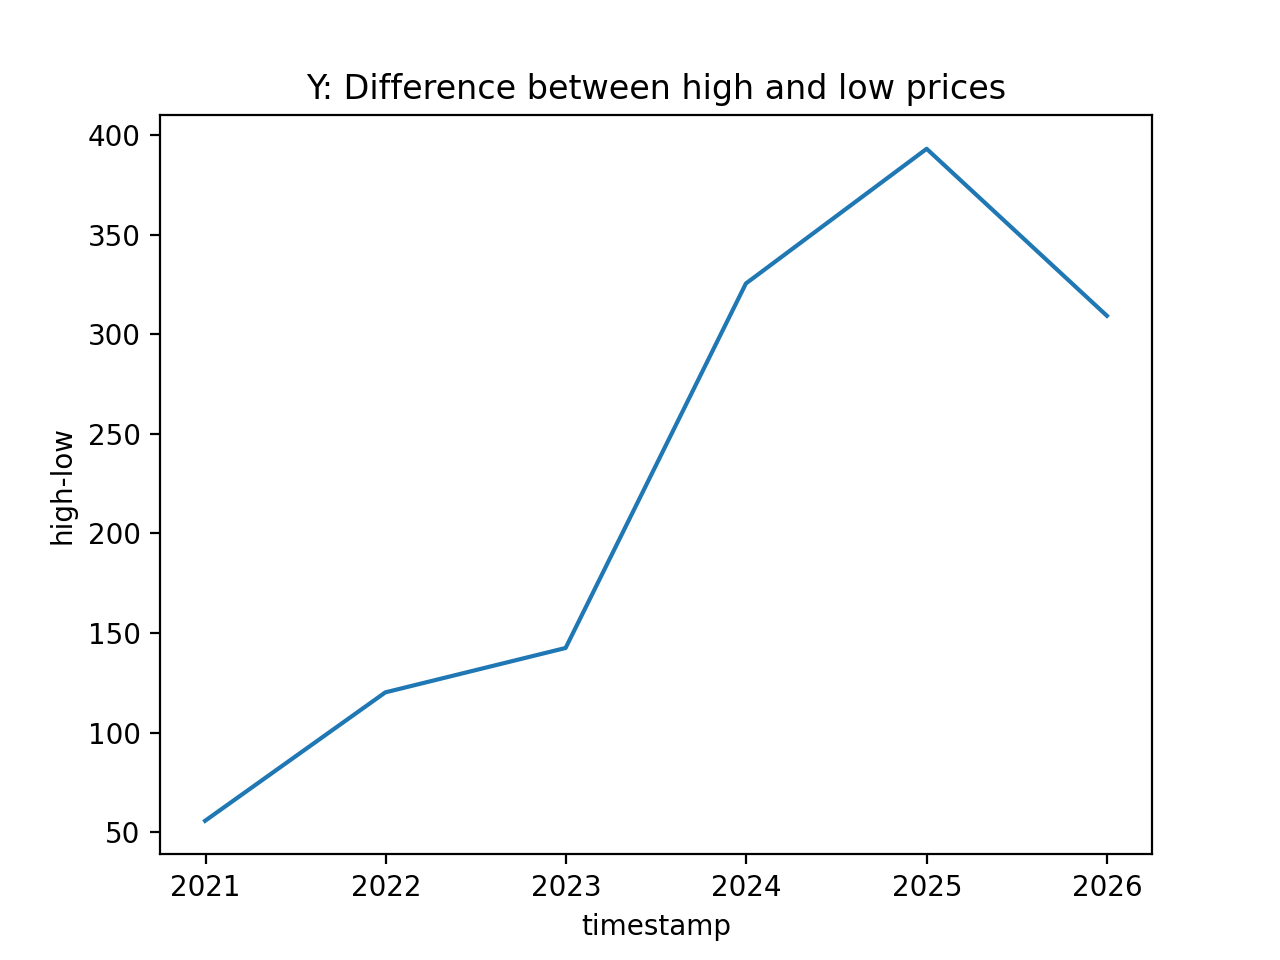

In [32]:
 for inter in time_intervals:
    lly_ranges = volatility_df(lly_df, inter)

    plt.figure()
    sns.lineplot(data=lly_ranges, x='timestamp', y='open-close')
    plt.title(f'{inter}: Difference between open and close prices')
    plt.show()

    plt.figure()
    sns.lineplot(data=lly_ranges, x='timestamp', y='high-low')
    plt.title(f'{inter}: Difference between high and low prices')
    plt.show()

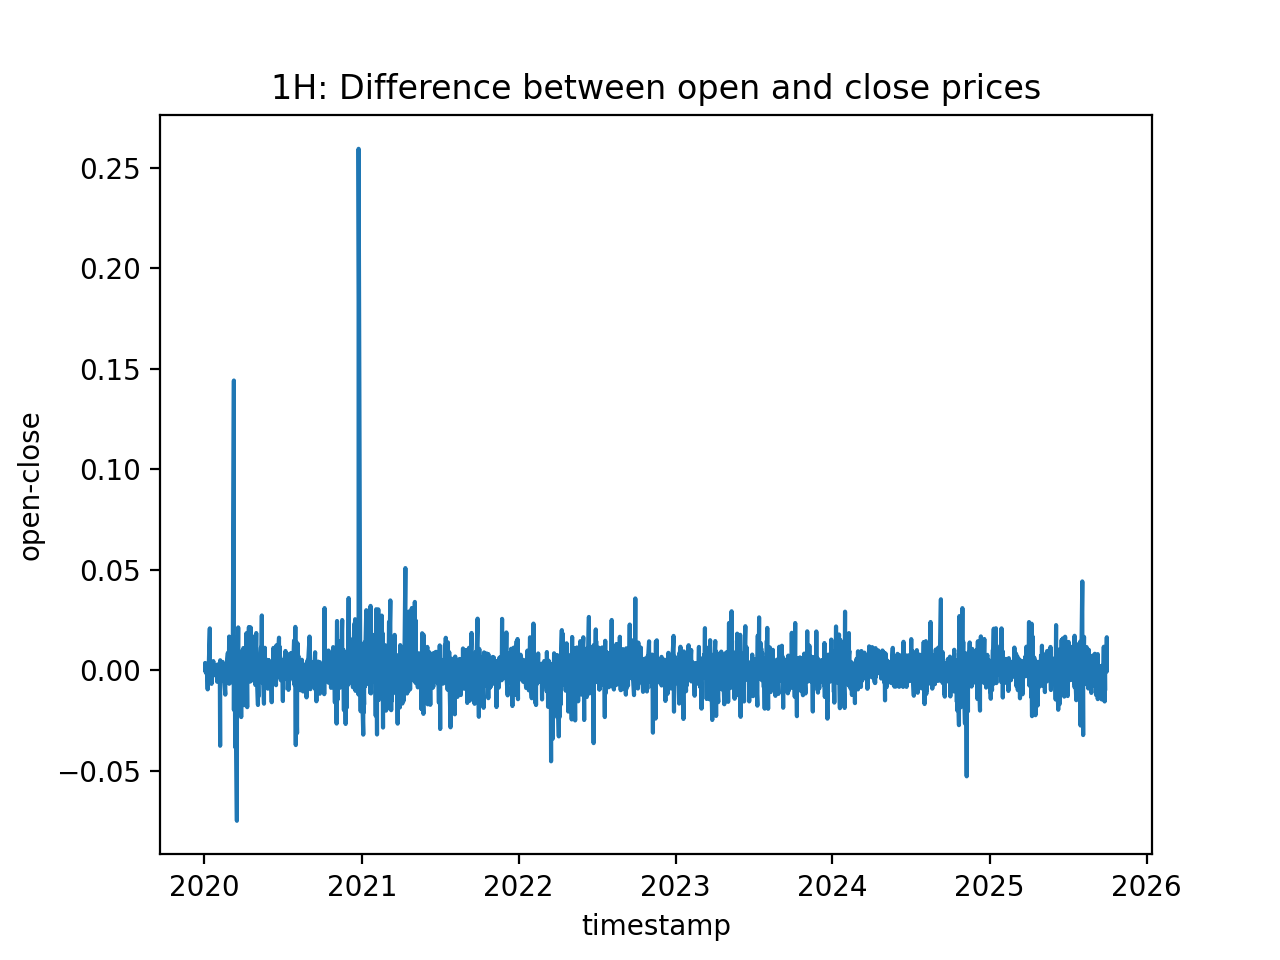

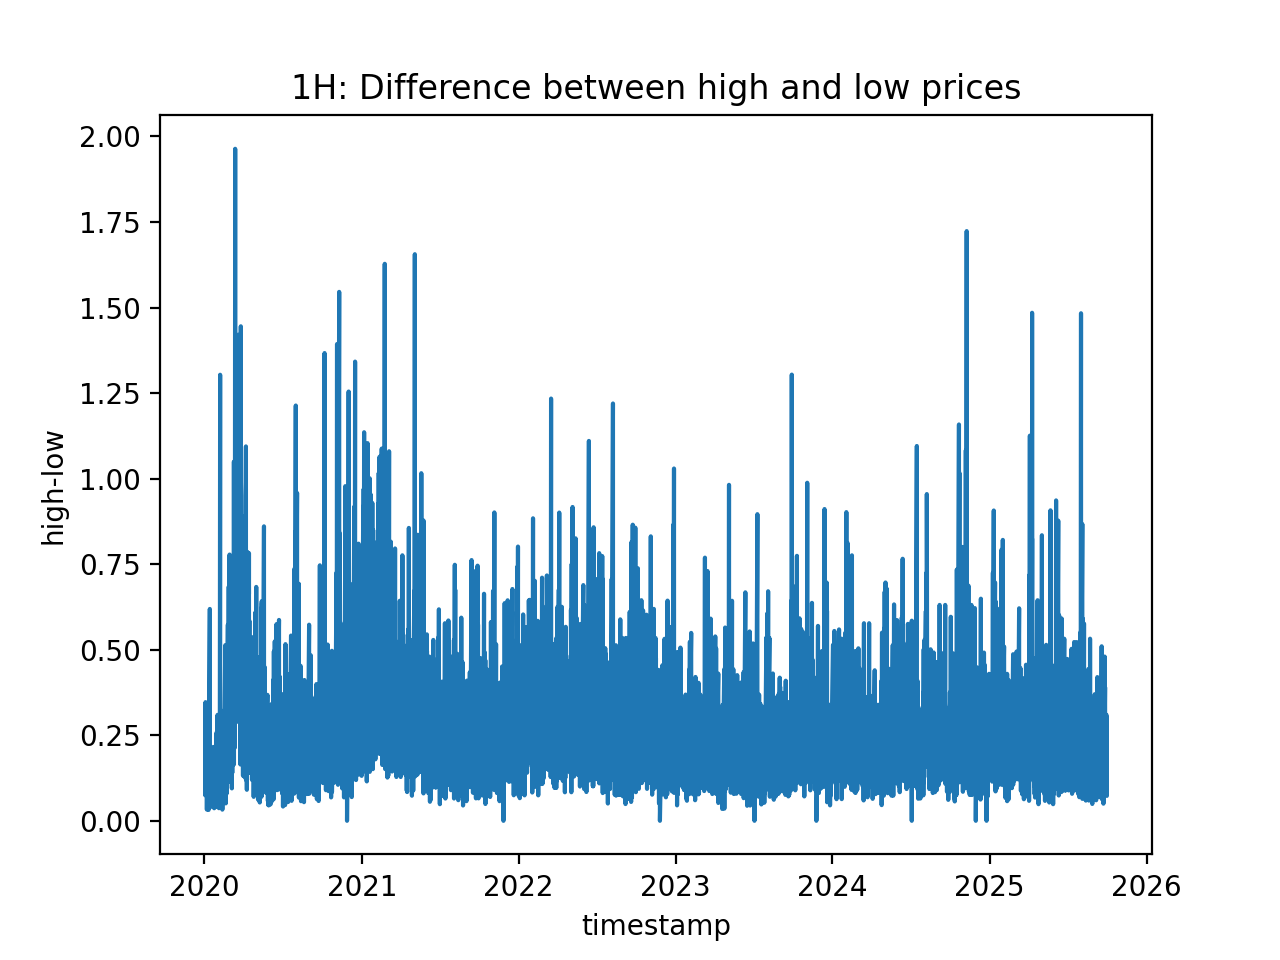

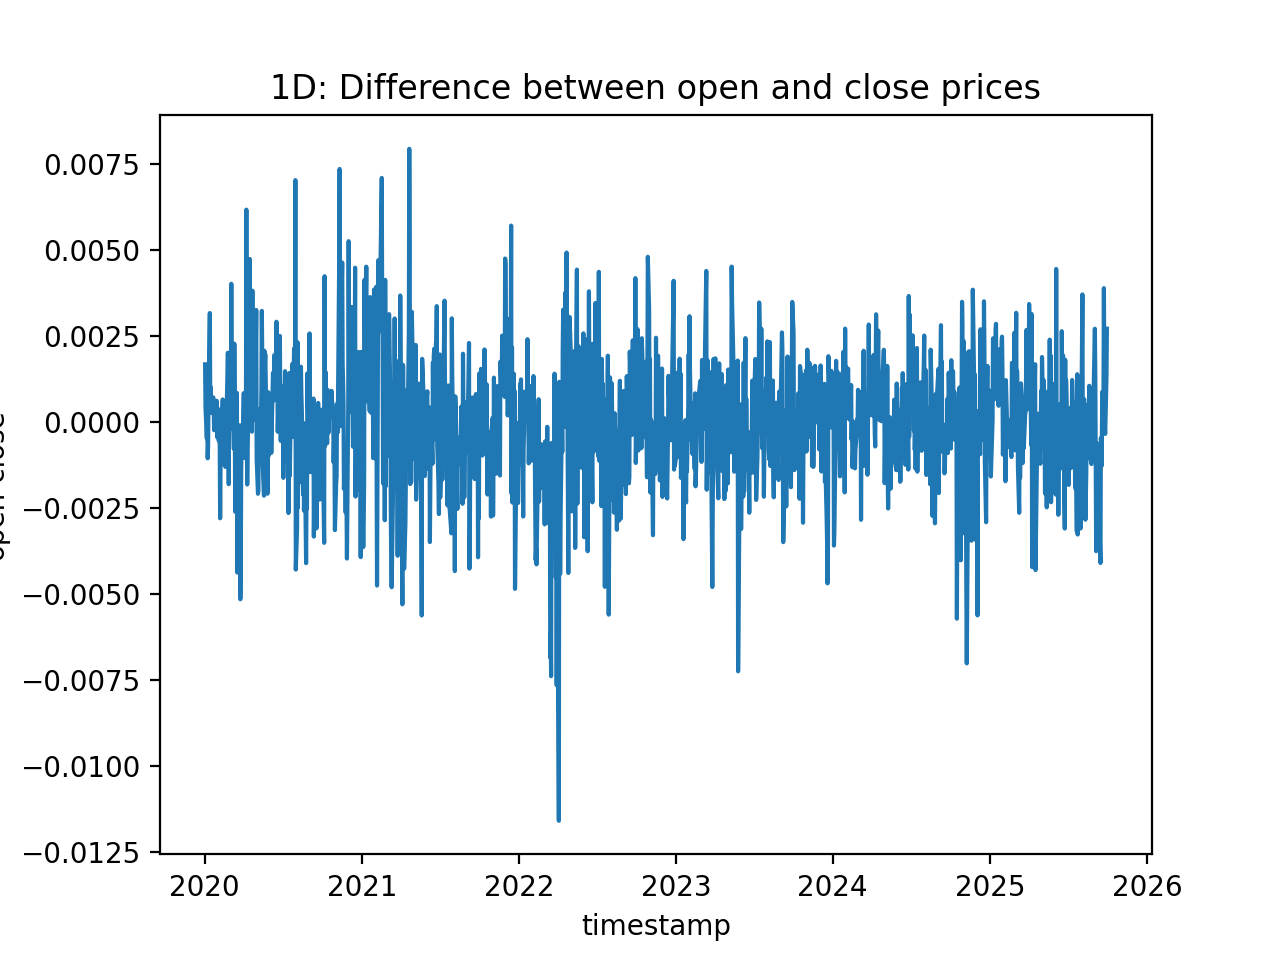

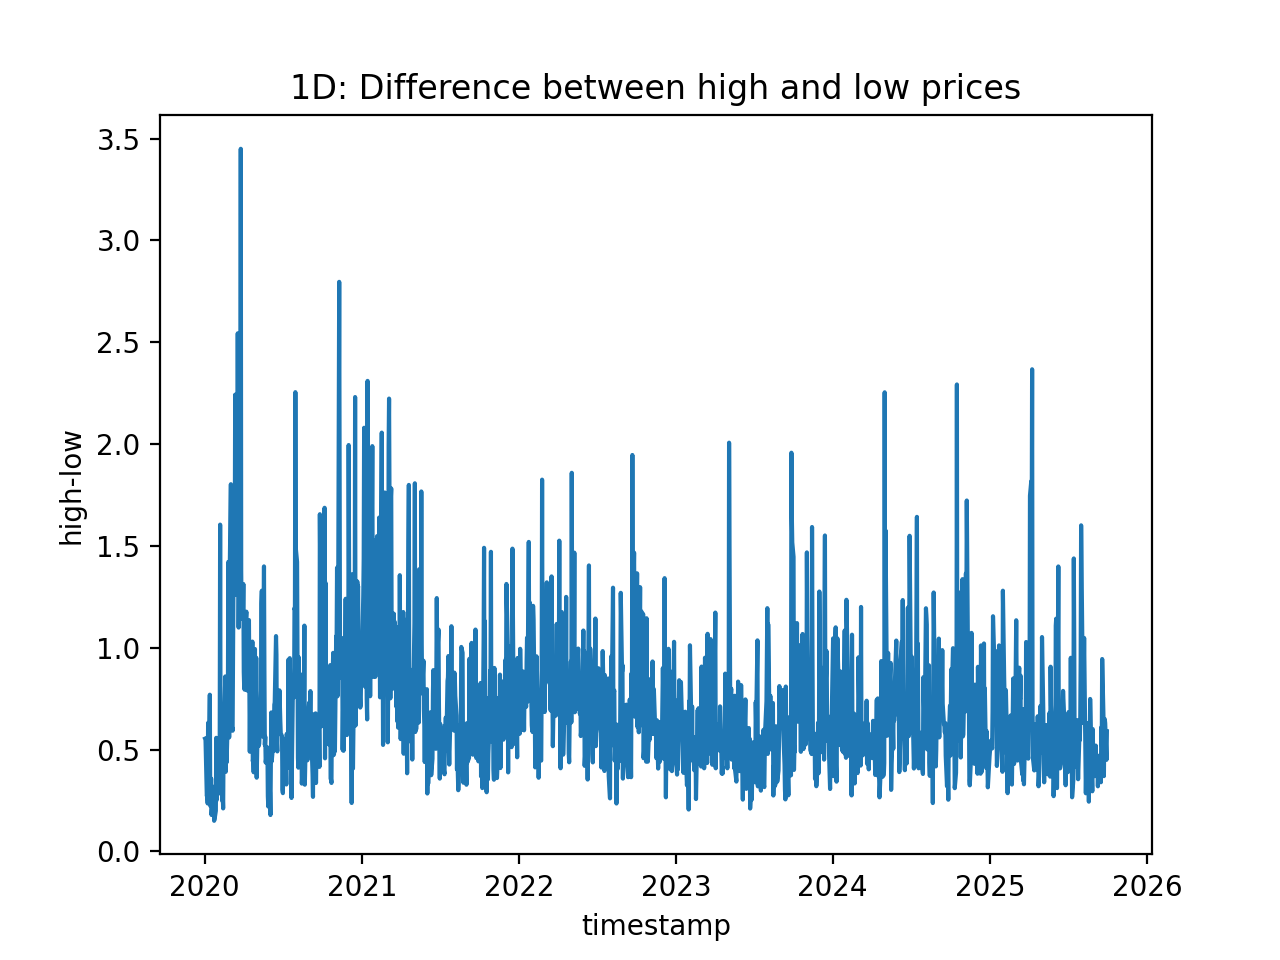

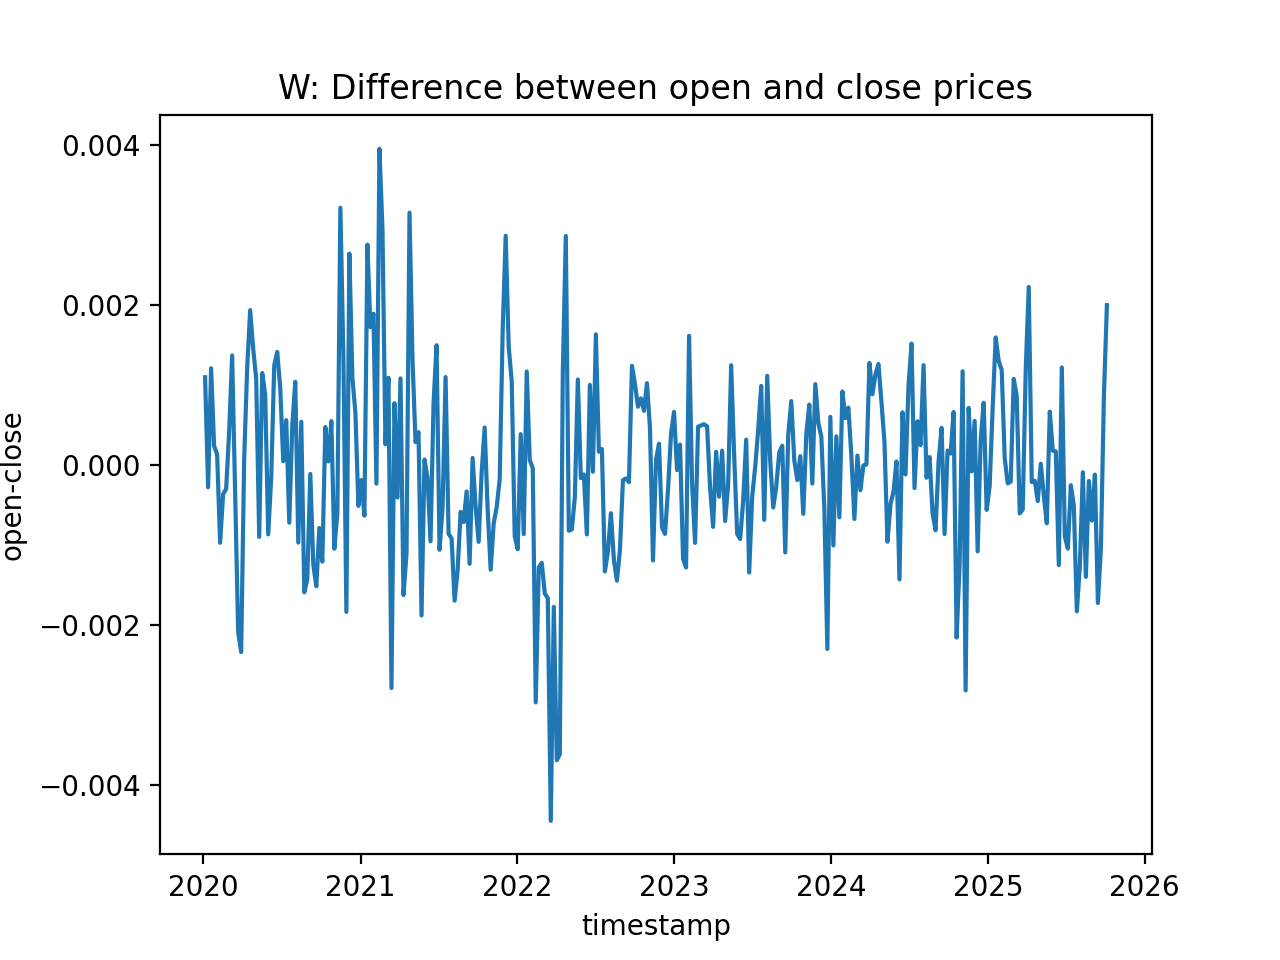

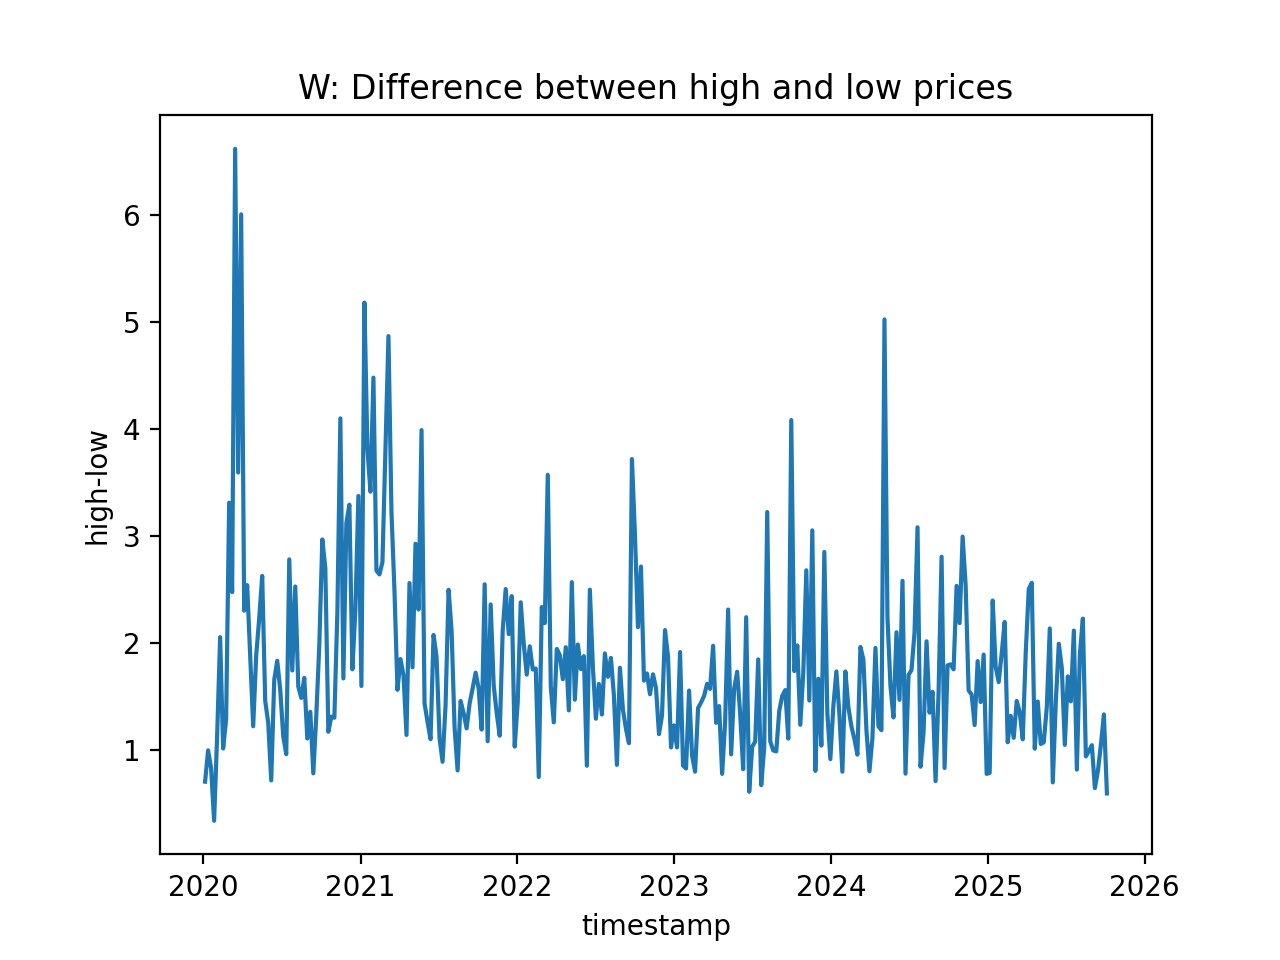

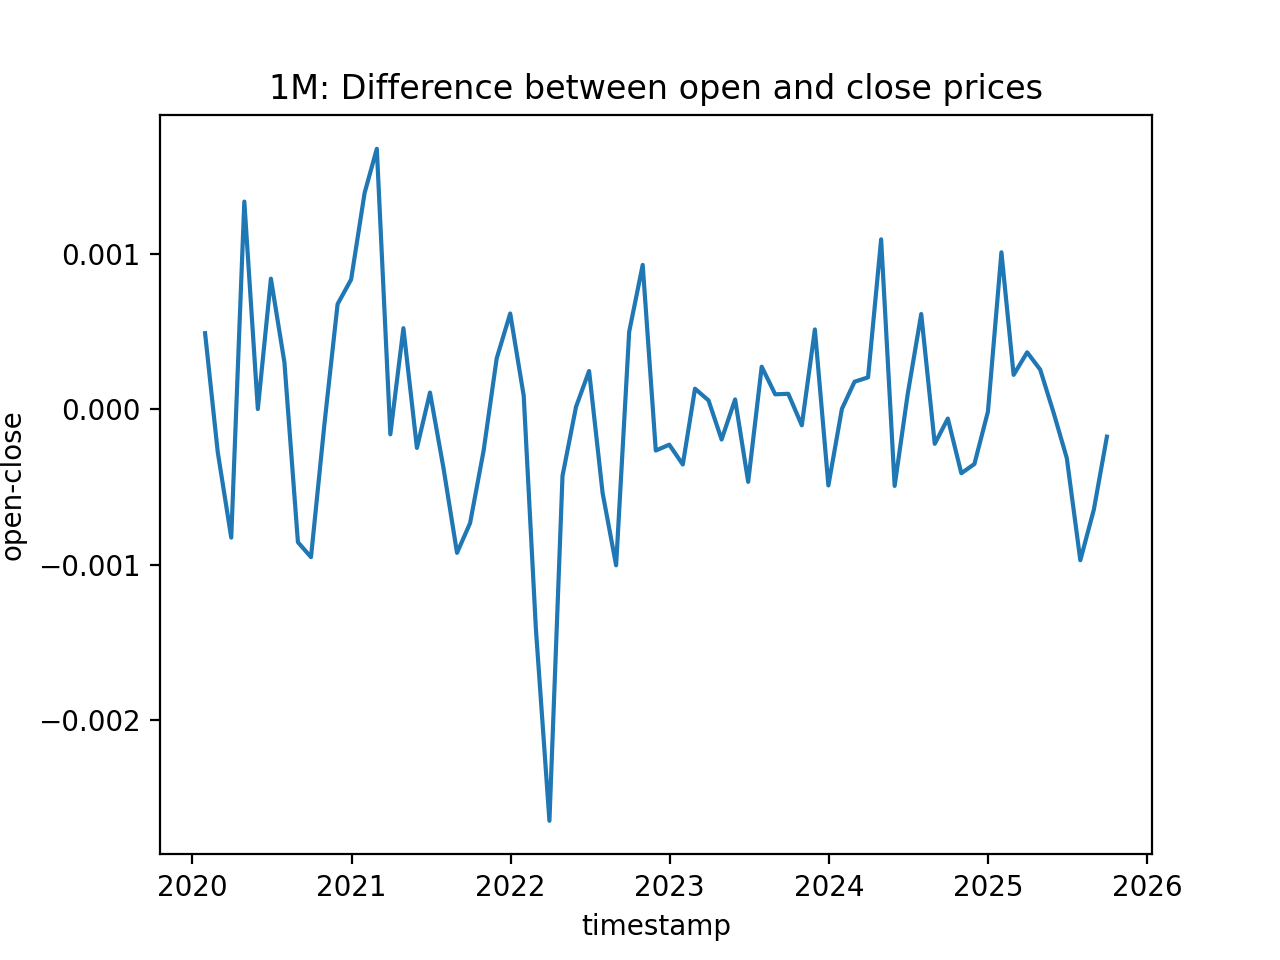

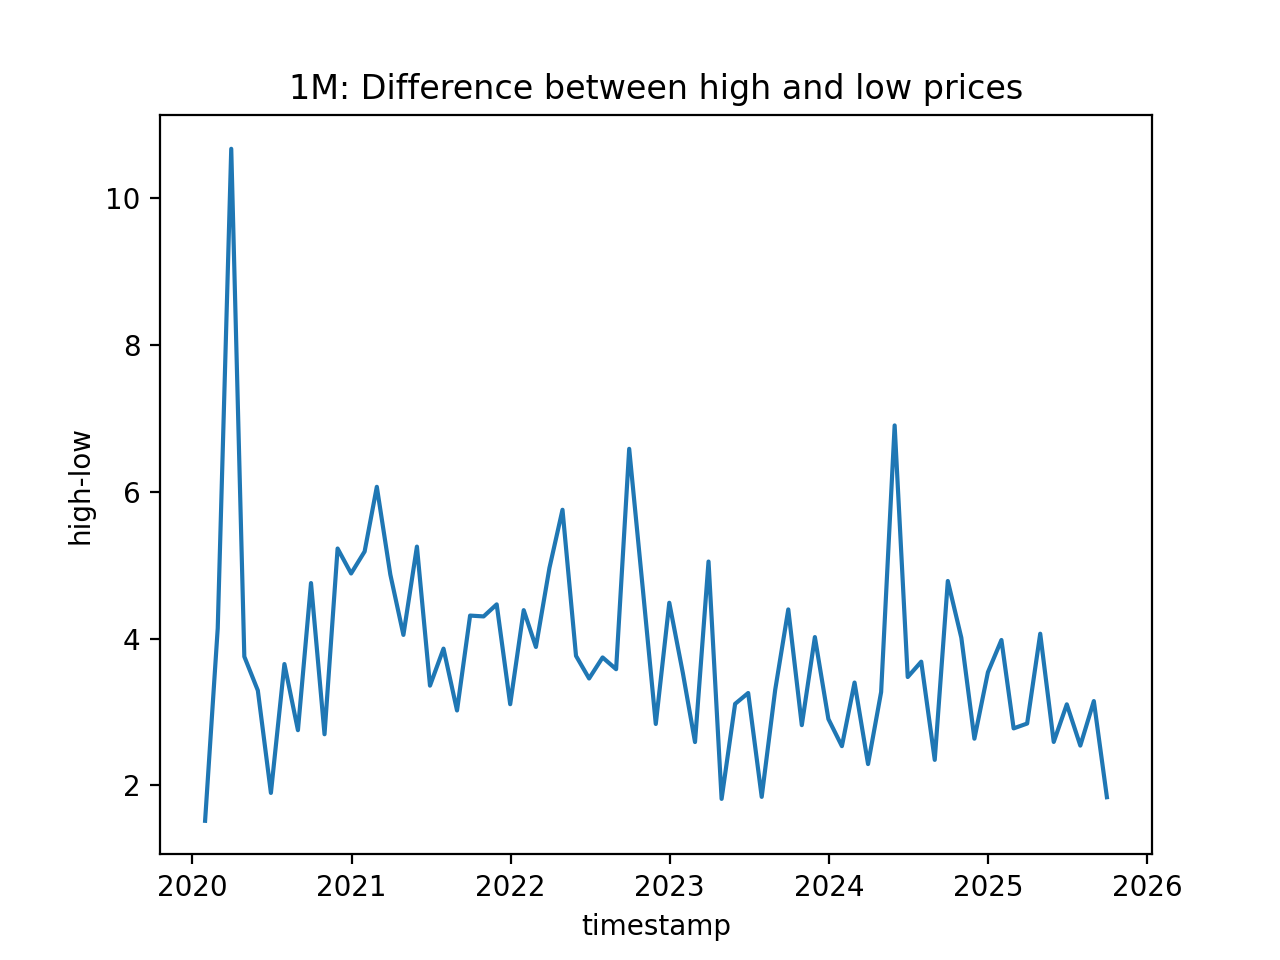

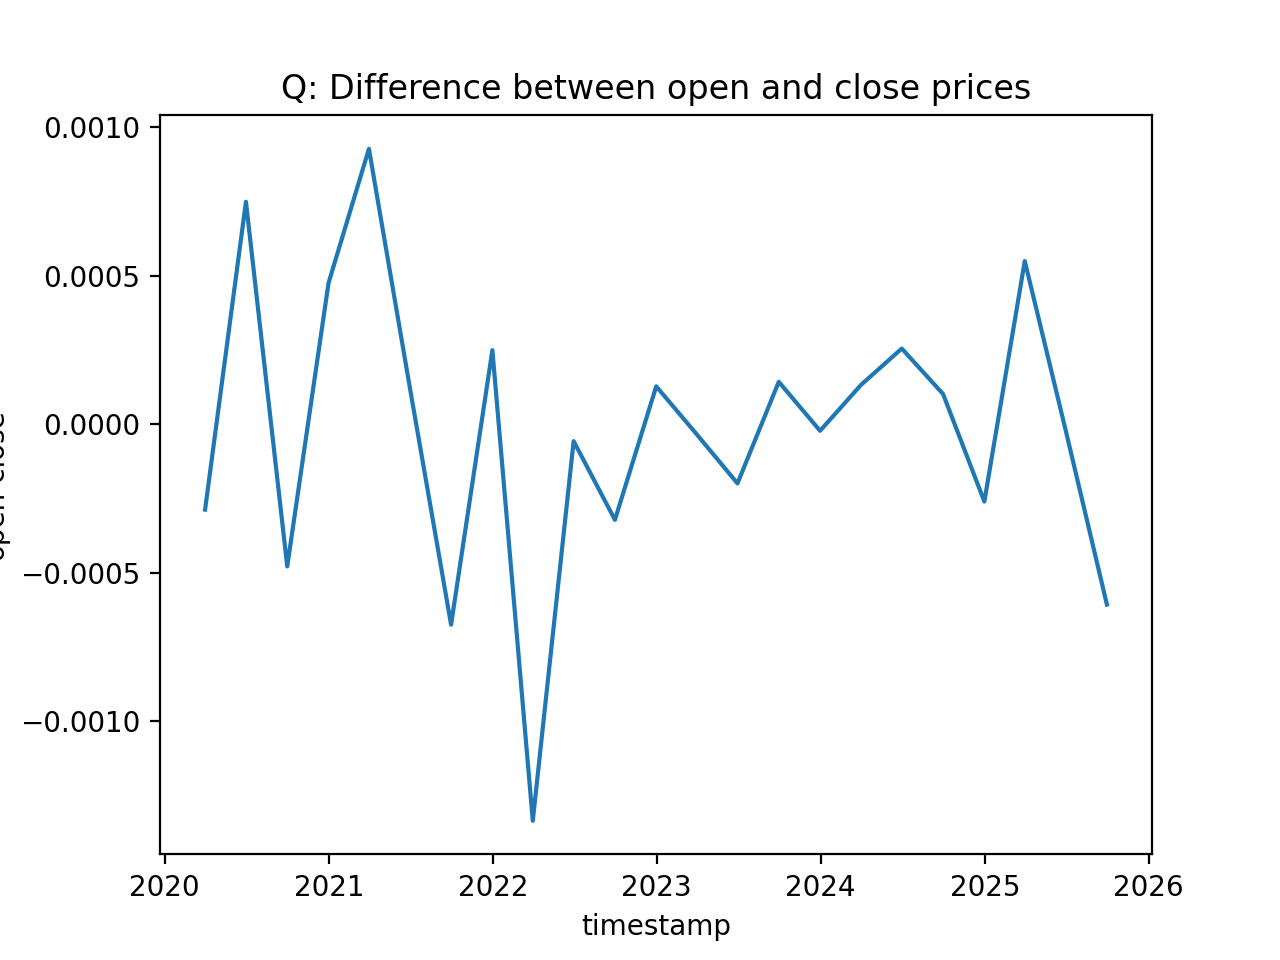

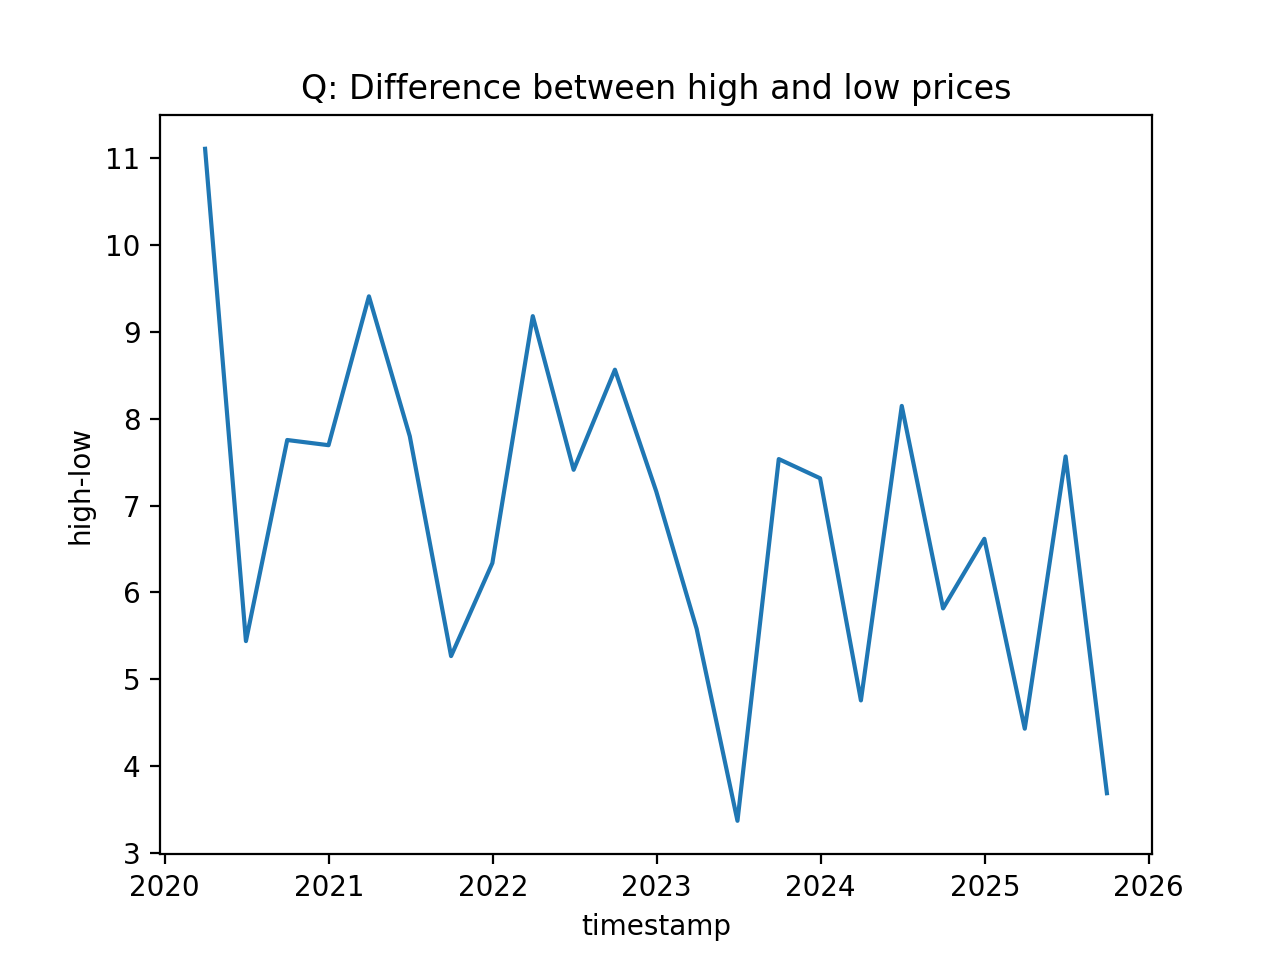

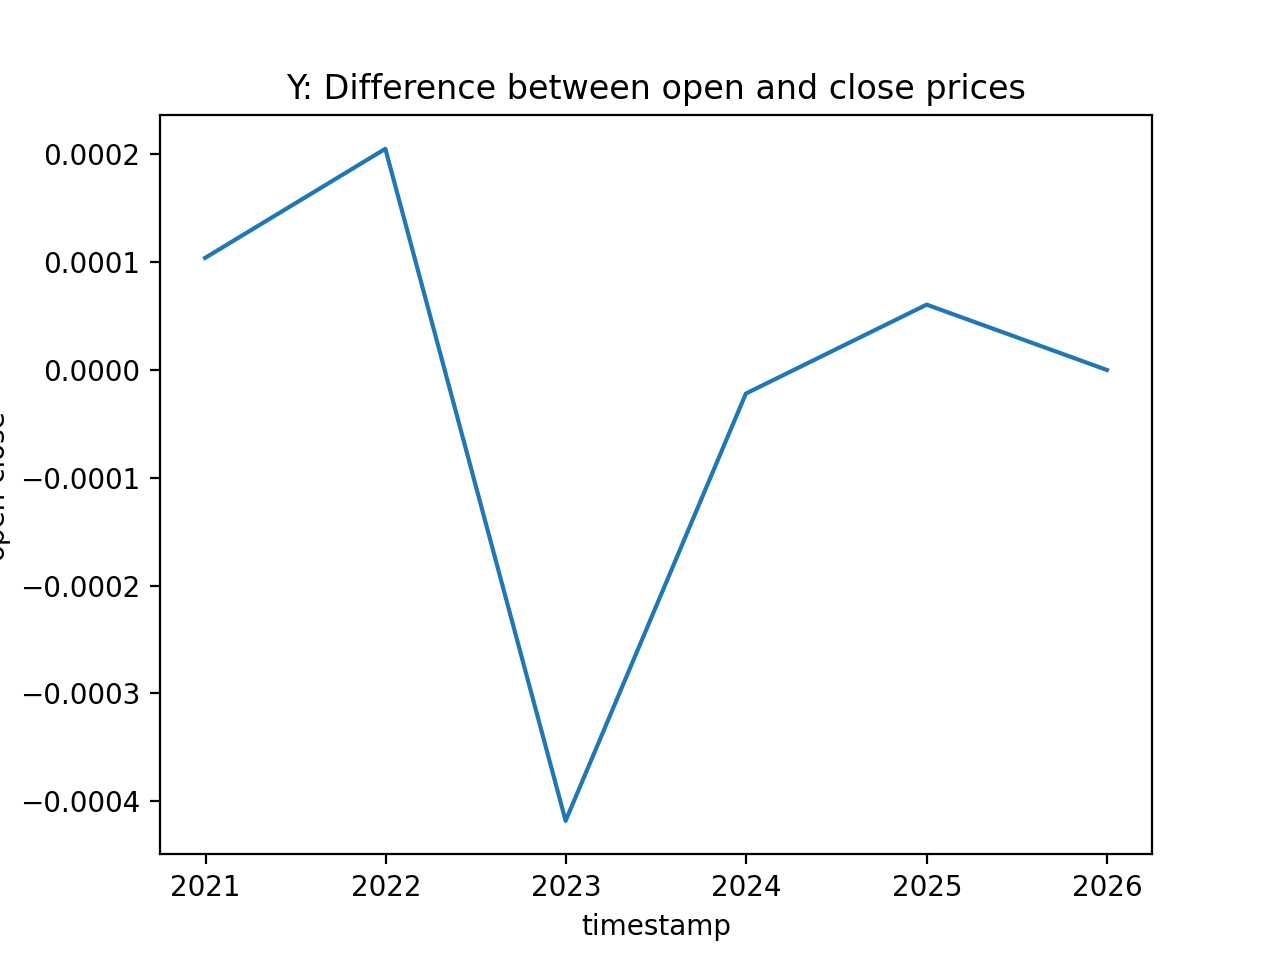

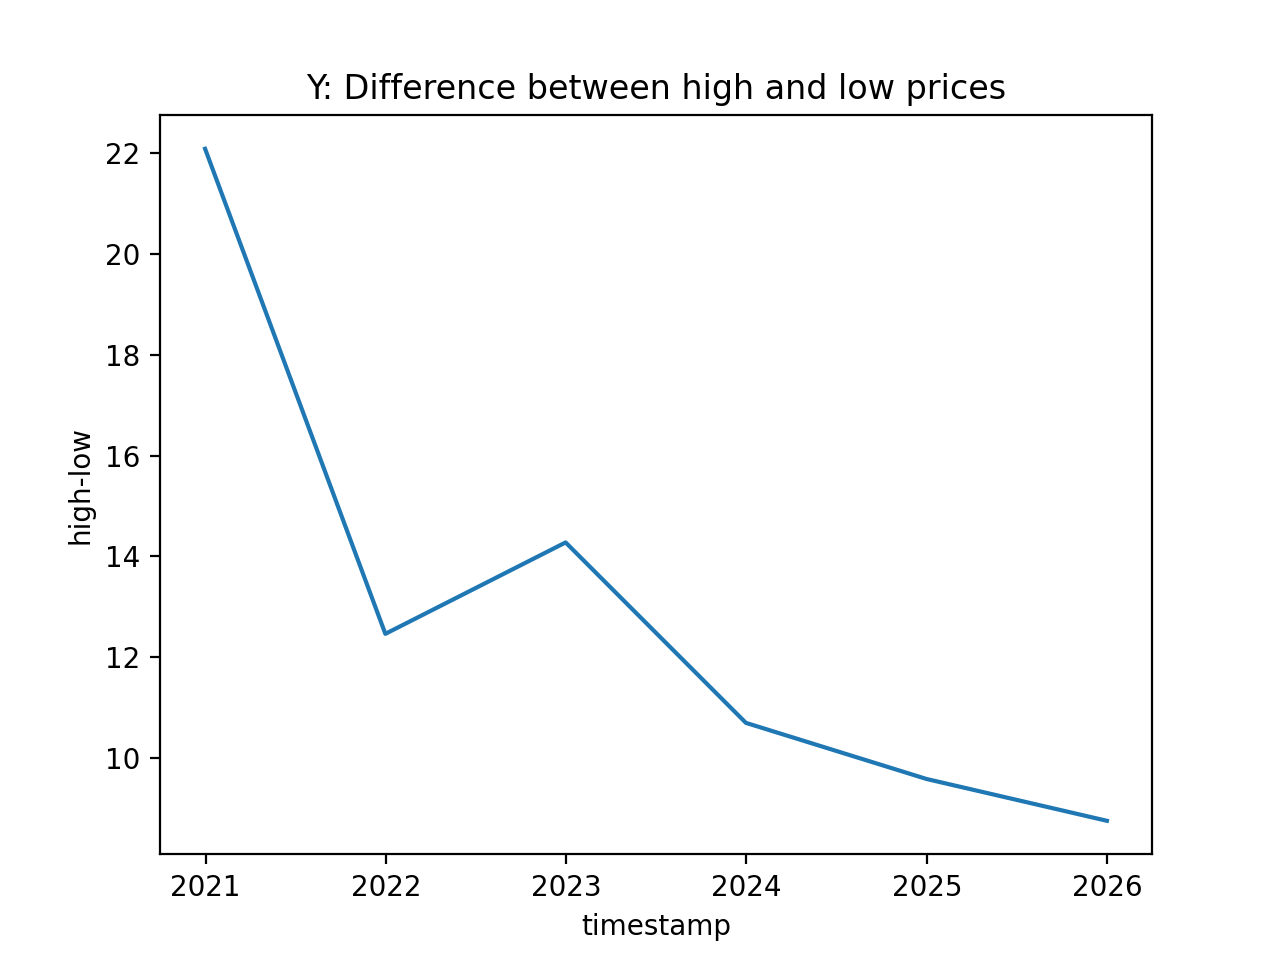

In [33]:
for inter in time_intervals:
    bep_ranges = volatility_df(bep_df, inter)

    plt.figure()
    sns.lineplot(data=bep_ranges, x='timestamp', y='open-close')
    plt.title(f'{inter}: Difference between open and close prices')
    plt.show()

    plt.figure()
    sns.lineplot(data=bep_ranges, x='timestamp', y='high-low')
    plt.title(f'{inter}: Difference between high and low prices')
    plt.show()

# Correlation

In [34]:
# #Trying to do covariance correlation, issues with small numbers, become NA
# APPL_daily_variance = pd.DataFrame({
#     "timestamp": daily_variance.index,
#     "variance": daily_variance.values

# })
# np.corrcoef(APPL_daily_variance.variance[0], APPL_daily_variance.variance[1])
# APPL_daily_variance.variance[0]
# # for i in range(len(APPL_daily_variance)-1):
# #     print(APPL_daily_variance.variance[i])
# timestamp = []
# correlation = []
# for i in range(len(APPL_daily_variance)-1):
#     timestamp.append([APPL_daily_variance.timestamp[i], APPL_daily_variance.timestamp[i+1]])
#     correlation.append(np.corrcoef(APPL_daily_variance.variance[i], APPL_daily_variance.variance[i+1])[0,1])
# APPL_correlation = pd.DataFrame({
#     "timestamps": timestamp,
#     "correlation": correlation
# })
# APPL_correlation

# EWMA

In [35]:
#EWMA formula, acts as basis to compare other models
def ewma_predict_Days(volatility, lambda_, days, loss):
    predicted = []
    true = []
    start = len(volatility) - days
    # print(start)
    for i in range(start, len(volatility)):
        historical = volatility.iloc[:i]
        # print("historical: ", historical)
        ewma_value = historical.ewm(alpha=lambda_).mean().iloc[-1]
        # print("ewma value: ", ewma_value)
        true.append(volatility.iloc[i])
        predicted.append(ewma_value)
    # print(true)
    # print(predicted)
    if loss == "MSE":
        return np.mean((np.array(true)-np.array(predicted))**2)
    else:
        return None

In [36]:
#Use ewma and find the error in predicting the latest 20 days
mse_APPL = ewma_predict_Days(daily_volatility_APPL, 0.94, 20, "MSE")
print("MSE: ", mse_APPL)

MSE:  1.0911267691521766e-08


In [37]:
mse_LLY = ewma_predict_Days(daily_volatility_LLY, 0.94, 20, "MSE")
print("MSE LLY: ", mse_LLY)

MSE LLY:  2.23307755951079e-08


In [38]:
mse_BEP = ewma_predict_Days(daily_volatility_BEP, 0.94, 20, "MSE")
print("BEP MSE: ", mse_BEP)

BEP MSE:  5.497451390562223e-08


# Outlier Detection

# Next Steps